# Charlotte, NC, Python automatic variable generation file for Circular Buffer

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [1]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [2]:
#conda activate geo_env


In [3]:
#python -m ipykernel install --user --name geo_env

In [4]:
import geopandas as gpd

In [5]:
import pandas as pd
from functools import reduce

In [6]:
import sys
'geopandas' in sys.modules

True

In [7]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd

In [9]:
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [569]:
#buffer size in meter
size=3218.69 #in m, this input is also required for area conversation,1/10 mile==160.934m,1/4mile=402.336m, 0.5 mile=804.672, 3/4mile=1207.008m, 1 mile=1609.34,1.5 mile=2414.02, 2 mile=3218.69

In [570]:
# Import the emerging data
nf=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-aadbt-final-all.csv")
nf=nf[nf["region"]=="Charlotte"]
nf=nf[nf["year"]==2019]
nf.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
166  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
167  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
168  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
169  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
170  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

          AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
166  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
167  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
168   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
169  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
170   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                               comment  
166             On top of bridge; Sidewalk + bike lane  
167  Sidewalk + bike lane, Street is divided in str...  
168  Separated Sidewalk North, divided in strava-os...  
169                                                NaN  
170                                                NaN

In [571]:
c1=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites_all_study_area.csv")
c1=c1[c1["region"]=="Charlotte"]
c1=c1[c1["in_2019"]==1]
c1=c1[['site_id','osm_id_sensor']]
c1.head()

site_id  osm_id_sensor
414  P001CHA     55186886.0
415  P002CHA     16701397.0
416  P003CHA    493705004.0
417  P004CHA     34764115.0
418  P005CHA    322993730.0

In [572]:
# merge by site_id
nf1=pd.merge(nf,c1, right_on='site_id', left_on='site_id',how='inner')
nf1.head(5)

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  
0             On top of bridge; Sidewalk + bike lane     55186886.0  
1  Sidewalk + bike lane, Street is divided in str...     16701397.0  
2  Separated Sidewalk North, divided in strava-os...    493705004.0  
3                                                NaN     34764115.0  
4                                                NaN    322993730.0

In [573]:
emerging_data=nf1.loc[:,['osm_id_sensor','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']]
emerging_data.columns=['osm_id','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']
emerging_data.head(3)

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw
0   55186886.0  P001CHA   permanent  393.654456  18.547945   5.958904   1236.0
1   16701397.0  P002CHA   permanent  160.742460  16.082192   4.602740    740.0
2  493705004.0  P003CHA   permanent   39.364881  15.465753   2.945205    328.0

# Input the Strava Annual Network shape file here

In [574]:
strava=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/Charlotte_strava_osm_buffer_3mi.shp")
print(strava.crs)
# Define the current EPSG
strava = strava.set_crs("EPSG:4326")
# Let's take a copy of our layer
strava_proj = strava.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=3358)

epsg:4326


# Input Bike share data here

In [102]:
#bs1=pd.read_csv("C:/Users/mxm5116/Desktop/Eugene Portland/Eugene-bike-share-trips-2019.csv")
#bs1.head(5)
#print(bs1.shape)

# Mention your Study Region here

In [103]:
region = "Charlotte"

# Input OSM file here

In [104]:
# Input OSM land use shape file here
luse = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
#place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

# Import OSM Building shape file to get CBD (City Hall)

In [18]:
# Input OSM road shape file here
building = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [19]:
# Input the block group shape file of your study area here
bg=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/NC_blck_grp_2019.shp")

# Input Race csv file here
race=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/education.csv")

# Import school enrollmemt 
scll=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/School Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/Bike_commute_nc_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [20]:
# Input job csv file here
Number_job=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/nc_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/tabblock2010_37_pophu.shp")


# Import Slope File here

In [21]:
eu = rasterio.open('E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/Charlotte.img')

# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

# Input Study Area Boundary Shape file here

In [575]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')


In [576]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

<AxesSubplot:>

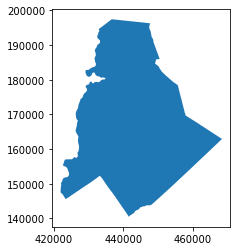

In [577]:
#region = "Eugene"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

<AxesSubplot:>

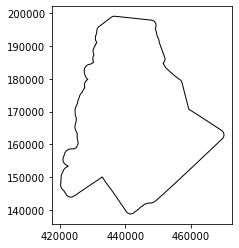

In [578]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

<AxesSubplot:>

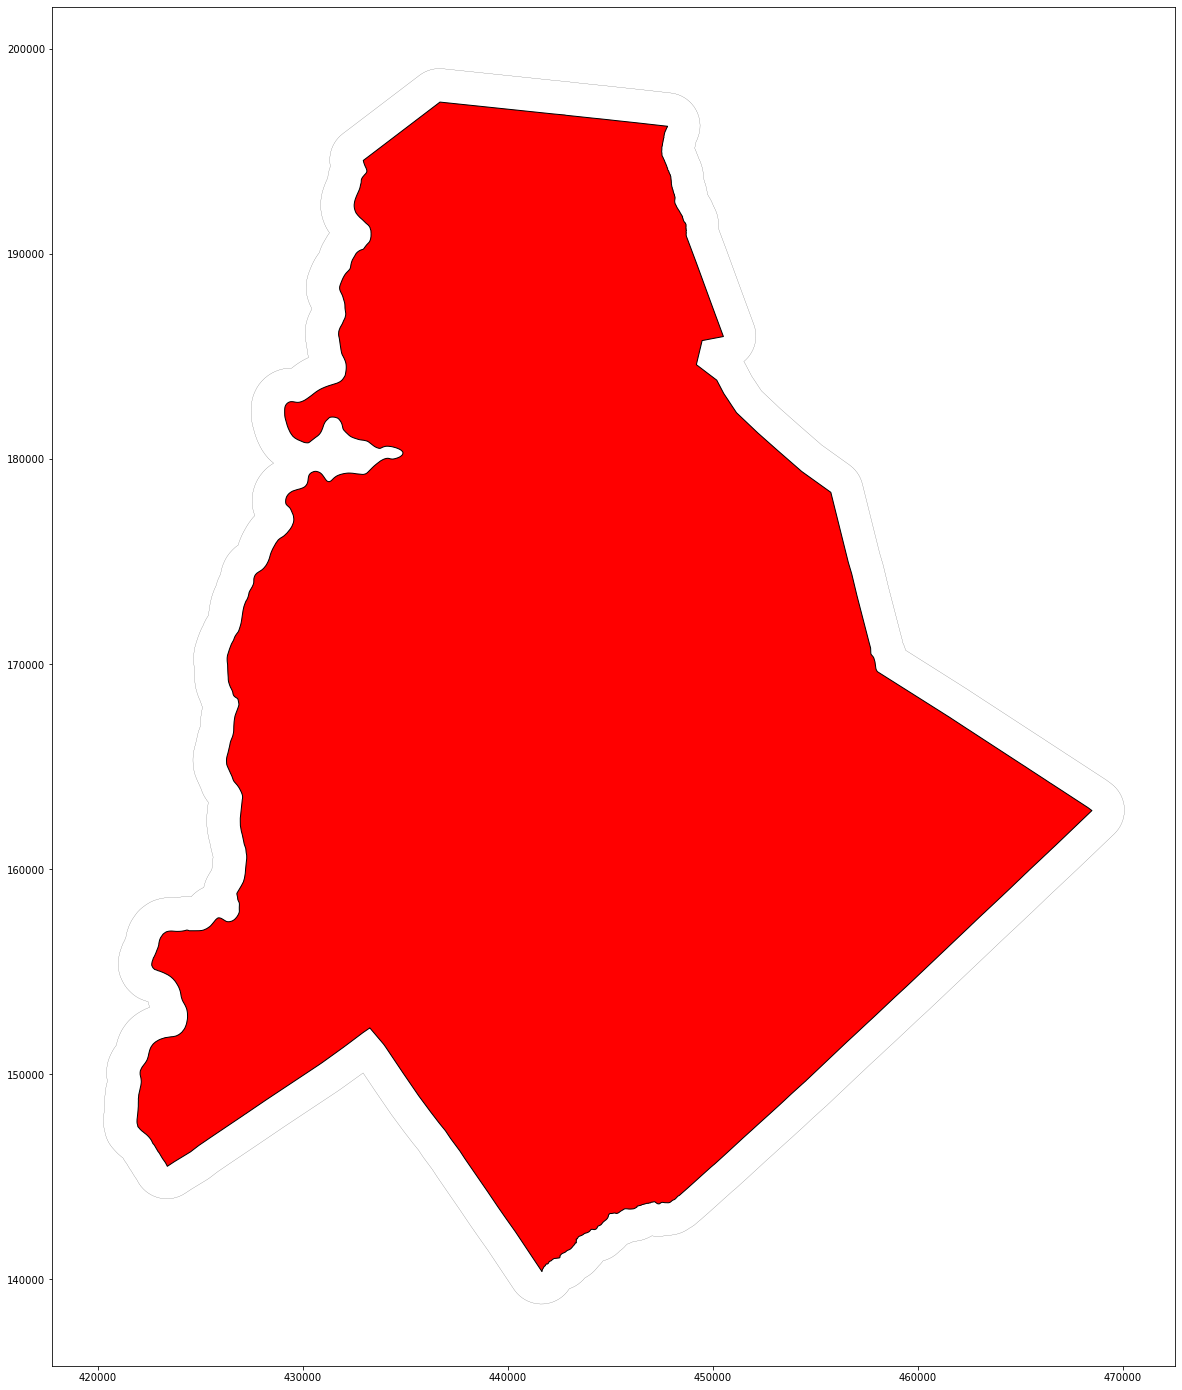

In [579]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

# Read the Eco and short term location file as gpd to get geometry

In [580]:
df = gpd.GeoDataFrame(
    nf1, geometry=gpd.points_from_xy(nf1.longitude, nf1.latitude))
df.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                     geometry  
0  POINT (-80.86114 35.20964)  
1  POINT (-80.81436 35.21828)  
2  POINT (-80.83725 35.17844)  
3  POINT (-80.85036 35.22164)  
4  POINT (-80.83834 35.21468)

In [581]:
# set the co-ordinate system first
df = df.set_crs("EPSG:4211")

In [582]:
print(df.crs)

EPSG:4211


In [583]:
# Let's take a copy of our layer
gdf0_proj = df.copy()

# Reproject the geometries by replacing the values with projected ones
eco_proj = gdf0_proj.to_crs(epsg=3358)
eco_proj.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                        geometry  
0  POINT (440167.090 163506.089)  
1  POINT (444442.876 164385.527)  
2  POINT (442277.682 160005.150)  
3  POINT (441173.175 164818.677)  
4  POINT (442252.867 164026.406)

In [584]:
# We can now plot our ``GeoDataFrame``.
#eco_proj.plot(eco_proj, color='red',figsize=(10,10))
#plt.show()

In [585]:
ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
ecoshort0.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                        geometry  
0  POINT (440167.090 163506.089)  
1  POINT (444442.876 164385.527)  
2  POINT (442277.682 160005.150)  
3  POINT (441173.175 164818.677)  
4  POINT (442252.867 164026.406)

In [586]:
#ecoshort0.reset_index(inplace=True)

In [587]:
#ecoshort0[ecoshort0.index.duplicated()]

# Filter the location by Extended Study area Boundary

In [588]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(ecoshort0, pba)
ecoshort.head()

site_id                            site_name sensor_type  year     region  \
0  P001CHA                      Blue Line Trail   permanent  2019  Charlotte   
3  P004CHA                   South Tryon Street   permanent  2019  Charlotte   
7  P009CHA  Little Sugar Creek Gwy-Freedom Park   permanent  2019  Charlotte   
6  P007CHA             Four Mile Creek Greenway   permanent  2019  Charlotte   
4  P005CHA                     Stonewall Street   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  393.654456  18.547945   5.958904   1236.0  35.209640   
3             1.0  149.292520  11.630137   4.780822   2049.0  35.221640   
7             3.0  727.206548  14.178082   4.438356    574.0  35.189526   
6             3.0  585.875325   4.753425   0.739726    795.0  35.074886   
4             2.0   33.307341   2.438356   1.136986   1443.0  35.214680   

   longitude                                 comment  osm_id_sensor  \
0 -80.861140  On top of bridge; Sidewalk + bike lane     55186886.0   
3 -80.850360                                     NaN     34764115.0   
7 -80.843660                                     NaN    235076258.0   
6 -80.839853                                     NaN    156886419.0   
4 -80.838340                                     NaN    322993730.0   

                        geometry  
0  POINT (440167.090 163506.089)  
3  POINT (441173.175 164818.677)  
7  POINT (441716.811 161245.530)  
6  POINT (441827.732 148524.391)  
4  POINT (442252.867 164026.406)

In [589]:
count_station=ecoshort.copy()

In [590]:
ecoshort=ecoshort.drop_duplicates(subset='osm_id_sensor')
ecoshort.head()

site_id                            site_name sensor_type  year     region  \
0  P001CHA                      Blue Line Trail   permanent  2019  Charlotte   
3  P004CHA                   South Tryon Street   permanent  2019  Charlotte   
7  P009CHA  Little Sugar Creek Gwy-Freedom Park   permanent  2019  Charlotte   
6  P007CHA             Four Mile Creek Greenway   permanent  2019  Charlotte   
4  P005CHA                     Stonewall Street   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  393.654456  18.547945   5.958904   1236.0  35.209640   
3             1.0  149.292520  11.630137   4.780822   2049.0  35.221640   
7             3.0  727.206548  14.178082   4.438356    574.0  35.189526   
6             3.0  585.875325   4.753425   0.739726    795.0  35.074886   
4             2.0   33.307341   2.438356   1.136986   1443.0  35.214680   

   longitude                                 comment  osm_id_sensor  \
0 -80.861140  On top of bridge; Sidewalk + bike lane     55186886.0   
3 -80.850360                                     NaN     34764115.0   
7 -80.843660                                     NaN    235076258.0   
6 -80.839853                                     NaN    156886419.0   
4 -80.838340                                     NaN    322993730.0   

                        geometry  
0  POINT (440167.090 163506.089)  
3  POINT (441173.175 164818.677)  
7  POINT (441716.811 161245.530)  
6  POINT (441827.732 148524.391)  
4  POINT (442252.867 164026.406)

<AxesSubplot:>

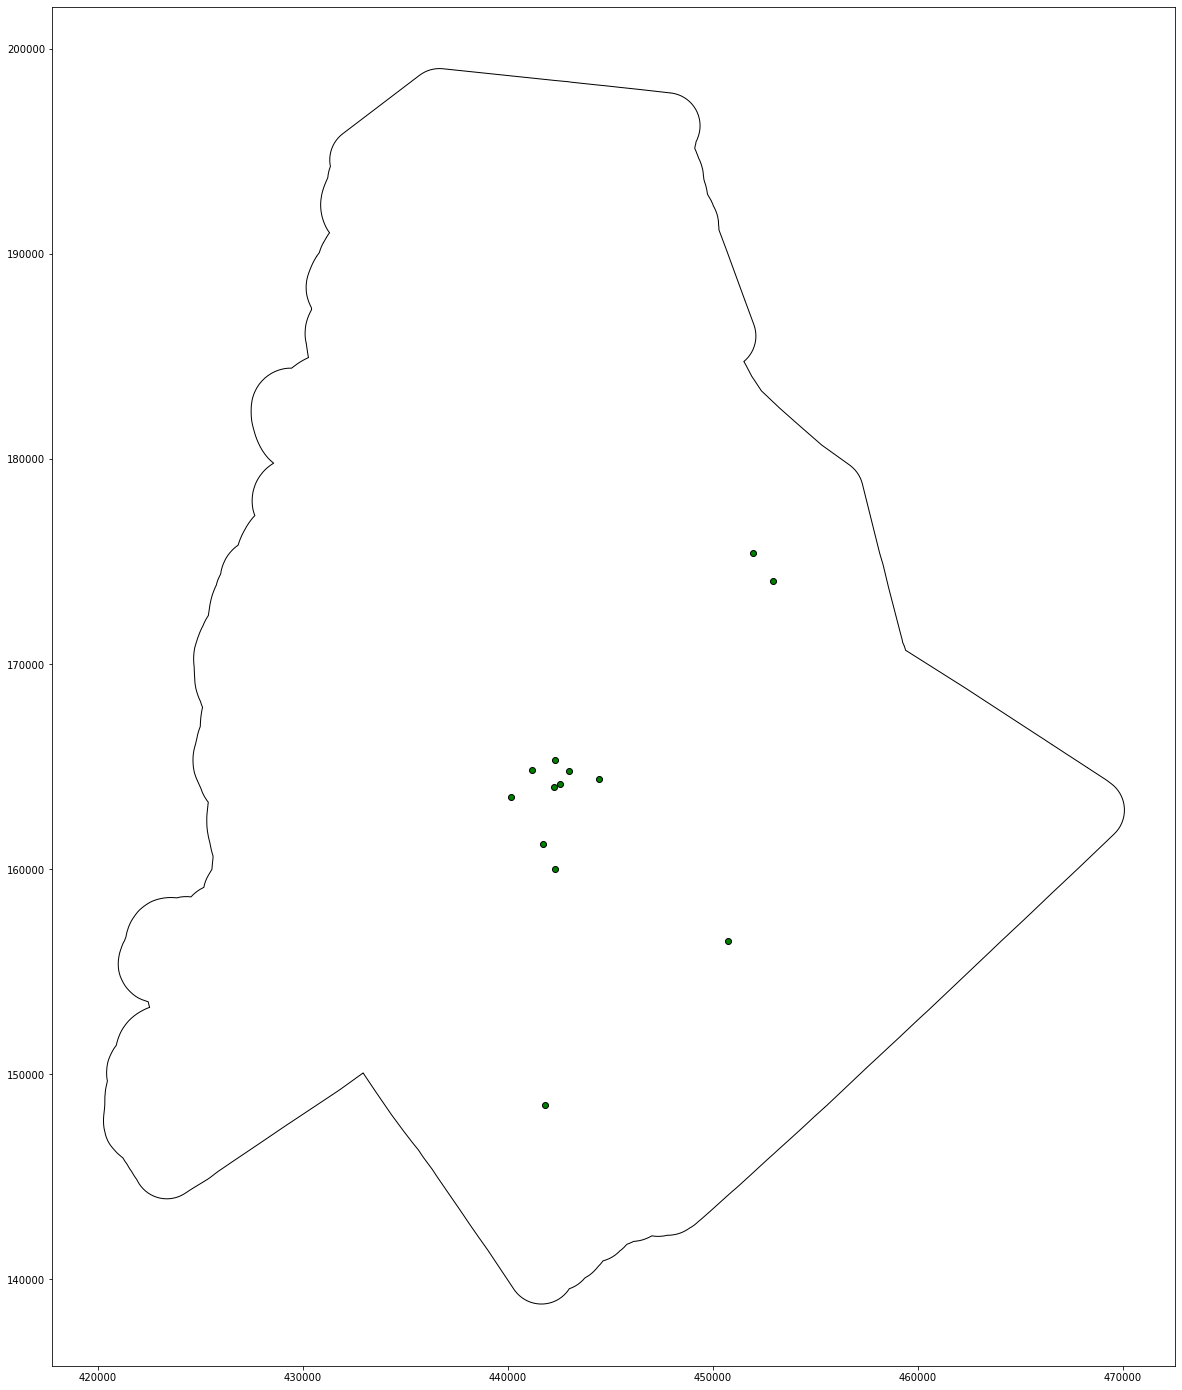

In [591]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [592]:
# Buffer file
#gdf1=nf3


In [593]:
gdf1 = ecoshort.copy()
gdf1['geometry'] = gdf1['geometry'].buffer(size)
gdf1.head()

site_id                            site_name sensor_type  year     region  \
0  P001CHA                      Blue Line Trail   permanent  2019  Charlotte   
3  P004CHA                   South Tryon Street   permanent  2019  Charlotte   
7  P009CHA  Little Sugar Creek Gwy-Freedom Park   permanent  2019  Charlotte   
6  P007CHA             Four Mile Creek Greenway   permanent  2019  Charlotte   
4  P005CHA                     Stonewall Street   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  393.654456  18.547945   5.958904   1236.0  35.209640   
3             1.0  149.292520  11.630137   4.780822   2049.0  35.221640   
7             3.0  727.206548  14.178082   4.438356    574.0  35.189526   
6             3.0  585.875325   4.753425   0.739726    795.0  35.074886   
4             2.0   33.307341   2.438356   1.136986   1443.0  35.214680   

   longitude                                 comment  osm_id_sensor  \
0 -80.861140  On top of bridge; Sidewalk + bike lane     55186886.0   
3 -80.850360                                     NaN     34764115.0   
7 -80.843660                                     NaN    235076258.0   
6 -80.839853                                     NaN    156886419.0   
4 -80.838340                                     NaN    322993730.0   

                                            geometry  
0  POLYGON ((443385.780 163506.089, 443370.281 16...  
3  POLYGON ((444391.865 164818.677, 444376.366 16...  
7  POLYGON ((444935.501 161245.530, 444920.002 16...  
6  POLYGON ((445046.422 148524.391, 445030.923 14...  
4  POLYGON ((445471.557 164026.406, 445456.058 16...

In [594]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

#https://geopandas.org/gallery/plotting_basemap_background.html

In [595]:
import contextily as ctx

In [596]:
print(gdf1.crs)

epsg:3358


In [597]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =2838 for Portland
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:3358") # provided by PSU
gdfm = gdfm.to_crs(epsg=3857) # This EPSG just for ploting

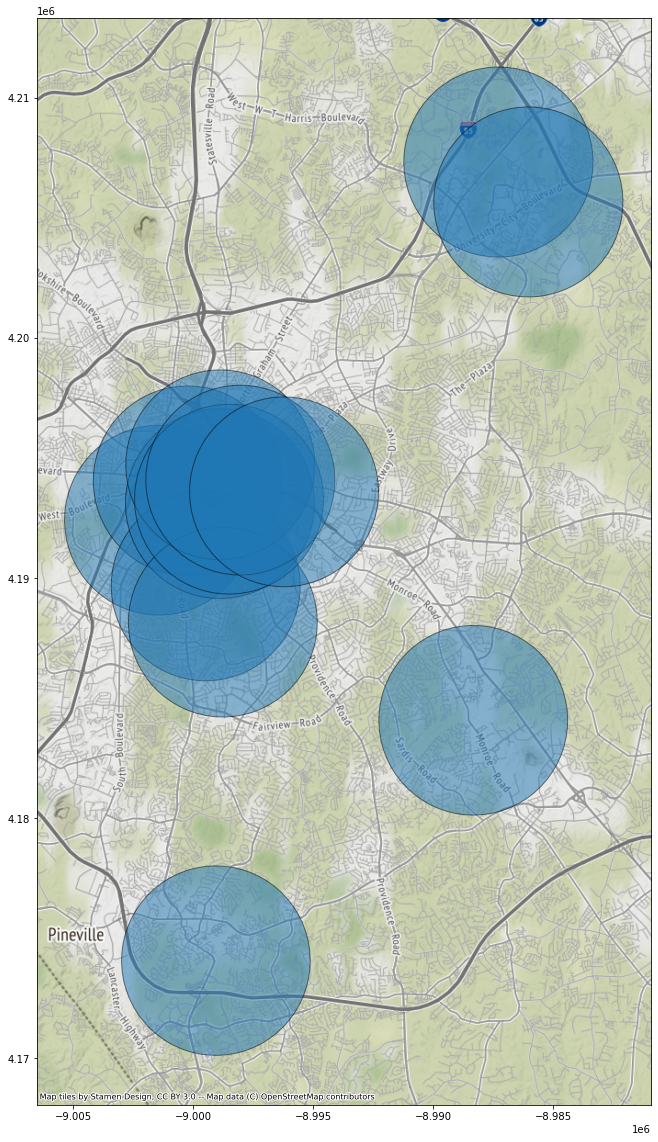

In [598]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate O, D and OD line

In [47]:
#bs1

In [48]:
#bs1['StartLatitude'] = bs1['StartLatitude'].apply(pd.to_numeric, errors='coerce')
#bs1['StartLongitude'] = bs1['StartLongitude'].apply(pd.to_numeric, errors='coerce')
#bs1['EndLatitude'] = bs1['EndLatitude'].apply(pd.to_numeric, errors='coerce')
#bs1['EndLongitude'] = bs1['EndLongitude'].apply(pd.to_numeric, errors='coerce')

In [49]:
#bs3=bs1[bs1['StartLatitude'].notna()]
#bs3.shape

# BS Origin

In [50]:
# Origin
#bso = gpd.GeoDataFrame(bs3, geometry=gpd.points_from_xy(bs3.StartLongitude, bs3.StartLatitude))
#bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
#bso.head(5)

In [51]:
# set the co-ordinate system first
#bso1 = bso.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
#bso1_proj = bso1.to_crs(epsg=3358)
#bso1_proj.head(5)

In [52]:
# Clip the data using GeoPandas clip
#bso1_clip = gpd.clip(bso1_proj, gdf1)
#bso1_clip.head(5)

In [53]:
 #int_bso=gpd.overlay(gdf1, bso1_clip, how='intersection', make_valid=True, keep_geom_type=False)
 #int_bso.head(5)

In [54]:
#int_bso.shape

In [55]:
#int_bso.geometry.plot()
#ax = gdf1.plot(figsize=(40, 30))
#int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [56]:
#output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_origin.columns=["osm_id","Bike Share Origin"]
#output_origin.head()

# BS destination

In [57]:
# Destination
#bsd = gpd.GeoDataFrame(
#    bs3, geometry=gpd.points_from_xy(bs3.EndLongitude, bs3.EndLatitude))
#bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
#bsd.head(5)

In [58]:
# set the co-ordinate system first
#bsd1 = bsd.set_crs("EPSG:4211")
# Reproject the geometries by replacing the values with projected ones
#bsd1_proj = bsd1.to_crs(epsg=3358)
#bsd1_proj.head(5)

In [59]:
# Clip the data using GeoPandas clip
#bsd1_clip = gpd.clip(bsd1_proj, gdf1)
#bsd1_clip.head(5)

In [60]:
#int_bsd=gpd.overlay(gdf1, bsd1_clip, how='intersection', make_valid=True, keep_geom_type=False)
#int_bsd.head(5)

In [61]:
#int_bsd.shape

In [62]:
#int_bsd.geometry.plot()
#plotting    
#ax = gdf1.plot(figsize=(40, 30))
#int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [63]:
#output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_destination.columns=["osm_id","Bike Share Destination"]
#output_destination.head()

# Bike Share OD line Crossing

In [64]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
#import shapely.geometry as geom
#bs_all_od=bs3.copy()
#bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
#bs_all_od.head(5)

In [65]:
# exclude the points outside of Portland
#bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-122)&(bs_all_od.StartLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-122)&(bs_all_od1.EndLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=45)&(bs_all_od1.StartLatitude<=46)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
#bs_all_od1.head(5)

In [66]:
#print(bs_all_od.crs)

In [67]:
#print(bs_all_od1.info())

In [68]:
#bs_all_od2 = gpd.GeoDataFrame(bs_all_od, geometry='geometry', crs={'init': 'epsg:4211'})
#bs_all_od2.head(5)

In [69]:
#print(bs_all_od2.crs)

In [70]:
#print(bs_all_od2.info())

In [71]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
#bs_all_od2_proj = bs_all_od2.to_crs(epsg=3358)
#bs_all_od2_proj.head(5)

In [72]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [73]:
#spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

In [74]:
# Clip the data using GeoPandas clip
#odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
#odc1_clip.head(5)

In [75]:
#int_odl=gpd.overlay(gdf1, odc1_clip, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl.head(5)

In [76]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [77]:
#output_odl=spj.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_odl.columns=["osm_id","Bike Share Crossing"]
#output_odl.head()

# Now import land use shape file

In [78]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

osm_id            name          type  \
0  33142125            None  conservation   
1  33153532      Long Tract  conservation   
2  33177699   Carl A. Saine  conservation   
3  33177769  Harriet Melton  conservation   
4  33177826   Carl A. Saine  conservation   

                                            geometry  
0  POLYGON ((-80.73212 35.55451, -80.73202 35.555...  
1  POLYGON ((-81.29272 35.52509, -81.29287 35.525...  
2  POLYGON ((-81.37837 35.44677, -81.37749 35.449...  
3  POLYGON ((-80.68862 35.45999, -80.68844 35.459...  
4  POLYGON ((-81.37837 35.44677, -81.37784 35.444...

# Define and then Convert the co-ordinate system

In [79]:
# set the co-ordinate system first
#lusec = luse.set_crs("EPSG:4326")

In [80]:
# Let's take a copy of our layer
luse_proj = lusec.copy()

# Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=3358)
luse_proj.head(5)

osm_id            name          type  \
0  33142125            None  conservation   
1  33153532      Long Tract  conservation   
2  33177699   Carl A. Saine  conservation   
3  33177769  Harriet Melton  conservation   
4  33177826   Carl A. Saine  conservation   

                                            geometry  
0  POLYGON ((452579.049 201544.193, 452590.394 20...  
1  POLYGON ((401692.062 199312.355, 401677.906 19...  
2  POLYGON ((393718.126 190809.082, 393804.683 19...  
3  POLYGON ((456343.583 190992.629, 456359.607 19...  
4  POLYGON ((393718.126 190809.082, 393761.620 19...

# Visualize

<AxesSubplot:>

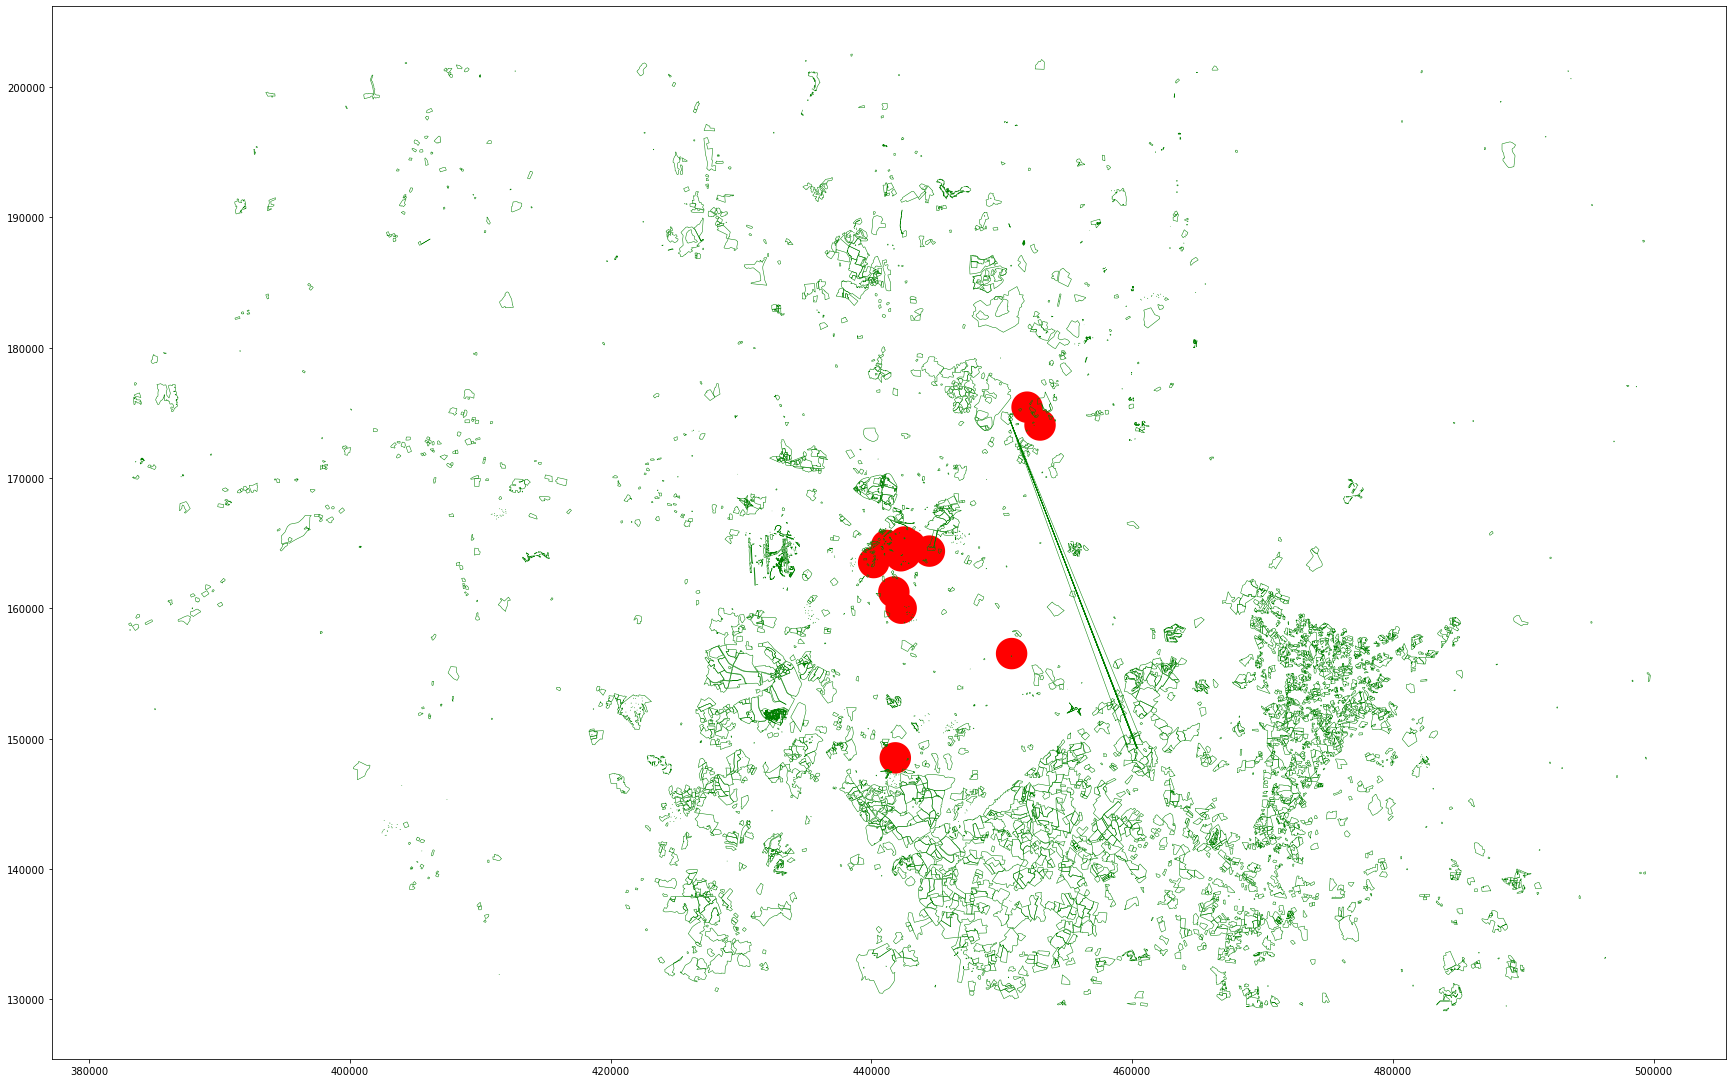

In [81]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [82]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

In [83]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [84]:
#luse_proj.exterior.type

In [85]:
#gdf1.exterior.type

In [86]:
#luse_proj.exterior.is_valid

In [87]:
#gdf1.exterior.is_valid

In [88]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id            name          type  \
0  33142125            None  conservation   
1  33153532      Long Tract  conservation   
2  33177699   Carl A. Saine  conservation   
3  33177769  Harriet Melton  conservation   
4  33177826   Carl A. Saine  conservation   

                                            geometry  
0  POLYGON ((452579.049 201544.193, 452590.394 20...  
1  POLYGON ((401692.062 199312.355, 401677.906 19...  
2  POLYGON ((393718.126 190809.082, 393804.683 19...  
3  POLYGON ((456343.583 190992.629, 456359.607 19...  
4  POLYGON ((393718.126 190809.082, 393761.620 19...

In [89]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

osm_id                  name              type  \
23   62005659                  None  recreation_groun   
46  131139726                  None             grass   
51  169278790                  None            meadow   
52  169460851  Bonnie Cone Memorial          cemetery   
53  169462409  Susie Harwood Garden  greenhouse_horti   

                                             geometry  
23  POLYGON ((452154.301 175724.429, 452232.410 17...  
46  POLYGON ((440892.290 165309.560, 440893.995 16...  
51  POLYGON ((452592.335 174773.575, 452506.438 17...  
52  POLYGON ((452483.605 174029.091, 452492.451 17...  
53  POLYGON ((452367.980 174259.215, 452414.051 17...

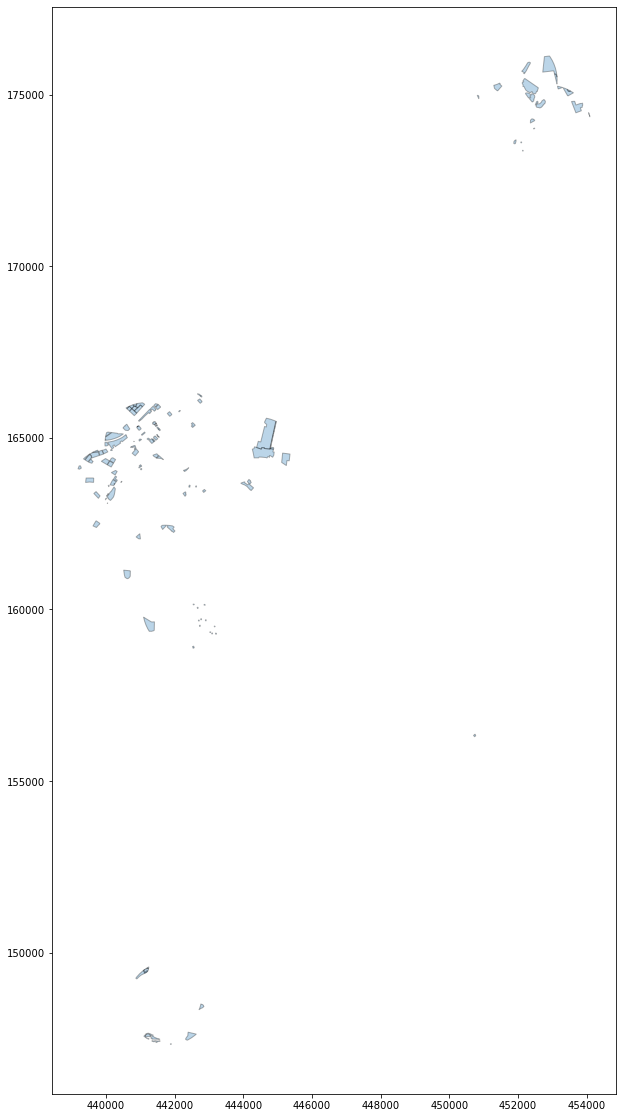

In [90]:
ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [91]:
 intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
 intdata.head(5)

site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor     osm_id  \
0  On top of bridge; Sidewalk + bike lane     55186886.0  259488001   
1  On top of bridge; Sidewalk + bike lane     55186886.0  511525593   
2  On top of bridge; Sidewalk + bike lane     55186886.0  547111806   
3  On top of bridge; Sidewalk + bike lane     55186886.0  547158341   
4  On top of bridge; Sidewalk + bike lane     55186886.0  547660396   

                             name              type  \
0                 Shopping Center            retail   
1                            None  recreation_groun   
2  Design Center of the Carolinas        commercial   
3        Atherton Mill and Market            retail   
4         The Square at South End      construction   

                                            geometry  
0  POLYGON ((439819.986 162500.469, 439806.401 16...  
1  POLYGON ((439277.081 164114.388, 439225.602 16...  
2  POLYGON ((440198.821 163780.243, 440297.176 16...  
3  POLYGON ((440269.334 163508.049, 440263.159 16...  
4  POLYGON ((440324.018 164019.057, 440263.808 16...

In [92]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor     osm_id  \
0  On top of bridge; Sidewalk + bike lane     55186886.0  259488001   
1  On top of bridge; Sidewalk + bike lane     55186886.0  511525593   
2  On top of bridge; Sidewalk + bike lane     55186886.0  547111806   
3  On top of bridge; Sidewalk + bike lane     55186886.0  547158341   
4  On top of bridge; Sidewalk + bike lane     55186886.0  547660396   

                             name              type  \
0                 Shopping Center            retail   
1                            None  recreation_groun   
2  Design Center of the Carolinas        commercial   
3        Atherton Mill and Market            retail   
4         The Square at South End      construction   

                                            geometry           Area  
0  POLYGON ((439819.986 162500.469, 439806.401 16...  221586.412693  
1  POLYGON ((439277.081 164114.388, 439225.602 16...   65467.928288  
2  POLYGON ((440198.821 163780.243, 440297.176 16...  180766.997848  
3  POLYGON ((440269.334 163508.049, 440263.159 16...  480385.890028  
4  POLYGON ((440324.018 164019.057, 440263.808 16...  119032.752394

#https://geopandas.org/docs/user_guide/set_operations.html

<AxesSubplot:>

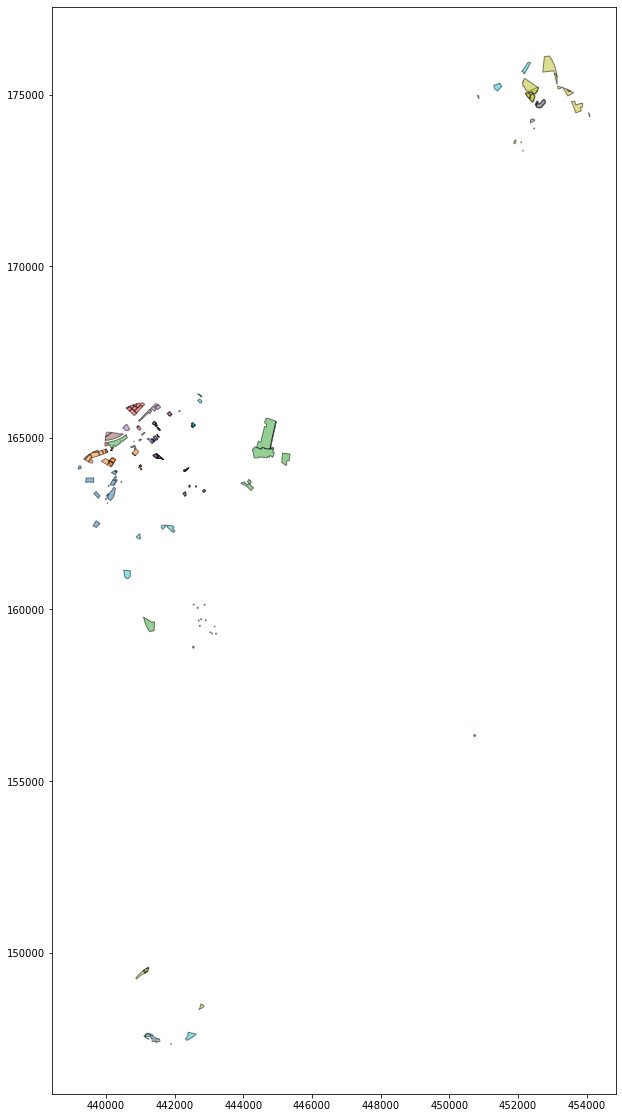

In [93]:
intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [94]:
output_landuse=intdata.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_landuse.columns=['osm_id','type','Area']
output_landuse.head()

osm_id         type          Area
0  16694967.0        grass  2.599842e+04
1  16701397.0        grass  5.421893e+04
2  16701397.0     military  6.382409e+05
3  16701397.0    religious  4.228023e+04
4  16701397.0  residential  3.186722e+06

In [95]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_commercial.columns=['osm_id','Commercial Area ']
output_commercial.head()

osm_id  Commercial Area 
0  55186886.0     180766.997848

In [96]:
gdf1.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                                            geometry  
0  POLYGON ((441374.098 163506.089, 441368.286 16...  
1  POLYGON ((445649.884 164385.527, 445644.071 16...  
2  POLYGON ((443484.690 160005.150, 443478.878 15...  
3  POLYGON ((442380.183 164818.677, 442374.371 16...  
4  POLYGON ((443459.875 164026.406, 443454.063 16...

<AxesSubplot:>

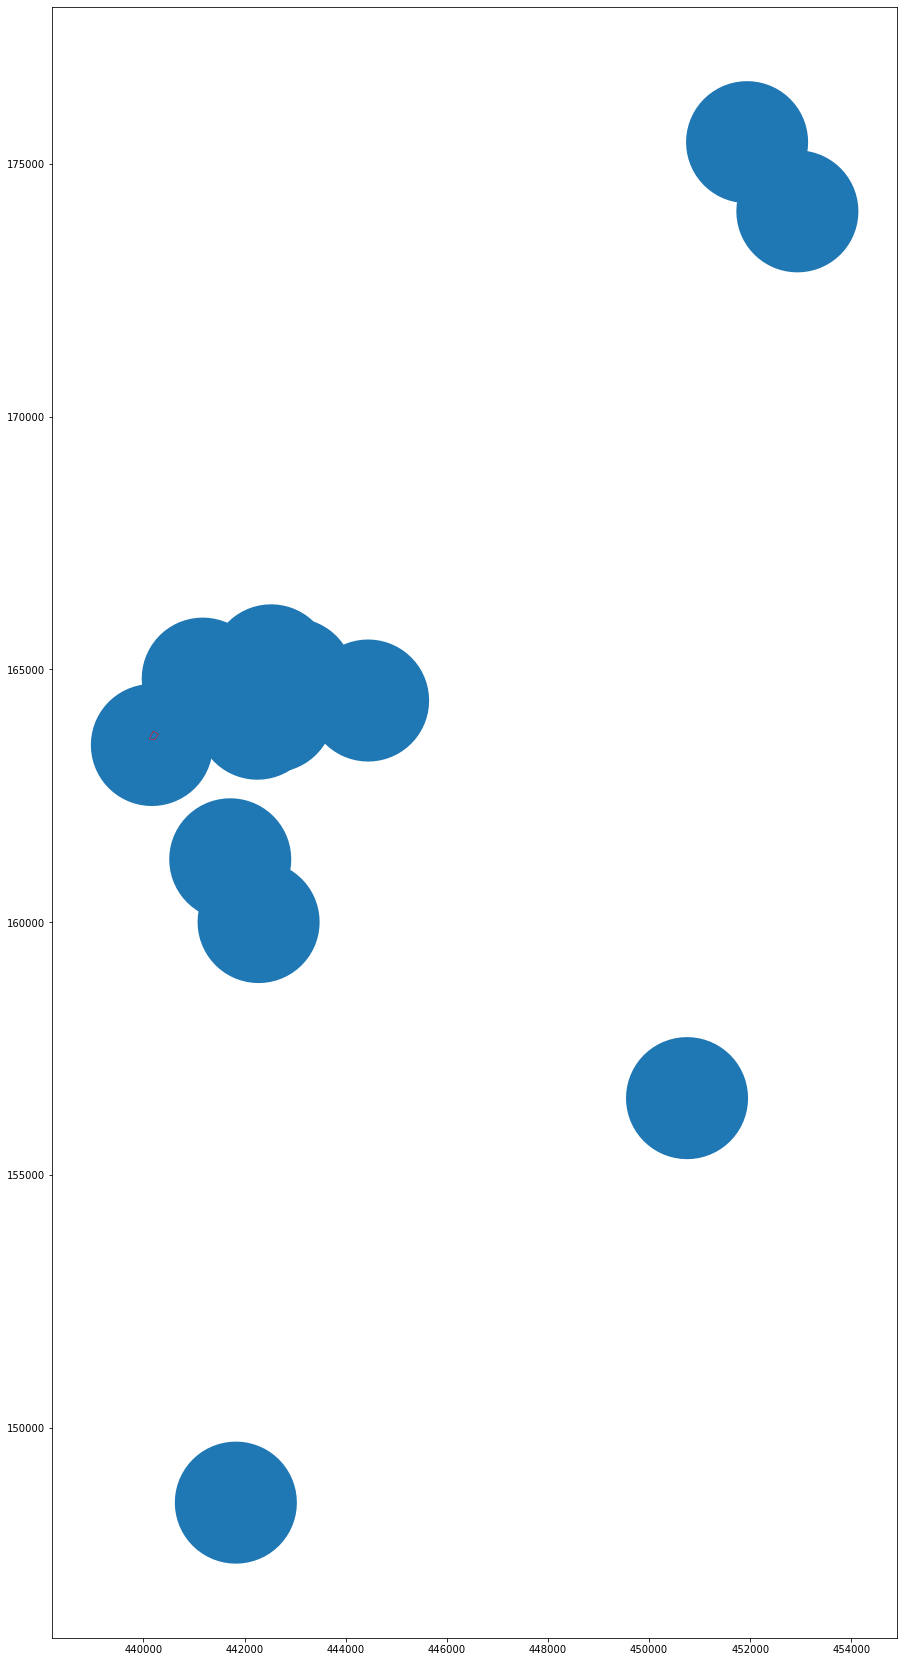

In [97]:
#plotting    
ax = gdf1.plot(figsize=(40, 30))
commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [98]:
# Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_industrial.columns=['osm_id','Industrial Area ']
output_industrial.head()

osm_id  Industrial Area 
0  34764115.0     787270.692507

In [99]:
# Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_residential.columns=['osm_id','Residential_Area ']
output_residential.head()

osm_id  Residential_Area 
0   16701397.0       3.186722e+06
1   34764115.0       1.373140e+06
2   55186886.0       1.557276e+06
3  156886419.0       6.950555e+05
4  169185539.0       1.967273e+06

In [100]:
residential.head(5)

site_id           site_name sensor_type  year     region  travel_pattern  \
23  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
24  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
25  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
26  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
27  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
23  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
24  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
25  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
26  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
27  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                   comment  osm_id_sensor     osm_id  name  \
23  On top of bridge; Sidewalk + bike lane     55186886.0  780734121  None   
24                                     NaN     34764115.0  780734121  None   
25  On top of bridge; Sidewalk + bike lane     55186886.0  780737121  None   
26                                     NaN     34764115.0  780737121  None   
27  On top of bridge; Sidewalk + bike lane     55186886.0  781940549  None   

           type                                           geometry  \
23  residential  POLYGON ((440278.863 164365.446, 440221.228 16...   
24  residential  POLYGON ((440278.863 164365.446, 440221.228 16...   
25  residential  POLYGON ((440149.008 164147.489, 440037.483 16...   
26  residential  POLYGON ((440108.689 164249.697, 440088.226 16...   
27  residential  POLYGON ((440095.883 164329.733, 440097.493 16...   

             Area  
23  152856.450134  
24  152856.450134  
25  178977.480599  
26  100992.830101  
27  234453.619317

<AxesSubplot:>

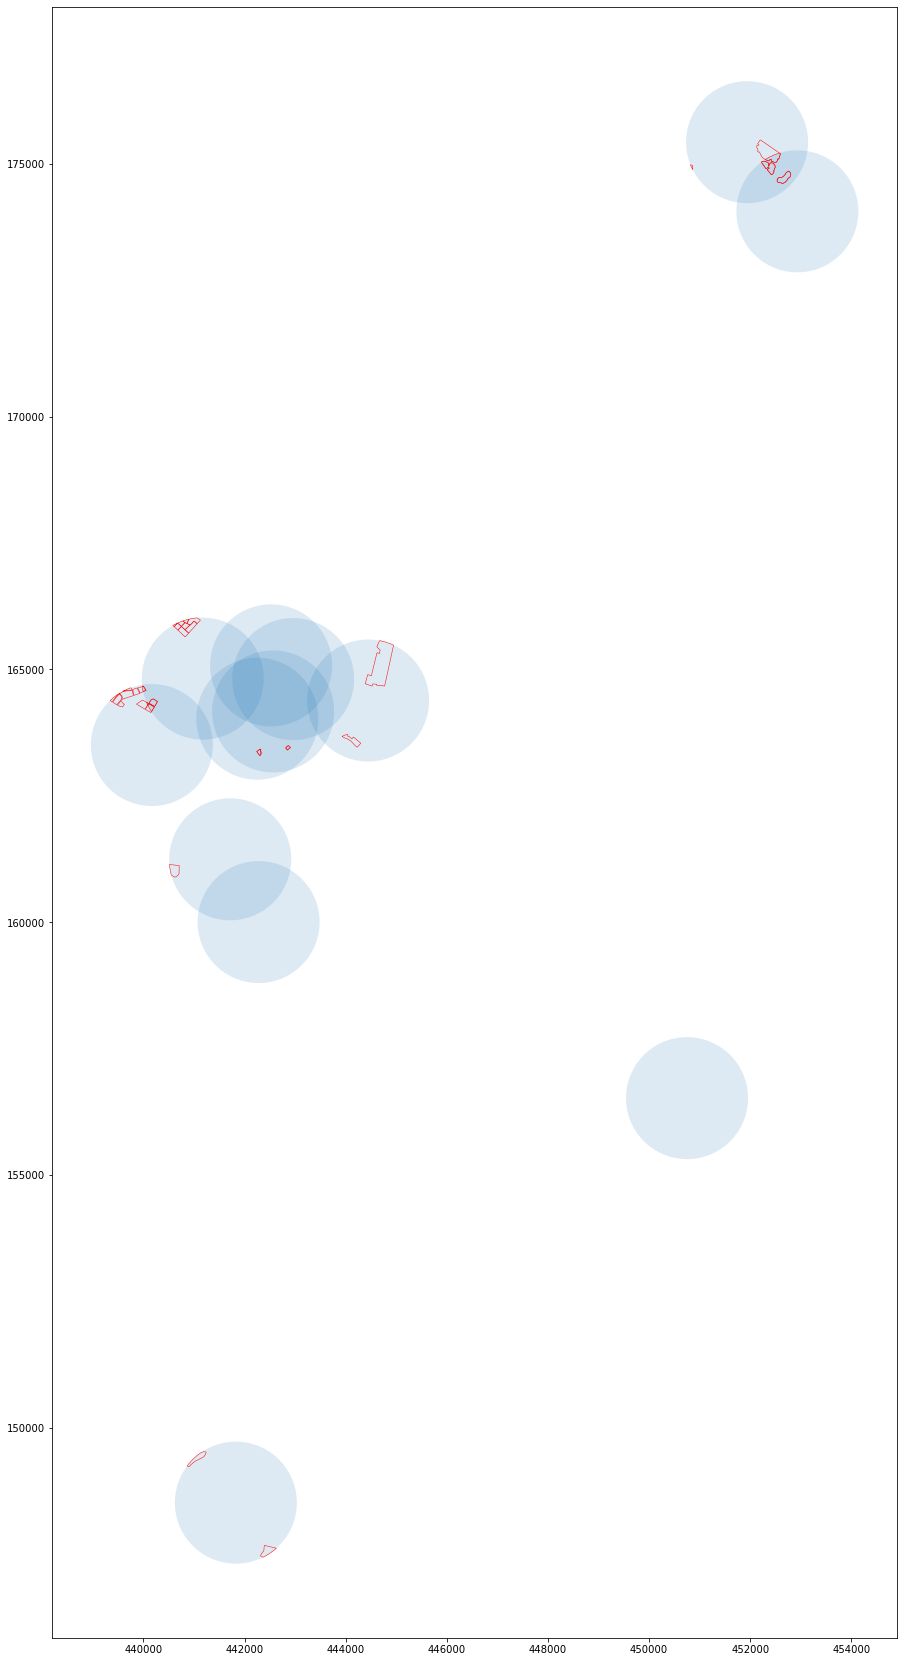

In [101]:
#plotting    
ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [102]:
# Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_retail.columns=['osm_id','Retail Area']
output_retail.head()

osm_id   Retail Area
0   16701397.0  1.741495e+06
1   34764115.0  4.097728e+04
2   51062797.0  4.097728e+04
3   55186886.0  7.019723e+05
4  156886419.0  8.043572e+03

In [103]:
# Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_grass.columns=['osm_id','Grass Area']
output_grass.head()

osm_id     Grass Area
0  16694967.0   25998.419780
1  16701397.0   54218.933261
2  34764115.0  835287.087145
3  51062797.0  326611.702735
4  51062957.0  133177.314571

In [104]:
output_grass.index

RangeIndex(start=0, stop=11, step=1)

# Use the Natural Shape file to calculate the Park, water and green spaces

In [105]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  
0  POLYGON ((-80.90901 35.06030, -80.90856 35.060...  
1  POLYGON ((-81.00779 34.95860, -81.00766 34.958...  
2  POLYGON ((-80.41479 35.55536, -80.41462 35.555...  
3  POLYGON ((-80.63218 35.51301, -80.63218 35.512...  
4  POLYGON ((-80.63538 35.50982, -80.63515 35.509...

In [106]:
# set the co-ordinate system first
# nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=3358)
nature_proj.head(5)

osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [107]:
#nature_proj.plot()

<AxesSubplot:>

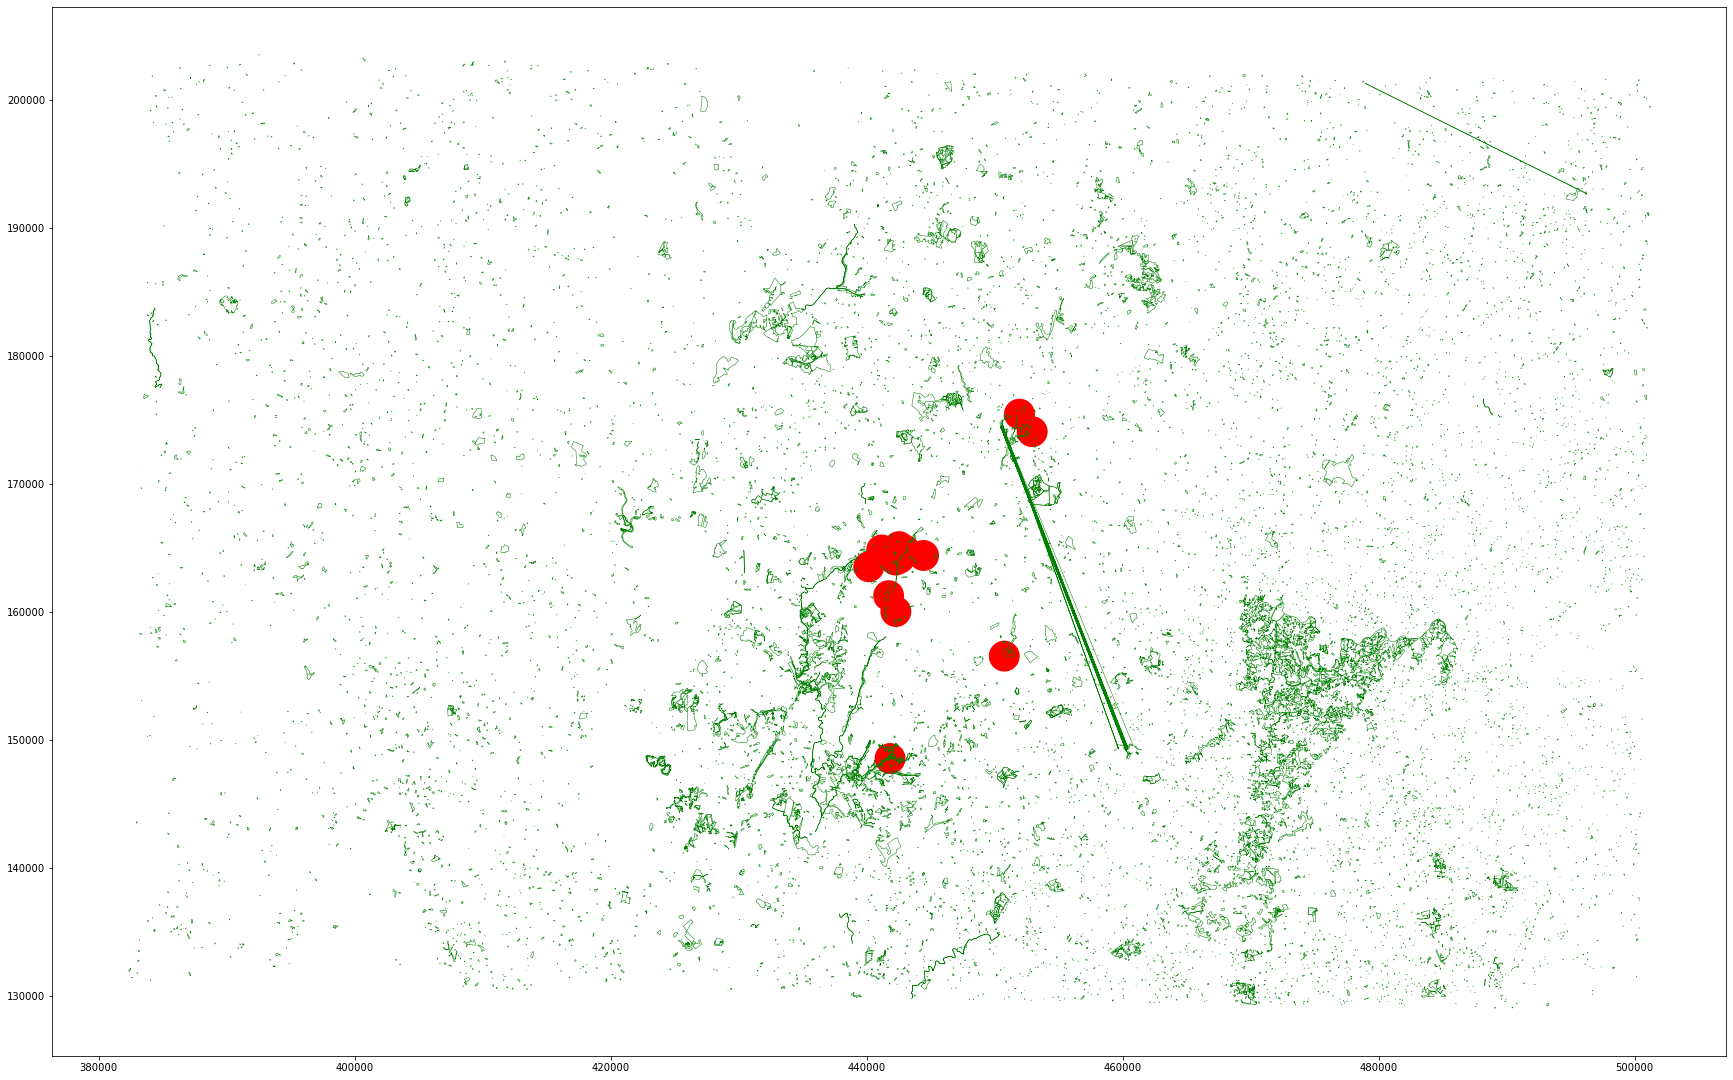

In [108]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [109]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  \
0  POLYGON ((435491.760 147025.118, 435532.019 14...   
1  POLYGON ((426255.504 135924.201, 426267.436 13...   
2  POLYGON ((481345.309 201183.155, 481360.678 20...   
3  POLYGON ((461562.704 196787.723, 461561.621 19...   
4  POLYGON ((461266.224 196439.110, 461286.351 19...   

                                           geometry2  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [110]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                           geometry2  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [111]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [112]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

osm_id              name   type  \
42    38619507  Fourth Ward Park   park   
910   41364061              None  water   
1098  41364336              None  water   
1231  41364520              None  water   
1754  41365252              None  water   
1875  41365410              None  water   
5004  41370420              None  water   
5749  41371370              None  water   
5851  41371507              None  water   
8306  47588319              None  water   

                                               geometry  
42    POLYGON ((441841.219 165919.643, 441971.216 16...  
910   POLYGON ((453093.092 173635.407, 453101.183 17...  
1098  POLYGON ((451767.344 175802.108, 451775.282 17...  
1231  POLYGON ((453127.704 175610.052, 453127.158 17...  
1754  POLYGON ((453088.456 175777.211, 453091.620 17...  
1875  POLYGON ((453078.621 172865.929, 453079.433 17...  
5004  POLYGON ((452982.224 172935.258, 452974.884 17...  
5749  POLYGON ((453114.834 175678.564, 453108.744 17...  
5851  POLYGON ((452216.565 176505.558, 452206.181 17...  
8306  POLYGON ((450995.576 156721.030, 450987.951 15...

In [113]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head()

site_id         site_name sensor_type  year     region  travel_pattern  \
0  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P005CHA  Stonewall Street   permanent  2019  Charlotte             2.0   
4  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor     osm_id  \
0  On top of bridge; Sidewalk + bike lane     55186886.0  146306520   
1  On top of bridge; Sidewalk + bike lane     55186886.0  255557588   
2  On top of bridge; Sidewalk + bike lane     55186886.0  256838595   
3                                     NaN    322993730.0  256838595   
4  On top of bridge; Sidewalk + bike lane     55186886.0  256911510   

                           name  type  \
0                          None  park   
1  Sedgefield Neighborhood Park  park   
2                    Latta Park  park   
3                    Latta Park  park   
4      Southside Community Park  park   

                                            geometry  
0  POLYGON ((440795.924 163628.218, 440787.862 16...  
1  POLYGON ((440402.566 162322.273, 440368.145 16...  
2  POLYGON ((441368.286 163387.782, 441350.906 16...  
3  POLYGON ((441260.783 163340.313, 441258.823 16...  
4  POLYGON ((439042.598 163070.354, 439043.152 16...

In [114]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head()

site_id         site_name sensor_type  year     region  travel_pattern  \
0  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P005CHA  Stonewall Street   permanent  2019  Charlotte             2.0   
4  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor     osm_id  \
0  On top of bridge; Sidewalk + bike lane     55186886.0  146306520   
1  On top of bridge; Sidewalk + bike lane     55186886.0  255557588   
2  On top of bridge; Sidewalk + bike lane     55186886.0  256838595   
3                                     NaN    322993730.0  256838595   
4  On top of bridge; Sidewalk + bike lane     55186886.0  256911510   

                           name  type  \
0                          None  park   
1  Sedgefield Neighborhood Park  park   
2                    Latta Park  park   
3                    Latta Park  park   
4      Southside Community Park  park   

                                            geometry           Area  
0  POLYGON ((440795.924 163628.218, 440787.862 16...    1812.522242  
1  POLYGON ((440402.566 162322.273, 440368.145 16...   43648.606161  
2  POLYGON ((441368.286 163387.782, 441350.906 16...  448051.237344  
3  POLYGON ((441260.783 163340.313, 441258.823 16...  917450.580571  
4  POLYGON ((439042.598 163070.354, 439043.152 16...  709613.535524

In [115]:
#inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

In [116]:
output_nature=inter_nature.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_nature.head()

osm_id_sensor    type          Area
0     16694967.0    park  6.287200e+06
1     16694967.0   water  5.929251e+05
2     16701397.0    park  1.739252e+06
3     16701397.0   water  6.724249e+03
4     34764115.0  forest  5.389694e+04

In [117]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_park.columns=['osm_id',"Park Area"]
output_park.head()

osm_id     Park Area
0  16694967.0  6.287200e+06
1  16701397.0  1.739252e+06
2  34764115.0  3.626492e+05
3  51062797.0  2.021232e+06
4  51062957.0  2.768258e+06

In [118]:
# Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_water.columns=['osm_id',"Water Area"]
output_water.head()

osm_id     Water Area
0  16694967.0  592925.094202
1  16701397.0    6724.248967
2  34764115.0   53824.651221
3  51062797.0   56724.760772
4  51062957.0   55115.230271

In [119]:
# Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_forest.columns=['osm_id',"Forest Area"]
output_forest.head()

osm_id   Forest Area
0   34764115.0  5.389694e+04
1   51062797.0  2.539043e+05
2   51062957.0  2.539043e+05
3   55186886.0  2.671102e+04
4  156886419.0  8.312772e+06

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [120]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head()

osm_id timestamp  name              type                    geometry
0   34192424      None  None  motorway_junctio  POINT (-81.48188 35.15605)
1  110066155      None  None  motorway_junctio  POINT (-81.47758 35.15888)
2  110073796      None  None  motorway_junctio  POINT (-81.44946 35.16576)
3  110140240      None  None  motorway_junctio  POINT (-81.45184 35.16432)
4  110192271      None  None              stop  POINT (-81.47950 35.15589)

In [121]:
# set the co-ordinate system first
#pts = pts.set_crs("EPSG:4326")
# Let's take a copy of our layer
pts_proj = pts.copy()

# Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=3358)
pts_proj.head()

osm_id timestamp  name              type                       geometry
0   34192424      None  None  motorway_junctio  POINT (383518.625 158798.761)
1  110066155      None  None  motorway_junctio  POINT (383917.497 159103.168)
2  110073796      None  None  motorway_junctio  POINT (386497.922 159801.838)
3  110140240      None  None  motorway_junctio  POINT (386276.538 159647.350)
4  110192271      None  None              stop  POINT (383734.588 158775.409)

<AxesSubplot:>

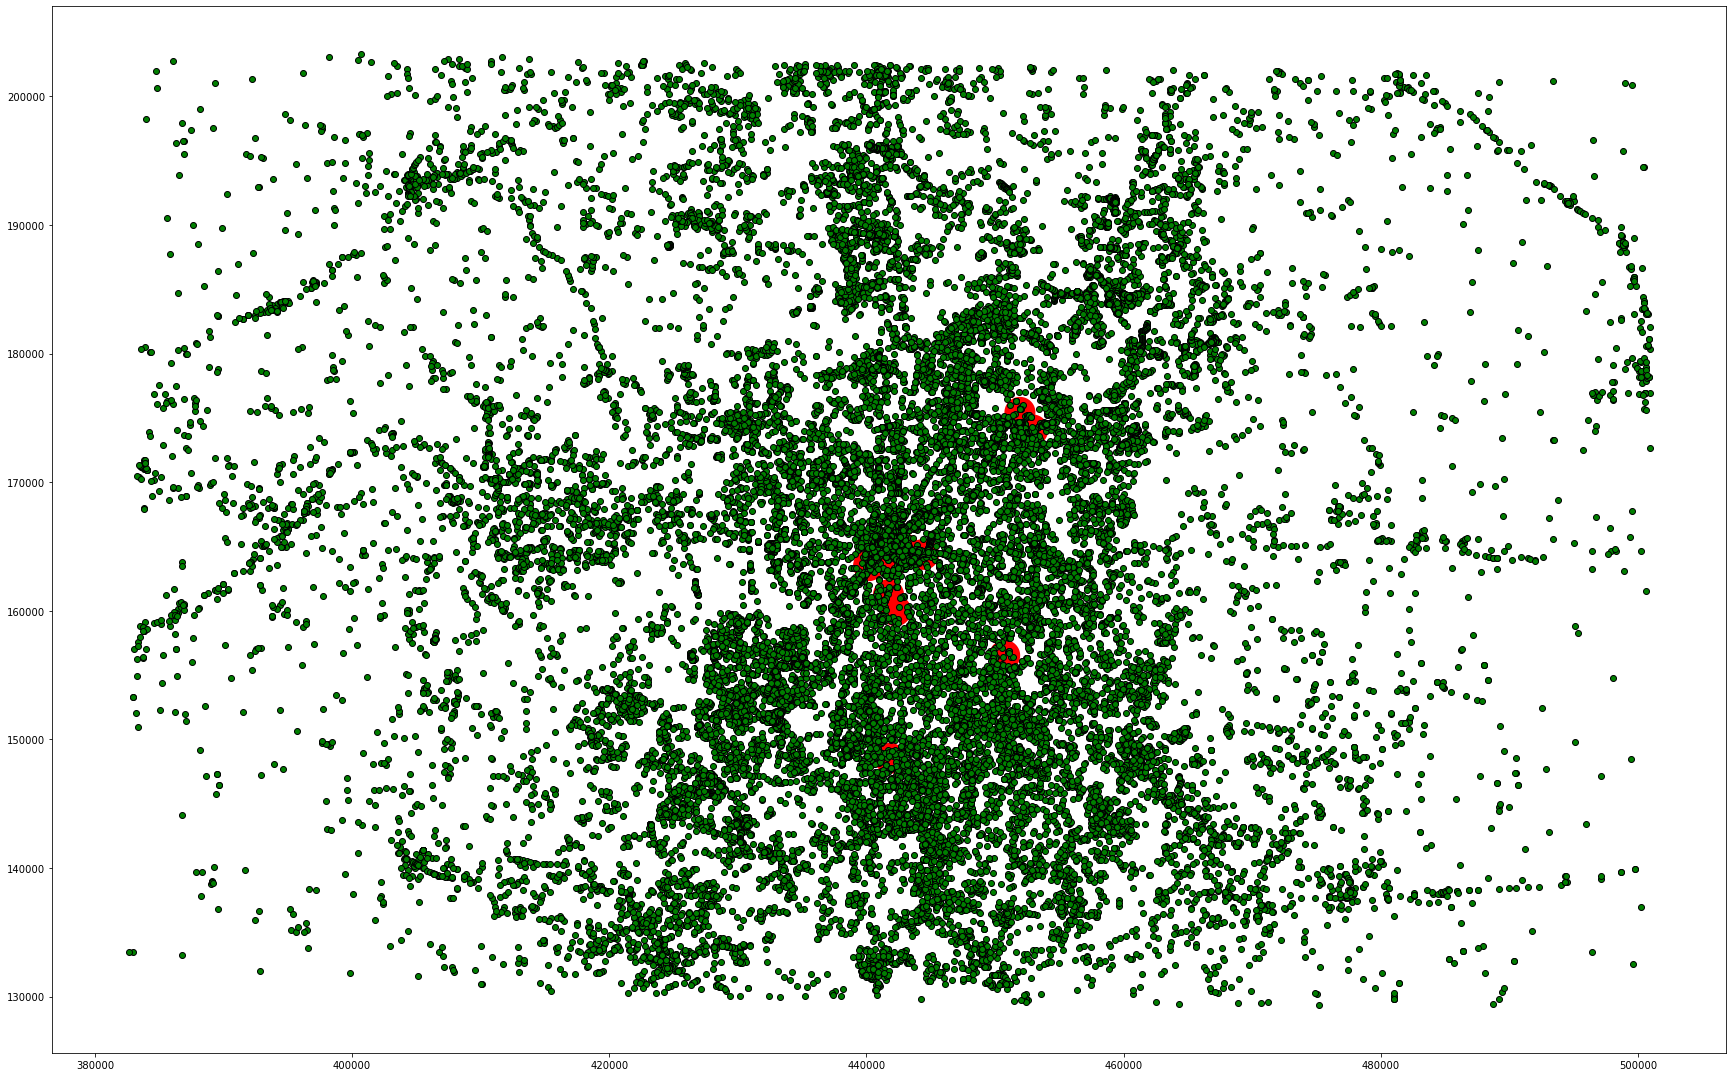

In [122]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [123]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head()

osm_id timestamp  name              type  \
3703  172132377      None  None   traffic_signals   
3709  172132813      None  None  motorway_junctio   
3736  172138680      None  None  motorway_junctio   
3743  172140020      None  None   traffic_signals   
3758  172142295      None  None   traffic_signals   

                           geometry  
3703  POINT (442938.554 163921.371)  
3709  POINT (441254.957 147467.541)  
3736  POINT (441926.460 164132.836)  
3743  POINT (442452.121 166104.145)  
3758  POINT (441613.018 164715.907)

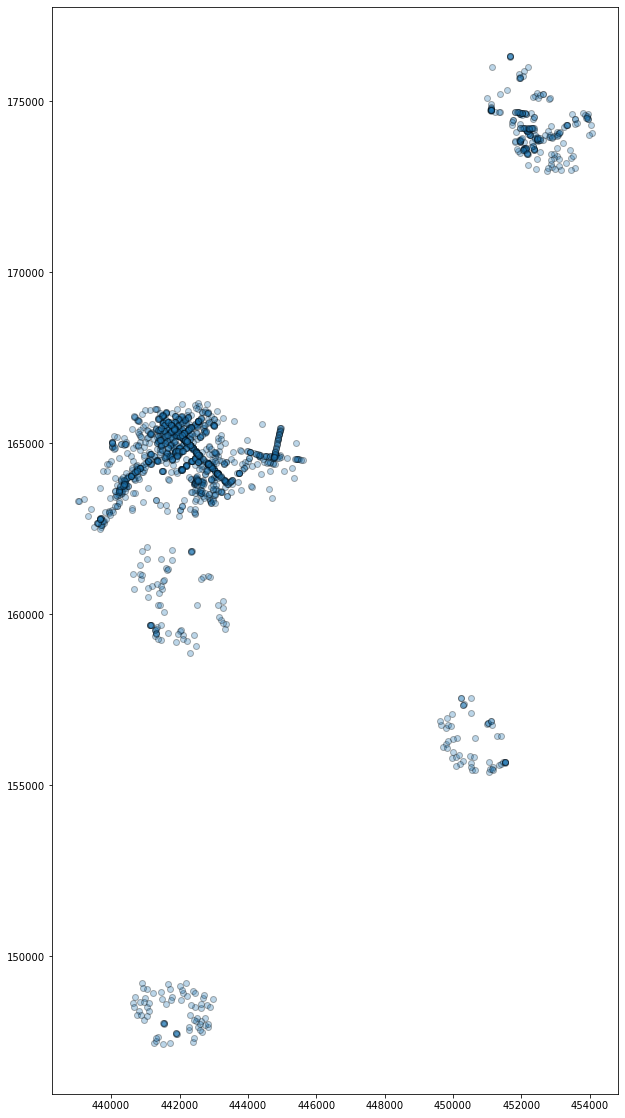

In [124]:
ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [125]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor     osm_id timestamp  \
0  On top of bridge; Sidewalk + bike lane     55186886.0  172167419      None   
1  On top of bridge; Sidewalk + bike lane     55186886.0  172167437      None   
2  On top of bridge; Sidewalk + bike lane     55186886.0  172169004      None   
3  On top of bridge; Sidewalk + bike lane     55186886.0  172182622      None   
4  On top of bridge; Sidewalk + bike lane     55186886.0  172200386      None   

   name             type                       geometry  
0  None  traffic_signals  POINT (440484.147 163733.603)  
1  None  traffic_signals  POINT (440690.272 163537.250)  
2  None   turning_circle  POINT (440595.636 163102.543)  
3  None  traffic_signals  POINT (439776.994 162708.930)  
4  None  traffic_signals  POINT (440039.342 163049.723)

# Calculate the bicycle parking

In [126]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)


site_id           site_name sensor_type  year     region  travel_pattern  \
154  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
155  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
211  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
212  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
931  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   

          AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
154  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
155  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
211  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
212  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
931  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   

                                    comment  osm_id_sensor      osm_id  \
154  On top of bridge; Sidewalk + bike lane     55186886.0  1278639703   
155                                     NaN     34764115.0  1278639703   
211  On top of bridge; Sidewalk + bike lane     55186886.0  -194974434   
212                                     NaN     34764115.0  -194974434   
931                                     NaN     34764115.0  -293345358   

    timestamp  name             type                       geometry  
154      None  None  bicycle_parking  POINT (440417.742 163898.120)  
155      None  None  bicycle_parking  POINT (440417.742 163898.120)  
211      None  None  bicycle_parking  POINT (440570.629 164623.611)  
212      None  None  bicycle_parking  POINT (440570.629 164623.611)  
931      None  None  bicycle_parking  POINT (441713.770 165330.737)

In [127]:
output_bparking=b_parking.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bparking.columns=["osm_id","Bicycle Parking"]
output_bparking.head()

osm_id  Bicycle Parking
0   34764115.0                5
1   51062797.0                3
2   51062957.0                3
3   55186886.0                2
4  169185539.0                1

# Calculate bus stops

In [128]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

site_id                               site_name sensor_type  year  \
167  P001CHA                         Blue Line Trail   permanent  2019   
341  P002CHA                               Pecan Ave   permanent  2019   
342  P002CHA                               Pecan Ave   permanent  2019   
927  P004CHA                      South Tryon Street   permanent  2019   
928  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   

        region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
167  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0   
341  Charlotte             3.0  160.742460  16.082192   4.602740    740.0   
342  Charlotte             3.0  160.742460  16.082192   4.602740    740.0   
927  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0   
928  Charlotte             1.0   34.413822   4.917808   2.684932    318.0   

      latitude  longitude                                            comment  \
167  35.209640 -80.861140             On top of bridge; Sidewalk + bike lane   
341  35.218280 -80.814360  Sidewalk + bike lane, Street is divided in str...   
342  35.218280 -80.814360  Sidewalk + bike lane, Street is divided in str...   
927  35.221640 -80.850360                                                NaN   
928  35.224233 -80.835569                                                NaN   

     osm_id_sensor      osm_id timestamp  name      type  \
167     55186886.0  1469340296      None  None  bus_stop   
341     16701397.0 -1808600489      None  None  bus_stop   
342     16701397.0 -1808588787      None  None  bus_stop   
927     34764115.0  -293356293      None  None  bus_stop   
928     51062797.0  -293356293      None  None  bus_stop   

                          geometry  
167  POINT (440434.134 163797.070)  
341  POINT (445399.855 164522.540)  
342  POINT (445425.606 164529.706)  
927  POINT (441818.913 165438.635)  
928  POINT (441818.913 165438.635)

In [129]:
output_bstop=transit_stops.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bstop.columns=["osm_id","Bus Stops"]
output_bstop.head()

osm_id  Bus Stops
0  16701397.0          2
1  34764115.0          2
2  51062797.0          3
3  51062957.0          2
4  55186886.0          1

# Calculate school/college/university

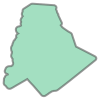

In [130]:
polygon = pba.to_crs(4326).iloc[0]
polygon

In [131]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
#scl[['amenity', 'name', 'geometry']]

In [132]:
# set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# Let's take a copy of our layer
scl_proj = scl.copy()

# Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=3358)
scl_proj.head(5)
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
output_school=inter_scl.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_school.columns=["osm_id","School"]
output_school.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  School
0  16694967.0       1
1  16701397.0       6
2  34764115.0       4
3  51062797.0       4
4  51062957.0       5

# Closest distance to school

In [133]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_school"]]
output_school_distance.columns=["osm_id","min_dist_to_school"]
output_school_distance.head()

osm_id  min_dist_to_school
0   55186886.0         2421.857994
1   16701397.0         1687.108336
2  493705004.0         3001.458672
3   34764115.0         2534.811945
4  322993730.0         2069.054243

In [135]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# Let's take a copy of our layer
coll_proj = coll.copy()

# Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=3358)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
output_college=inter_coll.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_college.columns=["osm_id","college"]
output_college.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  college
0   51062797.0        4
1   51062957.0        4
2  322993730.0        3
3  422138643.0        3

# Closest distance to college

In [137]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_college"]]
output_college_distance.columns=["osm_id","min_dist_to_college"]
output_college_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_college
0   55186886.0          9586.368741
1   16701397.0          4478.048087
2  493705004.0         14595.415186
3   34764115.0          5169.515202
4  322993730.0          2614.970164

In [138]:
# Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# Let's take a copy of our layer
uni_proj = uni.copy()

# Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=3358)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
#scu=pd.concat([sc,u],axis=0)
#scu

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
output_university=inter_uni.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["osm_id","University"]
output_university.head()

osm_id  University
0   34764115.0           1
1   51062797.0           1
2   51062957.0           1
3  235076258.0           1
4  493705004.0           1

# Closest distance to university

In [141]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_university"]]
output_university_distance.columns=["osm_id","min_dist_to_university"]
output_university_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_university
0   55186886.0             8278.354216
1   16701397.0             7268.572020
2  493705004.0             3924.702931
3   34764115.0             3389.043815
4  322993730.0             5081.975065

# Calculate OSM Node density

In [142]:
# lets bring the road shape file node to calculate the intersection density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


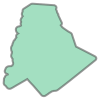

In [143]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [144]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(log_file=True,log_console=True,use_cache=True)
#place="Portland,USA"
#Construct the street network
G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [145]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head(5)

y          x  street_count highway  ref  \
osmid                                                        
113239070  35.053852 -80.895221             2     NaN  NaN   
113245563  35.024882 -80.867952             3     NaN  NaN   
113245566  35.024575 -80.868082             3     NaN  NaN   
113254734  34.989299 -80.840746             1     NaN  NaN   
113254737  34.989520 -80.839831             3     NaN  NaN   

                             geometry  
osmid                                  
113239070  POINT (-80.89522 35.05385)  
113245563  POINT (-80.86795 35.02488)  
113245566  POINT (-80.86808 35.02458)  
113254734  POINT (-80.84075 34.98930)  
113254737  POINT (-80.83983 34.98952)

In [146]:
print(nodes.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
# set the co-ordinate system first
node = nodes.set_crs("EPSG:4326")
# Let's take a copy of our layer
node_proj = node.copy()

# Reproject the geometries by replacing the values with projected ones
node_proj = node_proj.to_crs(epsg=3358)
node_proj.head(5)

y          x  street_count highway  ref  \
osmid                                                        
113239070  35.053852 -80.895221             2     NaN  NaN   
113245563  35.024882 -80.867952             3     NaN  NaN   
113245566  35.024575 -80.868082             3     NaN  NaN   
113254734  34.989299 -80.840746             1     NaN  NaN   
113254737  34.989520 -80.839831             3     NaN  NaN   

                                geometry  
osmid                                     
113239070  POINT (436735.165 146285.761)  
113245563  POINT (439161.674 143025.627)  
113245566  POINT (439149.136 142991.791)  
113254734  POINT (441570.525 139032.734)  
113254737  POINT (441654.504 139055.719)

In [148]:
# Clip the data using GeoPandas clip
buffer_clip_node = gpd.clip(node_proj, gdf1)
buffer_clip_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y          x  street_count highway  ref  \
osmid                                                        
172129669  35.214033 -80.844833             3     NaN  NaN   
172129670  35.213401 -80.845853             2     NaN  NaN   
172129671  35.213327 -80.845967             4     NaN  NaN   
172129672  35.213229 -80.846120             2     NaN  NaN   
172129673  35.213088 -80.846342             2     NaN  NaN   

                                geometry  
osmid                                     
172129669  POINT (441660.798 163964.844)  
172129670  POINT (441566.651 163896.475)  
172129671  POINT (441556.122 163888.460)  
172129672  POINT (441541.993 163877.850)  
172129673  POINT (441521.495 163862.587)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


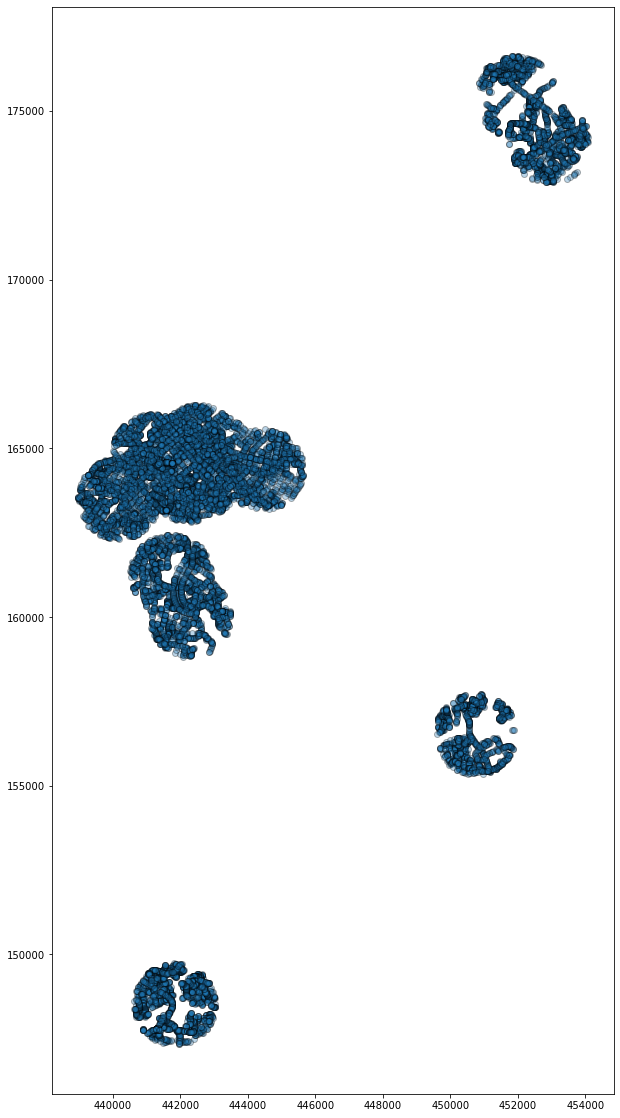

In [149]:
ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [150]:
 inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
 inter_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor          y  \
0  On top of bridge; Sidewalk + bike lane     55186886.0  35.209657   
1  On top of bridge; Sidewalk + bike lane     55186886.0  35.203244   
2  On top of bridge; Sidewalk + bike lane     55186886.0  35.219693   
3                                     NaN     34764115.0  35.219693   
4  On top of bridge; Sidewalk + bike lane     55186886.0  35.219723   

           x  street_count highway  ref                       geometry  
0 -80.874251             4     NaN  NaN  POINT (438973.968 163529.675)  
1 -80.866489             2     NaN  NaN  POINT (439667.117 162805.081)  
2 -80.860971             3     NaN  NaN  POINT (440203.648 164620.021)  
3 -80.860971             3     NaN  NaN  POINT (440203.648 164620.021)  
4 -80.861291             2     NaN  NaN  POINT (440174.586 164623.895)

Intersection density per mile2

In [151]:
output_intersection_density= inter_node.groupby(by=['osm_id_sensor'])['geometry'].count()/(3.1416*size*size*3.861e-07)
output_intersection_density.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor
16694967.0     773.000389
16701397.0     838.077288
34764115.0    1217.786849
51062797.0    1478.094447
51062957.0    1419.808181
Name: geometry, dtype: float64

In [152]:
output_intersection_density1=output_intersection_density.reset_index()
output_intersection_density1.columns=["osm_id","OSM_node_Density"]
output_intersection_density1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  OSM_node_Density
0  16694967.0        773.000389
1  16701397.0        838.077288
2  34764115.0       1217.786849
3  51062797.0       1478.094447
4  51062957.0       1419.808181

# Calculate the Intersection density

In [153]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

In [155]:
# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=3358)
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
outputa_intersection_density= inter_nodea.groupby(by=['osm_id_sensor'])['geometry'].count()/(3.1416*size*size*3.861e-07)
output_intersection_densitya=outputa_intersection_density.reset_index()
output_intersection_densitya.columns=["osm_id","Intersection_Density"]
output_intersection_densitya

osm_id  Intersection_Density
0    16694967.0             93.371204
1    16701397.0            158.448103
2    34764115.0            149.393926
3    51062797.0            183.912977
4    51062957.0            187.308293
5    55186886.0            140.339748
6   156886419.0            148.262154
7   169185539.0            102.425381
8   235076258.0            104.123039
9   322993730.0            164.106964
10  422138643.0            177.122344
11  492433486.0            129.587913
12  493705004.0             91.673545

# Calculate the Number of Lanes

In [156]:
edges.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      ref             name      highway  \
u         v          key                                                     
113239070 3340121615 0    239953923  S-29-64  Harrisburg Road     tertiary   
          3340121616 0    239953923  S-29-64  Harrisburg Road     tertiary   
113245563 113245566  0     12443810      NaN       Prime Lane  residential   
          4950059198 0    690321084  S-29-64  Harrisburg Road     tertiary   
          113286752  0    690321084  S-29-64  Harrisburg Road     tertiary   

                          oneway  length lanes maxspeed bridge access tunnel  \
u         v          key                                                       
113239070 3340121615 0     False  12.973   NaN      NaN    NaN    NaN    NaN   
          3340121616 0     False  15.623   NaN      NaN    NaN    NaN    NaN   
113245563 113245566  0     False  36.154   NaN      NaN    NaN    NaN    NaN   
          4950059198 0     False  25.165   NaN      NaN    NaN    NaN    NaN   
          113286752  0     False  23.463   NaN      NaN    NaN    NaN    NaN   

                         junction area  \
u         v          key                 
113239070 3340121615 0        NaN  NaN   
          3340121616 0        NaN  NaN   
113245563 113245566  0        NaN  NaN   
          4950059198 0        NaN  NaN   
          113286752  0        NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113239070 3340121615 0    LINESTRING (-80.89522 35.05385, -80.89524 35.0...  
          3340121616 0    LINESTRING (-80.89522 35.05385, -80.89519 35.0...  
113245563 113245566  0    LINESTRING (-80.86795 35.02488, -80.86808 35.0...  
          4950059198 0    LINESTRING (-80.86795 35.02488, -80.86823 35.0...  
          113286752  0    LINESTRING (-80.86795 35.02488, -80.86769 35.0...

In [157]:
print(edges.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
# set the co-ordinate system first
edge = edges.set_crs("EPSG:4326")
# Let's take a copy of our layer
edge_proj = edge.copy()

# Reproject the geometries by replacing the values with projected ones
edge_proj = edge_proj.to_crs(epsg=3358)
edge_proj.head(5)

osmid      ref             name      highway  \
u         v          key                                                     
113239070 3340121615 0    239953923  S-29-64  Harrisburg Road     tertiary   
          3340121616 0    239953923  S-29-64  Harrisburg Road     tertiary   
113245563 113245566  0     12443810      NaN       Prime Lane  residential   
          4950059198 0    690321084  S-29-64  Harrisburg Road     tertiary   
          113286752  0    690321084  S-29-64  Harrisburg Road     tertiary   

                          oneway  length lanes maxspeed bridge access tunnel  \
u         v          key                                                       
113239070 3340121615 0     False  12.973   NaN      NaN    NaN    NaN    NaN   
          3340121616 0     False  15.623   NaN      NaN    NaN    NaN    NaN   
113245563 113245566  0     False  36.154   NaN      NaN    NaN    NaN    NaN   
          4950059198 0     False  25.165   NaN      NaN    NaN    NaN    NaN   
          113286752  0     False  23.463   NaN      NaN    NaN    NaN    NaN   

                         junction area  \
u         v          key                 
113239070 3340121615 0        NaN  NaN   
          3340121616 0        NaN  NaN   
113245563 113245566  0        NaN  NaN   
          4950059198 0        NaN  NaN   
          113286752  0        NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113239070 3340121615 0    LINESTRING (436735.165 146285.761, 436733.421 ...  
          3340121616 0    LINESTRING (436735.165 146285.761, 436737.755 ...  
113245563 113245566  0    LINESTRING (439161.674 143025.627, 439149.136 ...  
          4950059198 0    LINESTRING (439161.674 143025.627, 439136.727 ...  
          113286752  0    LINESTRING (439161.674 143025.627, 439185.137 ...

In [159]:
# Consider rows without NAN
edge_clean = edge_proj[edge_proj['lanes'].notna()]
edge_clean2 = edge_clean [edge_clean.lanes!=0]
edge_clean2.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid     ref                  name  \
u         v          key                                            
113261351 113286999  0     12450644     NaN       Harrisburg Road   
          4600213998 0     12450644     NaN       Harrisburg Road   
113273966 113290579  0    253130383  US 521     Charlotte Highway   
113275140 8154475894 0    261992778     NaN           Marvin Road   
          6456756600 0    261992778     NaN           Marvin Road   
113275985 7062534695 0    764483867     NaN     Henry Harris Road   
113278554 6456756600 0    261992778     NaN           Marvin Road   
          5903152990 0    261992778     NaN           Marvin Road   
113281274 7017018113 0     12454791     NaN  Black Horse Run Road   
          113310771  0     12454791     NaN  Black Horse Run Road   

                              highway  oneway   length lanes maxspeed bridge  \
u         v          key                                                       
113261351 113286999  0       tertiary   False   19.683     2      NaN    NaN   
          4600213998 0       tertiary   False    8.945     2      NaN    NaN   
113273966 113290579  0          trunk    True   57.884     2      NaN    NaN   
113275140 8154475894 0       tertiary   False    2.319     2      NaN    NaN   
          6456756600 0       tertiary   False   82.380     2      NaN    NaN   
113275985 7062534695 0       tertiary   False  179.215     2      NaN    NaN   
113278554 6456756600 0       tertiary   False   12.950     2      NaN    NaN   
          5903152990 0       tertiary   False   10.250     2      NaN    NaN   
113281274 7017018113 0    residential   False   18.893     2      NaN    NaN   
          113310771  0    residential   False   46.100     2      NaN    NaN   

                         access tunnel junction area  \
u         v          key                               
113261351 113286999  0      NaN    NaN      NaN  NaN   
          4600213998 0      NaN    NaN      NaN  NaN   
113273966 113290579  0      NaN    NaN      NaN  NaN   
113275140 8154475894 0      NaN    NaN      NaN  NaN   
          6456756600 0      NaN    NaN      NaN  NaN   
113275985 7062534695 0      NaN    NaN      NaN  NaN   
113278554 6456756600 0      NaN    NaN      NaN  NaN   
          5903152990 0      NaN    NaN      NaN  NaN   
113281274 7017018113 0      NaN    NaN      NaN  NaN   
          113310771  0      NaN    NaN      NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113261351 113286999  0    LINESTRING (440225.238 141494.098, 440216.015 ...  
          4600213998 0    LINESTRING (440225.238 141494.098, 440229.196 ...  
113273966 113290579  0    LINESTRING (440382.062 141036.418, 440364.811 ...  
113275140 8154475894 0    LINESTRING (440525.155 139548.512, 440523.197 ...  
          6456756600 0    LINESTRING (440525.155 139548.512, 440594.289 ...  
113275985 7062534695 0    LINESTRING (441328.228 138830.626, 441328.590 ...  
113278554 6456756600 0    LINESTRING (440605.159 139496.528, 440594.289 ...  
          5903152990 0    LINESTRING (440605.159 139496.528, 440613.868 ...  
113281274 7017018113 0    LINESTRING (440795.673 140055.931, 440795.823 ...  
          113310771  0    LINESTRING (440795.673 140055.931, 440770.578 ...

In [160]:
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'lanes']

ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
ecoshort
ecoshort_lane=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
ecoshort_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                        geometry  min_dist_to_school  min_dist_to_college  \
0  POINT (440167.090 163506.089)         2421.857994          9586.368741   
1  POINT (444442.876 164385.527)         1687.108336          4478.048087   
2  POINT (442277.682 160005.150)         3001.458672         14595.415186   
3  POINT (441173.175 164818.677)         2534.811945          5169.515202   
4  POINT (442252.867 164026.406)         2069.054243          2614.970164   

   min_dist_to_university lanes  
0             8278.354216     4  
1             7268.572020     2  
2             3924.702931     2  
3             3389.043815     2  
4             5081.975065     2

In [162]:
output_lane=ecoshort_lane.loc[:,['osm_id_sensor','lanes']]
output_lane.columns=['osm_id','lanes']
output_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id lanes
0   55186886.0     4
1   16701397.0     2
2  493705004.0     2
3   34764115.0     2
4  322993730.0     2

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [163]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [165]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [166]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [167]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid      ref             name      highway  \
u         v          key                                                     
113239070 3340121615 0    239953923  S-29-64  Harrisburg Road     tertiary   
          3340121616 0    239953923  S-29-64  Harrisburg Road     tertiary   
113245563 113245566  0     12443810      NaN       Prime Lane  residential   
          4950059198 0    690321084  S-29-64  Harrisburg Road     tertiary   
          113286752  0    690321084  S-29-64  Harrisburg Road     tertiary   

                          oneway  length lanes service maxspeed bridge access  \
u         v          key                                                        
113239070 3340121615 0     False  12.973   NaN     NaN      NaN    NaN    NaN   
          3340121616 0     False  15.623   NaN     NaN      NaN    NaN    NaN   
113245563 113245566  0     False  36.154   NaN     NaN      NaN    NaN    NaN   
          4950059198 0     False  25.165   NaN     NaN      NaN    NaN    NaN   
          113286752  0     False  23.463   NaN     NaN      NaN    NaN    NaN   

                         cycleway:left cycleway:right tunnel cycleway  \
u         v          key                                                
113239070 3340121615 0             NaN            NaN    NaN      NaN   
          3340121616 0             NaN            NaN    NaN      NaN   
113245563 113245566  0             NaN            NaN    NaN      NaN   
          4950059198 0             NaN            NaN    NaN      NaN   
          113286752  0             NaN            NaN    NaN      NaN   

                         junction width area  \
u         v          key                       
113239070 3340121615 0        NaN   NaN  NaN   
          3340121616 0        NaN   NaN  NaN   
113245563 113245566  0        NaN   NaN  NaN   
          4950059198 0        NaN   NaN  NaN   
          113286752  0        NaN   NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113239070 3340121615 0    LINESTRING (-80.89522 35.05385, -80.89524 35.0...  
          3340121616 0    LINESTRING (-80.89522 35.05385, -80.89519 35.0...  
113245563 113245566  0    LINESTRING (-80.86795 35.02488, -80.86808 35.0...  
          4950059198 0    LINESTRING (-80.86795 35.02488, -80.86823 35.0...  
          113286752  0    LINESTRING (-80.86795 35.02488, -80.86769 35.0...

In [168]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=3358)
cycleway_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      ref             name      highway  \
u         v          key                                                     
113239070 3340121615 0    239953923  S-29-64  Harrisburg Road     tertiary   
          3340121616 0    239953923  S-29-64  Harrisburg Road     tertiary   
113245563 113245566  0     12443810      NaN       Prime Lane  residential   
          4950059198 0    690321084  S-29-64  Harrisburg Road     tertiary   
          113286752  0    690321084  S-29-64  Harrisburg Road     tertiary   

                          oneway  length lanes service maxspeed bridge access  \
u         v          key                                                        
113239070 3340121615 0     False  12.973   NaN     NaN      NaN    NaN    NaN   
          3340121616 0     False  15.623   NaN     NaN      NaN    NaN    NaN   
113245563 113245566  0     False  36.154   NaN     NaN      NaN    NaN    NaN   
          4950059198 0     False  25.165   NaN     NaN      NaN    NaN    NaN   
          113286752  0     False  23.463   NaN     NaN      NaN    NaN    NaN   

                         cycleway:left cycleway:right tunnel cycleway  \
u         v          key                                                
113239070 3340121615 0             NaN            NaN    NaN      NaN   
          3340121616 0             NaN            NaN    NaN      NaN   
113245563 113245566  0             NaN            NaN    NaN      NaN   
          4950059198 0             NaN            NaN    NaN      NaN   
          113286752  0             NaN            NaN    NaN      NaN   

                         junction width area  \
u         v          key                       
113239070 3340121615 0        NaN   NaN  NaN   
          3340121616 0        NaN   NaN  NaN   
113245563 113245566  0        NaN   NaN  NaN   
          4950059198 0        NaN   NaN  NaN   
          113286752  0        NaN   NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113239070 3340121615 0    LINESTRING (436735.165 146285.761, 436733.421 ...  
          3340121616 0    LINESTRING (436735.165 146285.761, 436737.755 ...  
113245563 113245566  0    LINESTRING (439161.674 143025.627, 439149.136 ...  
          4950059198 0    LINESTRING (439161.674 143025.627, 439136.727 ...  
          113286752  0    LINESTRING (439161.674 143025.627, 439185.137 ...

In [169]:
# Clip the data using GeoPandas clip
buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
buffer_clip_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid  ref                  name      highway  \
u         v          key                                                      
172129669 7479177513 0     16660927  NaN         Oriole Street  residential   
          5727946724 0    159072217  NaN  East Morehead Street    secondary   
          172811763  0    159072217  NaN  East Morehead Street    secondary   
172129670 172129671  0     16660927  NaN         Oriole Street  residential   
          7479177509 0     16660927  NaN         Oriole Street  residential   

                          oneway  length lanes service maxspeed bridge access  \
u         v          key                                                        
172129669 7479177513 0     False  31.074     2     NaN      NaN    NaN    NaN   
          5727946724 0     False  23.311     4     NaN      NaN    NaN    NaN   
          172811763  0     False  28.925     4     NaN      NaN    NaN    NaN   
172129670 172129671  0     False  13.227     2     NaN      NaN    NaN    NaN   
          7479177509 0     False  50.349     2     NaN      NaN    NaN    NaN   

                         cycleway:left cycleway:right tunnel cycleway  \
u         v          key                                                
172129669 7479177513 0             NaN            NaN    NaN      NaN   
          5727946724 0             NaN            NaN    NaN      NaN   
          172811763  0             NaN            NaN    NaN      NaN   
172129670 172129671  0             NaN            NaN    NaN      NaN   
          7479177509 0             NaN            NaN    NaN      NaN   

                         junction width area  \
u         v          key                       
172129669 7479177513 0        NaN   NaN  NaN   
          5727946724 0        NaN   NaN  NaN   
          172811763  0        NaN   NaN  NaN   
172129670 172129671  0        NaN   NaN  NaN   
          7479177509 0        NaN   NaN  NaN   

                                                                   geometry  
u         v          key                                                     
172129669 7479177513 0    LINESTRING (441660.798 163964.844, 441635.646 ...  
          5727946724 0    LINESTRING (441660.798 163964.844, 441674.497 ...  
          172811763  0    LINESTRING (441660.798 163964.844, 441643.380 ...  
172129670 172129671  0    LINESTRING (441566.651 163896.475, 441556.122 ...  
          7479177509 0    LINESTRING (441566.651 163896.475, 441607.411 ...

In [170]:
 inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  bridge  access  \
0  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   
1  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   
2  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   
3  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   
4  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   

  cycleway:left  cycleway:right  tunnel cycleway junction width  area  \
0           NaN            lane     NaN      NaN      NaN   NaN   NaN   
1           NaN     shared_lane     NaN      NaN      NaN   NaN   NaN   
2           NaN             NaN     NaN     lane      NaN   NaN   NaN   
3           NaN             NaN     NaN     lane      NaN   NaN   NaN   
4           NaN             NaN     NaN      NaN      NaN   NaN   NaN   

                                            geometry  
0  LINESTRING (438973.968 163529.675, 438986.993 ...  
1  LINESTRING (438973.968 163529.675, 438984.646 ...  
2  LINESTRING (439667.117 162805.081, 439652.653 ...  
3  LINESTRING (439667.117 162805.081, 439676.119 ...  
4  LINESTRING (440203.648 164620.021, 440174.586 ...  

[5 rows x 33 columns]

In [171]:
 inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  access  cycleway:left  \
0  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   
1  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   
2  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   
3  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   
4  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   

  cycleway:right  tunnel  cycleway junction width area  \
0           lane     NaN       NaN      NaN   NaN  NaN   
1    shared_lane     NaN       NaN      NaN   NaN  NaN   
2            NaN     NaN      lane      NaN   NaN  NaN   
3            NaN     NaN      lane      NaN   NaN  NaN   
4            NaN     NaN       NaN      NaN   NaN  NaN   

                                            geometry     Length  
0  LINESTRING (438973.968 163529.675, 438986.993 ...  78.474724  
1  LINESTRING (438973.968 163529.675, 438984.646 ...  44.770170  
2  LINESTRING (439667.117 162805.081, 439652.653 ...  69.222541  
3  LINESTRING (439667.117 162805.081, 439676.119 ...  43.979706  
4  LINESTRING (440203.648 164620.021, 440174.586 ...  96.193184  

[5 rows x 34 columns]

In [172]:
# Calculate the cycleway left, right and lane length within the buffer
bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_lane=bikeway_all_lane.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_lane.columns=["osm_id","cycleway_lane_all"]
output_bikeway_all_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_all
0  16694967.0        1558.555111
1  16701397.0        2878.428238
2  34764115.0       12029.892081
3  51062797.0       12919.993306
4  51062957.0       12472.954901

In [173]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane01],axis=0)
cycleway_lane.head()
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_lane_binary.columns=["osm_id","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_lane_binary]
Index: []

In [174]:
# Calculate the cycleway left, right amd track all together
bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_track=bikeway_all_track.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_track.columns=["osm_id","cycleway_track_all"]
output_bikeway_all_track.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_track_all
0   51062797.0         3823.780514
1   51062957.0         3823.780514
2  322993730.0         3132.705592
3  422138643.0         3655.675997

In [175]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_track_binary.columns=["osm_id","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_track_all_binary
0  51062797.0                          1

# OSM Functional System Programming

In [176]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name   ref         type  oneway  bridge  maxspeed  \
0  12144302       Quarry Road  None  residential       0       0       NaN   
1  12144313  Norman Lake Road  None  residential       0       0       NaN   
2  12144317  Norman Lake Road  None  residential       0       0       NaN   
3  12144336              None  None  residential       0       0       NaN   
4  12144365              None  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (-81.47824 35.15246, -81.47756 35.1...  
1  LINESTRING (-81.40164 35.14910, -81.40156 35.1...  
2  LINESTRING (-81.40124 35.14871, -81.40131 35.1...  
3  LINESTRING (-81.47421 35.16671, -81.47419 35.1...  
4  LINESTRING (-81.42322 35.09320, -81.42329 35.0...

In [177]:
print(road.crs)

EPSG:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [179]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=3358)
road_proj.head(5)

osm_id              name   ref         type  oneway  bridge  maxspeed  \
0  12144302       Quarry Road  None  residential       0       0       NaN   
1  12144313  Norman Lake Road  None  residential       0       0       NaN   
2  12144317  Norman Lake Road  None  residential       0       0       NaN   
3  12144336              None  None  residential       0       0       NaN   
4  12144365              None  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (383839.456 158392.305, 383903.780 ...  
1  LINESTRING (390807.757 157847.719, 390814.730 ...  
2  LINESTRING (390843.218 157803.631, 390836.804 ...  
3  LINESTRING (384246.161 159963.739, 384248.089 ...  
4  LINESTRING (388690.740 151697.084, 388684.485 ...

In [180]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

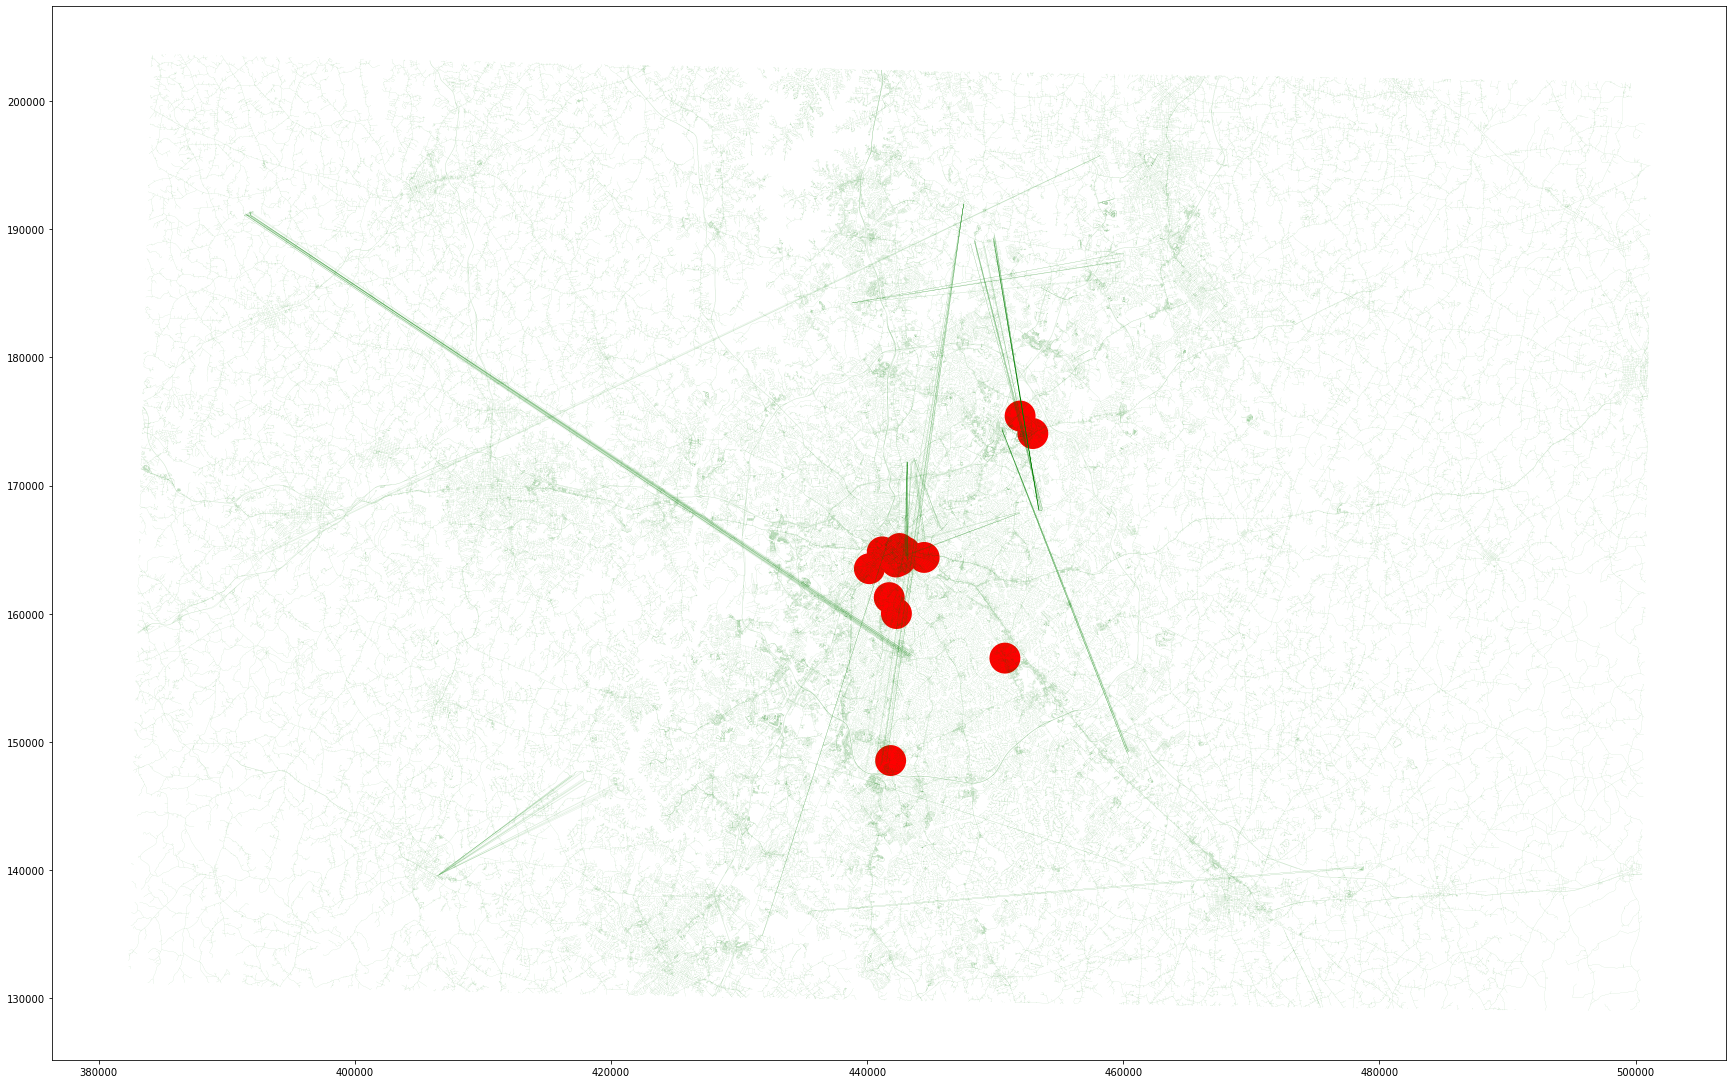

In [181]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [182]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name    ref           type  oneway  bridge  \
22444  16660927    Oriole Street   None    residential       0       0   
22477  16661103  East 3rd Street  NC 16        primary       1       0   
22479  16661116             None   None  motorway_link       1       0   
22481  16661133             None   None  motorway_link       1       0   
22493  16661233             None   None    residential       0       0   

       maxspeed                                           geometry  
22444       NaN  LINESTRING (441660.798 163964.844, 441635.646 ...  
22477       NaN  LINESTRING (442931.864 163932.844, 442926.345 ...  
22479       NaN  LINESTRING (442702.976 165980.336, 442650.238 ...  
22481       NaN  MULTILINESTRING ((441254.957 147467.541, 44124...  
22493       NaN  LINESTRING (449755.327 157206.351, 449752.992 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


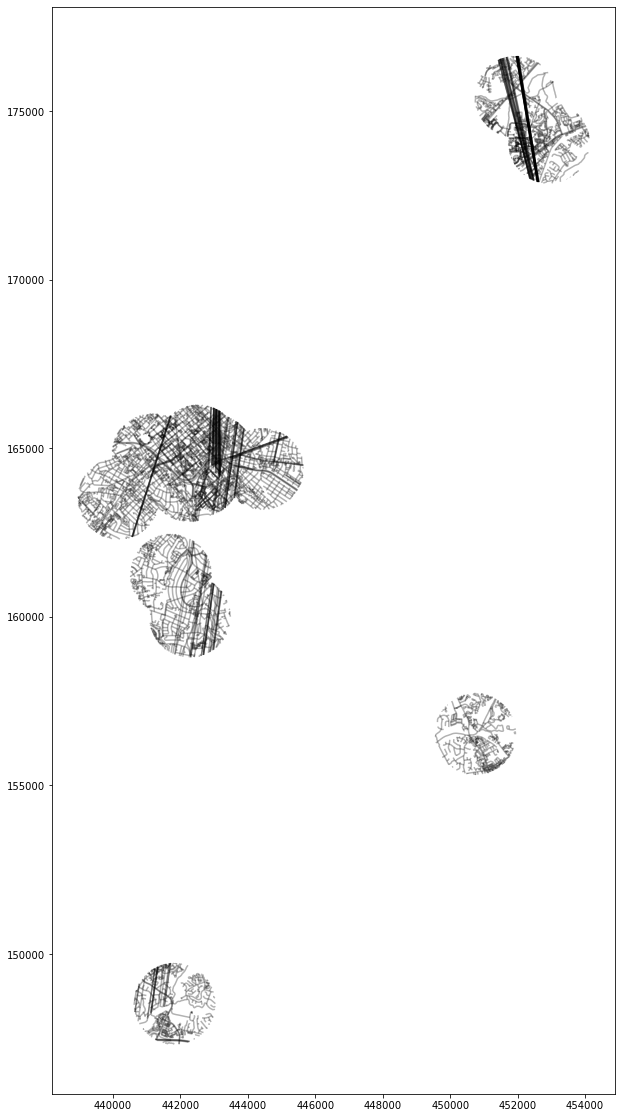

In [183]:
ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect

In [184]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  393.654456  18.547945   5.958904   1236.0  ...   
1  393.654456  18.547945   5.958904   1236.0  ...   
2  149.292520  11.630137   4.780822   2049.0  ...   
3  393.654456  18.547945   5.958904   1236.0  ...   
4  393.654456  18.547945   5.958904   1236.0  ...   

                                  comment  osm_id_sensor    osm_id  \
0  On top of bridge; Sidewalk + bike lane     55186886.0  16661452   
1  On top of bridge; Sidewalk + bike lane     55186886.0  16662824   
2                                     NaN     34764115.0  16662824   
3  On top of bridge; Sidewalk + bike lane     55186886.0  16662829   
4  On top of bridge; Sidewalk + bike lane     55186886.0  16662938   

              name   ref           type oneway bridge  maxspeed  \
0             None  None  motorway_link      1      0       NaN   
1    Wilmore Drive  None    residential      0      0       NaN   
2    Wilmore Drive  None    residential      0      0       NaN   
3    Wilmore Drive  None    residential      0      0       NaN   
4  Haverford Place  None    residential      0      0       NaN   

                                            geometry  
0  MULTILINESTRING ((438960.774 163520.170, 43896...  
1  LINESTRING (440203.648 164620.021, 440174.586 ...  
2  LINESTRING (440203.648 164620.021, 440174.586 ...  
3  LINESTRING (439564.761 164402.133, 439559.895 ...  
4  LINESTRING (439830.865 162505.102, 439829.447 ...  

[5 rows x 22 columns]

# Calculate the length of the road segments

In [185]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  osm_id_sensor    osm_id  \
0  393.654456  18.547945   5.958904   1236.0  ...     55186886.0  16661452   
1  393.654456  18.547945   5.958904   1236.0  ...     55186886.0  16662824   
2  149.292520  11.630137   4.780822   2049.0  ...     34764115.0  16662824   
3  393.654456  18.547945   5.958904   1236.0  ...     55186886.0  16662829   
4  393.654456  18.547945   5.958904   1236.0  ...     55186886.0  16662938   

              name   ref           type oneway bridge maxspeed  \
0             None  None  motorway_link      1      0      NaN   
1    Wilmore Drive  None    residential      0      0      NaN   
2    Wilmore Drive  None    residential      0      0      NaN   
3    Wilmore Drive  None    residential      0      0      NaN   
4  Haverford Place  None    residential      0      0      NaN   

                                            geometry       Length  
0  MULTILINESTRING ((438960.774 163520.170, 43896...    53.349723  
1  LINESTRING (440203.648 164620.021, 440174.586 ...  2237.278205  
2  LINESTRING (440203.648 164620.021, 440174.586 ...   730.076419  
3  LINESTRING (439564.761 164402.133, 439559.895 ...  1645.106698  
4  LINESTRING (439830.865 162505.102, 439829.447 ...   529.401617  

[5 rows x 23 columns]

# Aggregrate the road functional class

In [186]:
output_roadfc=inter_road.groupby(by=['osm_id_sensor','type'])['Length'].sum()
output_roadfc

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  type          
16694967.0     footway           14791.157854
               path              13521.526951
               residential       72420.205686
               secondary          8055.769333
               secondary_link      281.260937
                                     ...     
493705004.0    residential       93986.934278
               service           65350.608362
               tertiary          25391.356674
               track               472.850250
               unclassified       1825.979361
Name: Length, Length: 196, dtype: float64

# Calculate the primary road

In [187]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_primary.columns=["osm_id","Primary"]
output_primary.head()

osm_id       Primary
0  16701397.0    535.124356
1  34764115.0  28530.189603
2  51062797.0  20214.887389
3  51062957.0  18230.623801
4  55186886.0  17447.551294

In [188]:
# Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_secondary.columns=["osm_id","Secondary"]
output_secondary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Secondary
0  16694967.0    8337.030270
1  16701397.0   44274.533230
2  34764115.0   99770.350670
3  51062797.0  161864.949613
4  51062957.0  127762.412149

In [189]:
# Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_tertiary.columns=["osm_id","Tertiary"]
output_tertiary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Tertiary
0  16694967.0   9420.019132
1  16701397.0  25874.165326
2  34764115.0   4207.956193
3  51062797.0   7677.674515
4  51062957.0  19290.797636

In [190]:
# Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_residential.columns=["osm_id","Residential_Road"]
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Road
0  16694967.0      72420.205686
1  16701397.0     127418.397612
2  34764115.0      67841.008818
3  51062797.0      98646.347466
4  51062957.0     112666.268449

In [191]:
# Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_path.columns=["osm_id","Path"]
output_path.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id          Path
0   16694967.0  13521.526951
1   51062797.0    552.807257
2   51062957.0    432.876720
3  156886419.0    499.267494
4  169185539.0   4941.575517

In [192]:
# calculate cycleway
# Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_cycleway.columns=["osm_id","Cycleway"] 
output_cycleway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id       Cycleway
0  16701397.0   73920.324039
1  34764115.0   14809.869836
2  51062797.0  100327.692026
3  51062957.0  158602.993738
4  55186886.0   11674.205188

In [193]:
# Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_footway.columns=["osm_id","Footway"] 
output_footway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id        Footway
0  16694967.0   14791.157854
1  16701397.0   16015.698930
2  34764115.0   85881.887514
3  51062797.0  200096.931601
4  51062957.0  167210.196000

# Calculcate the mean Speed

In [194]:
# Exclude NAN and zero value first then take the mean
inter_road.maxspeed.describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    468.000000
mean      37.564103
std       13.037015
min       10.000000
25%       25.000000
50%       35.000000
75%       50.000000
max       70.000000
Name: maxspeed, dtype: float64

In [195]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
inter_road1.head(5) 

site_id           site_name sensor_type  year     region  travel_pattern  \
11  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
12  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   
17  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
18  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
20  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  osm_id_sensor    osm_id  \
11  393.654456  18.547945   5.958904   1236.0  ...     55186886.0  16663359   
12   33.307341   2.438356   1.136986   1443.0  ...    322993730.0  16663359   
17  393.654456  18.547945   5.958904   1236.0  ...     55186886.0  16664222   
18  149.292520  11.630137   4.780822   2049.0  ...     34764115.0  16664222   
20  393.654456  18.547945   5.958904   1236.0  ...     55186886.0  16664916   

                    name   ref         type oneway bridge maxspeed  \
11           Romany Road  None  residential      0      0     25.0   
12           Romany Road  None  residential      0      0     25.0   
17  West Kingston Avenue  None  residential      0      0     35.0   
18  West Kingston Avenue  None  residential      0      0     35.0   
20        Hawkins Street  None  residential      0      0     35.0   

                                             geometry       Length  
11  LINESTRING (441089.143 163613.836, 441091.214 ...  1128.557986  
12  LINESTRING (441134.421 163573.769, 441136.371 ...  3471.284595  
17  LINESTRING (440469.494 163948.010, 440434.022 ...  3973.811649  
18  LINESTRING (440469.494 163948.010, 440434.022 ...  1010.512679  
20  LINESTRING (440339.369 164025.338, 440324.834 ...  3307.494206  

[5 rows x 23 columns]

In [196]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id        site_name sensor_type  year     region  \
0    500  P001CHA  Blue Line Trail   permanent  2019  Charlotte   
1   2208  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
2   2468  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
3   2469  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
4   2471  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  ...  osm_id_sensor  \
0             3.0  393.654456  18.547945   5.958904  ...     55186886.0   
1             3.0   39.364881  15.465753   2.945205  ...    493705004.0   
2             3.0   39.364881  15.465753   2.945205  ...    493705004.0   
3             3.0   39.364881  15.465753   2.945205  ...    493705004.0   
4             3.0   39.364881  15.465753   2.945205  ...    493705004.0   

      osm_id            name     ref     type  oneway bridge maxspeed  \
0  748536651  West Boulevard  NC 160  primary       0      0     55.0   
1   16697769  Runnymede Lane   CLT 4  primary       0      0     35.0   
2  550789886   Woodlawn Road   CLT 4  primary       0      0     35.0   
3  550789887   Woodlawn Road   CLT 4  primary       1      0     35.0   
4  550789889   Woodlawn Road   CLT 4  primary       1      0     35.0   

                                            geometry       Length  
0  LINESTRING (439332.847 164377.011, 439383.603 ...  2877.276940  
1  LINESTRING (442301.513 158799.313, 442287.294 ...   221.001963  
2  LINESTRING (441403.056 159303.525, 441439.432 ...  1443.746674  
3  LINESTRING (441281.072 159349.997, 441295.627 ...   434.755141  
4  LINESTRING (441403.056 159303.525, 441398.364 ...   460.933162  

[5 rows x 24 columns]

In [197]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id        site_name sensor_type  year     region  \
0    500  P001CHA  Blue Line Trail   permanent  2019  Charlotte   
1   2208  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
2   2468  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
3   2469  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
4   2471  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  ...  osm_id_sensor  \
0             3.0  393.654456  18.547945   5.958904  ...     55186886.0   
1             3.0   39.364881  15.465753   2.945205  ...    493705004.0   
2             3.0   39.364881  15.465753   2.945205  ...    493705004.0   
3             3.0   39.364881  15.465753   2.945205  ...    493705004.0   
4             3.0   39.364881  15.465753   2.945205  ...    493705004.0   

      osm_id            name     ref     type  oneway bridge maxspeed  \
0  748536651  West Boulevard  NC 160  primary       0      0     55.0   
1   16697769  Runnymede Lane   CLT 4  primary       0      0     35.0   
2  550789886   Woodlawn Road   CLT 4  primary       0      0     35.0   
3  550789887   Woodlawn Road   CLT 4  primary       1      0     35.0   
4  550789889   Woodlawn Road   CLT 4  primary       1      0     35.0   

                                            geometry       Length  
0  LINESTRING (439332.847 164377.011, 439383.603 ...  2877.276940  
1  LINESTRING (442301.513 158799.313, 442287.294 ...   221.001963  
2  LINESTRING (441403.056 159303.525, 441439.432 ...  1443.746674  
3  LINESTRING (441281.072 159349.997, 441295.627 ...   434.755141  
4  LINESTRING (441403.056 159303.525, 441398.364 ...   460.933162  

[5 rows x 24 columns]

In [198]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['osm_id_sensor'])['maxspeed'].apply(pd.Series.mode).reset_index() # revised
output_meanspeed=output_meanspeed.drop(['level_1'],axis=1)
output_meanspeed.columns=['osm_id','maxspeed']
output_meanspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  maxspeed
0  16694967.0      25.0
1  16701397.0      35.0
2  34764115.0      35.0
3  51062797.0      15.0
4  51062797.0      30.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [199]:
def min_distance_pline(point, line):
    return line.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
ecoshort.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                        geometry  min_dist_to_school  min_dist_to_college  \
0  POINT (440167.090 163506.089)         2421.857994          9586.368741   
1  POINT (444442.876 164385.527)         1687.108336          4478.048087   
2  POINT (442277.682 160005.150)         3001.458672         14595.415186   
3  POINT (441173.175 164818.677)         2534.811945          5169.515202   
4  POINT (442252.867 164026.406)         2069.054243          2614.970164   

   min_dist_to_university lanes  
0             8278.354216     4  
1             7268.572020     2  
2             3924.702931     2  
3             3389.043815     2  
4             5081.975065     2

In [201]:
road_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name   ref         type  oneway  bridge  maxspeed  \
0  12144302       Quarry Road  None  residential       0       0       NaN   
1  12144313  Norman Lake Road  None  residential       0       0       NaN   
2  12144317  Norman Lake Road  None  residential       0       0       NaN   
3  12144336              None  None  residential       0       0       NaN   
4  12144365              None  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (383839.456 158392.305, 383903.780 ...  
1  LINESTRING (390807.757 157847.719, 390814.730 ...  
2  LINESTRING (390843.218 157803.631, 390836.804 ...  
3  LINESTRING (384246.161 159963.739, 384248.089 ...  
4  LINESTRING (388690.740 151697.084, 388684.485 ...

In [202]:
print(road_proj.crs)
print(ecoshort.crs)

epsg:3358
epsg:3358


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index    osm_id                       name     ref     type  oneway  \
0    147  12155255                   S-11-658    None  primary       0   
1    401  12454692             Waxhaw Highway   SC 75  primary       0   
2   1147  12553511         Highway 321 Bypass  US 321  primary       0   
3   1189  12553602  South Dave Lyle Boulevard  SC 122  primary       0   
4   1339  12553897  South Dave Lyle Boulevard    None  primary       0   

   bridge  maxspeed                                           geometry  
0       0       NaN  LINESTRING (386249.747 159481.689, 386260.745 ...  
1       0       NaN  LINESTRING (444689.062 130420.094, 445381.236 ...  
2       0      45.0  LINESTRING (404486.558 139040.278, 404472.086 ...  
3       1       NaN  LINESTRING (424023.491 132228.429, 424042.762 ...  
4       0       NaN  LINESTRING (423952.850 132159.921, 423911.406 ...

# In the below pline distance, you can see counter is located little far away from the link

In [204]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [205]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [206]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [207]:
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [208]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                        geometry  min_dist_to_school  min_dist_to_college  \
0  POINT (440167.090 163506.089)         2421.857994          9586.368741   
1  POINT (444442.876 164385.527)         1687.108336          4478.048087   
2  POINT (442277.682 160005.150)         3001.458672         14595.415186   
3  POINT (441173.175 164818.677)         2534.811945          5169.515202   
4  POINT (442252.867 164026.406)         2069.054243          2614.970164   

   min_dist_to_university lanes  maxspeed  
0             8278.354216     4      35.0  
1             7268.572020     2      25.0  
2             3924.702931     2      25.0  
3             3389.043815     2      20.0  
4             5081.975065     2      25.0

In [209]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2, right_on='osm_id', left_on='osm_id_sensor',how='inner')
pt_speed_v1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id  site_name sensor_type  year     region  travel_pattern      AADBT  \
0  P002CHA  Pecan Ave   permanent  2019  Charlotte             3.0  160.74246   

     stv_adb  stv_c_adb  stl_raw  ...  maxspeed_x  index    osm_id  \
0  16.082192    4.60274    740.0  ...        25.0  33127  16701397   

           name   ref      type  oneway  bridge maxspeed_y  \
0  Pecan Avenue  None  tertiary       0       0       25.0   

                                          geometry_y  
0  LINESTRING (444110.190 163719.167, 444122.366 ...  

[1 rows x 29 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

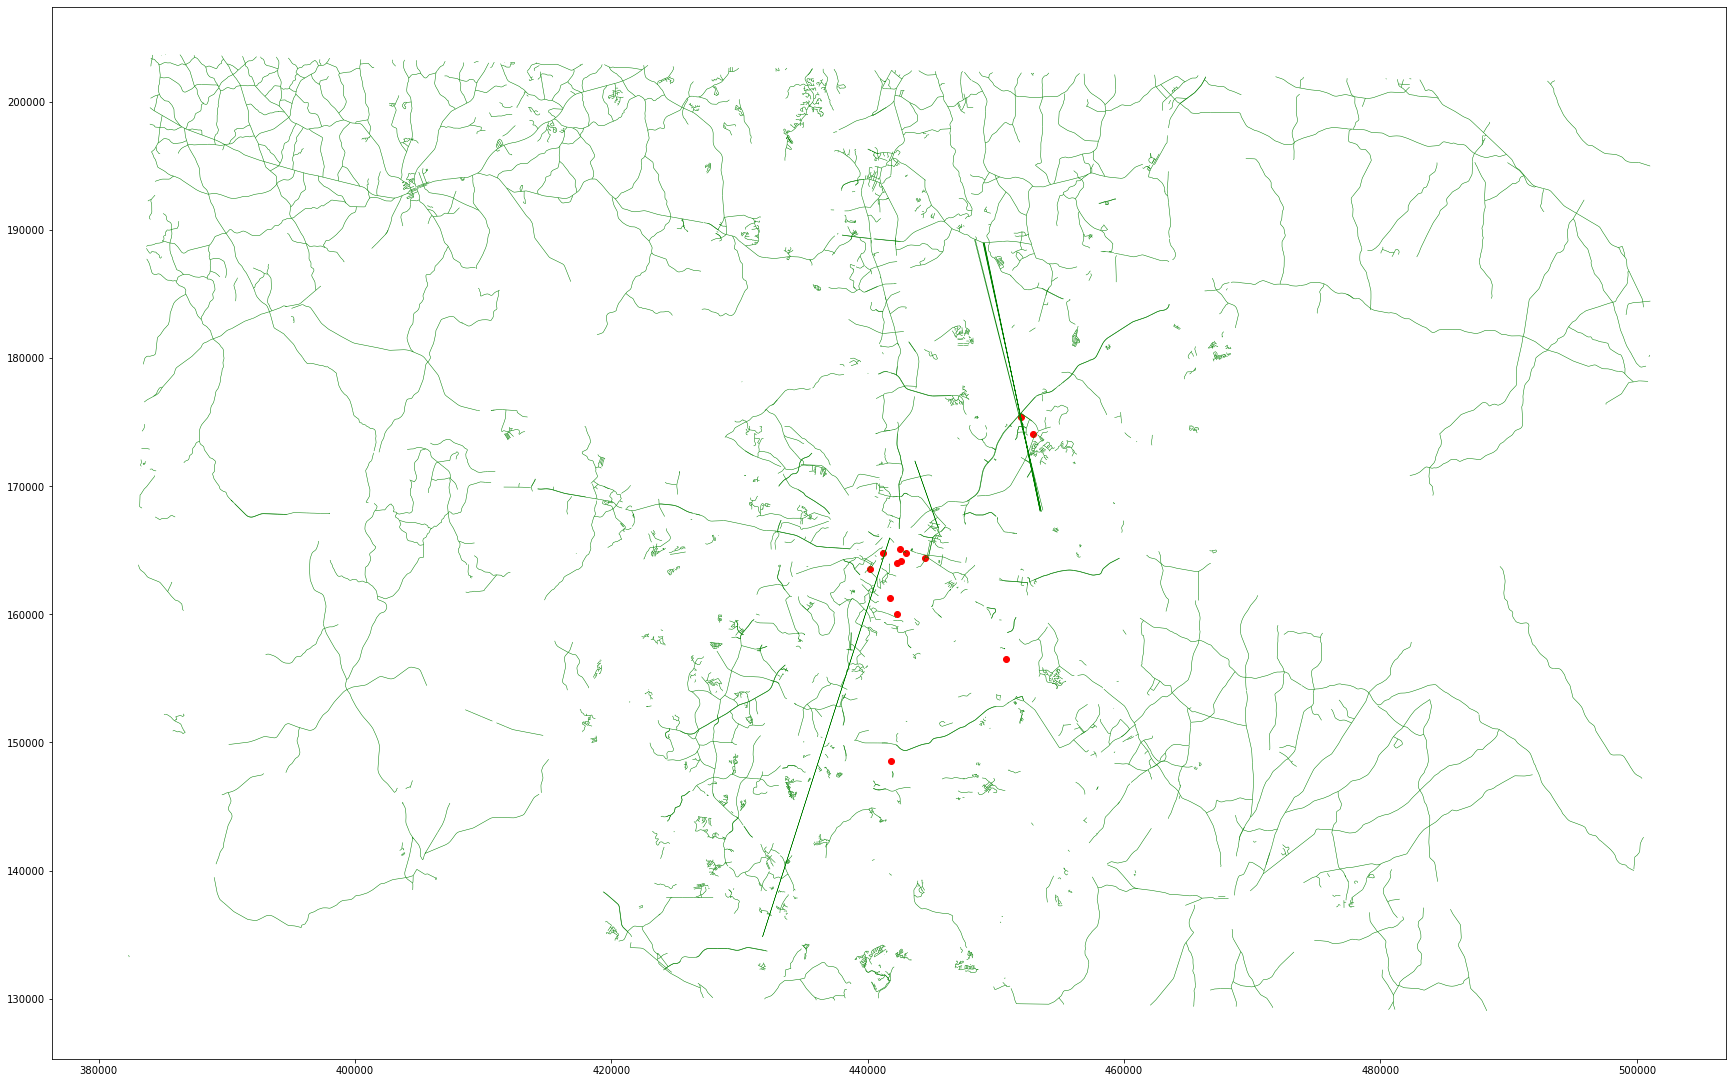

In [210]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red")
road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [211]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['osm_id_sensor'])['maxspeed'].mean().reset_index()
output_pointspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  maxspeed
0     16694967.0      25.0
1     16701397.0      25.0
2     34764115.0      20.0
3     51062797.0      30.0
4     51062957.0      30.0

In [212]:
output_pointspeed.columns=["osm_id","Point Speed"]
output_pointspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Speed
0  16694967.0         25.0
1  16701397.0         25.0
2  34764115.0         20.0
3  51062797.0         30.0
4  51062957.0         30.0

In [213]:
pt_speed_v1.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'geometry_x',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'lanes', 'maxspeed_x', 'index', 'osm_id', 'name', 'ref', 'type',
       'oneway', 'bridge', 'maxspeed_y', 'geometry_y'],
      dtype='object')

In [214]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['osm_id_sensor'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['osm_id','maxspeed']
output_pointspeed_v2

osm_id  maxspeed
0  16701397.0      25.0

# Calculate the road type of the underneath link of count station

In [215]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index    osm_id                       name     ref     type  oneway  \
0    147  12155255                   S-11-658    None  primary       0   
1    401  12454692             Waxhaw Highway   SC 75  primary       0   
2   1147  12553511         Highway 321 Bypass  US 321  primary       0   
3   1189  12553602  South Dave Lyle Boulevard  SC 122  primary       0   
4   1339  12553897  South Dave Lyle Boulevard    None  primary       0   

   bridge  maxspeed                                           geometry  
0       0       NaN  LINESTRING (386249.747 159481.689, 386260.745 ...  
1       0       NaN  LINESTRING (444689.062 130420.094, 445381.236 ...  
2       0      45.0  LINESTRING (404486.558 139040.278, 404472.086 ...  
3       1       NaN  LINESTRING (424023.491 132228.429, 424042.762 ...  
4       0       NaN  LINESTRING (423952.850 132159.921, 423911.406 ...

In [217]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort_speed, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#ecoshort_rt.head()

In [219]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index     osm_id                   name   ref       type  oneway  bridge  \
0  44460   34764115     South Tryon Street  None  secondary       0       1   
1  45211   51062797        East 6th Street  None  secondary       1       0   
2  59911  322993730  East Stonewall Street  None  secondary       1       0   
3  33127   16701397           Pecan Avenue  None   tertiary       0       0   
4  45345   55186886   Charlotte Rail Trail  None   cycleway       0       0   

   maxspeed_x                                         geometry_x  site_id  \
0         NaN  LINESTRING (441220.192 164887.503, 441189.112 ...  P004CHA   
1         NaN  LINESTRING (442500.410 165107.257, 442463.640 ...  S002CHA   
2         NaN  LINESTRING (441780.898 164516.839, 441794.824 ...  P005CHA   
3        25.0  LINESTRING (444110.190 163719.167, 444122.366 ...  P002CHA   
4         NaN  LINESTRING (439676.119 162795.148, 439681.703 ...  P001CHA   

   ...   latitude  longitude  \
0  ...  35.221640 -80.850360   
1  ...  35.224233 -80.835569   
2  ...  35.214680 -80.838340   
3  ...  35.218280 -80.814360   
4  ...  35.209640 -80.861140   

                                             comment osm_id_sensor  \
0                                                NaN    34764115.0   
1                                                NaN    51062797.0   
2                                                NaN   322993730.0   
3  Sidewalk + bike lane, Street is divided in str...    16701397.0   
4             On top of bridge; Sidewalk + bike lane    55186886.0   

                      geometry_y  min_dist_to_school  min_dist_to_college  \
0  POINT (441173.175 164818.677)         2534.811945          5169.515202   
1  POINT (442524.665 165081.281)         1579.390170          1532.591446   
2  POINT (442252.867 164026.406)         2069.054243          2614.970164   
3  POINT (444442.876 164385.527)         1687.108336          4478.048087   
4  POINT (440167.090 163506.089)         2421.857994          9586.368741   

   min_dist_to_university  lanes  maxspeed_y  
0             3389.043815      2        20.0  
1             1526.561398      3        30.0  
2             5081.975065      2        25.0  
3             7268.572020      2        25.0  
4             8278.354216      4        35.0  

[5 rows x 29 columns]

In [220]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [221]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'site_id', 'site_name', 'sensor_type',
       'year', 'region', 'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb',
       'stl_raw', 'latitude', 'longitude', 'comment', 'osm_id_sensor',
       'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_y'],
      dtype='object')

In [222]:
pt_road_type1=road_merged_inner.loc[:,['osm_id_sensor','type']]
pt_road_type1.columns=['osm_id','road_type']
pt_road_type1.head()

osm_id  road_type
0   34764115.0  secondary
1   51062797.0  secondary
2  322993730.0  secondary
3   16701397.0   tertiary
4   55186886.0   cycleway

# Convert this road catagory to binary as follows- 0 and 1

In [223]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  road_type  primary_binary  secondary_binary  tertiary_binary  \
0   34764115.0  secondary               0                 1                0   
1   51062797.0  secondary               0                 1                0   
2  322993730.0  secondary               0                 1                0   
3   16701397.0   tertiary               0                 0                1   
4   55186886.0   cycleway               0                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                1               0

In [224]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  primary_binary  secondary_binary  tertiary_binary  \
0   34764115.0               0                 1                0   
1   51062797.0               0                 1                0   
2  322993730.0               0                 1                0   
3   16701397.0               0                 0                1   
4   55186886.0               0                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                1               0

# Calculate the Bridges

In [225]:
bridge=inter_road.copy()
output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# Convert binary, presence of bridge=1, absence of bridge=0
output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
output_bridge.columns=['osm_id','bridge']
output_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  bridge
0  16694967.0       1
1  16701397.0       1
2  34764115.0       1
3  51062797.0       1
4  51062957.0       1

# Calculate the bridge from spatial join of count location and bridge line shape file

In [226]:
bridge_only=road_proj
bridge_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name   ref         type  oneway  bridge  maxspeed  \
0  12144302       Quarry Road  None  residential       0       0       NaN   
1  12144313  Norman Lake Road  None  residential       0       0       NaN   
2  12144317  Norman Lake Road  None  residential       0       0       NaN   
3  12144336              None  None  residential       0       0       NaN   
4  12144365              None  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (383839.456 158392.305, 383903.780 ...  
1  LINESTRING (390807.757 157847.719, 390814.730 ...  
2  LINESTRING (390843.218 157803.631, 390836.804 ...  
3  LINESTRING (384246.161 159963.739, 384248.089 ...  
4  LINESTRING (388690.740 151697.084, 388684.485 ...

In [227]:
#count_station
bridge_only.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osm_id', 'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed',
       'geometry'],
      dtype='object')

In [228]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

site_id                 site_name sensor_type  year     region  \
0  P001CHA           Blue Line Trail   permanent  2019  Charlotte   
1  P002CHA                 Pecan Ave   permanent  2019  Charlotte   
2  P004CHA        South Tryon Street   permanent  2019  Charlotte   
3  P005CHA          Stonewall Street   permanent  2019  Charlotte   
4  P007CHA  Four Mile Creek Greenway   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  lanes  \
0             3.0  393.654456  18.547945   5.958904   1236.0  ...      4   
1             3.0  160.742460  16.082192   4.602740    740.0  ...      2   
2             1.0  149.292520  11.630137   4.780822   2049.0  ...      2   
3             2.0   33.307341   2.438356   1.136986   1443.0  ...      2   
4             3.0  585.875325   4.753425   0.739726    795.0  ...      1   

   maxspeed_x     osm_id                      name   ref       type  oneway  \
0        35.0   55186886      Charlotte Rail Trail  None   cycleway       0   
1        25.0   16701397              Pecan Avenue  None   tertiary       0   
2        20.0   34764115        South Tryon Street  None  secondary       0   
3        25.0  322993730     East Stonewall Street  None  secondary       1   
4        35.0  156886419  Four Mile Creek Greenway  None   cycleway       0   

   bridge maxspeed_y                                         geometry_y  
0       0        NaN  LINESTRING (439676.119 162795.148, 439681.703 ...  
1       0       25.0  LINESTRING (444110.190 163719.167, 444122.366 ...  
2       1        NaN  LINESTRING (441220.192 164887.503, 441189.112 ...  
3       0        NaN  LINESTRING (441780.898 164516.839, 441794.824 ...  
4       0        NaN  LINESTRING (441775.076 148537.578, 441783.858 ...  

[5 rows x 28 columns]

In [229]:
# Join by OSM ID
#pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
#pointInline_bridge_v2


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
output_point_bridge=pointInline_bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
output_point_bridge.head()

osm_id_sensor  bridge
0     16701397.0       0
1     34764115.0       1
2     51062797.0       0
3     55186886.0       0
4    156886419.0       0

In [231]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["osm_id","Point Bridge"]
output_point_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Bridge
0   16701397.0             2
1   34764115.0             1
2   51062797.0             2
3   55186886.0             2
4  156886419.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [232]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [233]:
nature_proj1.head(5)

osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [234]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name  type  \
1  27479035          Cherry Park  park   
2  33153050  Rockwell Playground  park   
3  33173089    Bakers Creek Park  park   
4  33173423        Greenway Park  park   
5  33177241       Richfield Park  park   

                                            geometry  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...  
5  POLYGON ((495209.223 192092.807, 495171.699 19...

In [235]:
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                        geometry  min_dist_to_school  min_dist_to_college  \
0  POINT (440167.090 163506.089)         2421.857994          9586.368741   
1  POINT (444442.876 164385.527)         1687.108336          4478.048087   
2  POINT (442277.682 160005.150)         3001.458672         14595.415186   
3  POINT (441173.175 164818.677)         2534.811945          5169.515202   
4  POINT (442252.867 164026.406)         2069.054243          2614.970164   

   min_dist_to_university lanes  maxspeed  
0             8278.354216     4      35.0  
1             7268.572020     2      25.0  
2             3924.702931     2      25.0  
3             3389.043815     2      20.0  
4             5081.975065     2      25.0

In [236]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
1  160.742460  16.082192   4.602740    740.0  ...  -80.81436   
2   39.364881  15.465753   2.945205    328.0  ...  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  ...  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  ...  -80.83834   

                                             comment osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane    55186886.0   
1  Sidewalk + bike lane, Street is divided in str...    16701397.0   
2  Separated Sidewalk North, divided in strava-os...   493705004.0   
3                                                NaN    34764115.0   
4                                                NaN   322993730.0   

                        geometry min_dist_to_school  min_dist_to_college  \
0  POINT (440167.090 163506.089)        2421.857994          9586.368741   
1  POINT (444442.876 164385.527)        1687.108336          4478.048087   
2  POINT (442277.682 160005.150)        3001.458672         14595.415186   
3  POINT (441173.175 164818.677)        2534.811945          5169.515202   
4  POINT (442252.867 164026.406)        2069.054243          2614.970164   

   min_dist_to_university  lanes maxspeed  min_dist_to_polygon  
0             8278.354216      4     35.0          2080.997334  
1             7268.572020      2     25.0          2446.198254  
2             3924.702931      2     25.0          2421.852145  
3             3389.043815      2     20.0          1246.154834  
4             5081.975065      2     25.0           423.076936  

[5 rows x 21 columns]

In [237]:
Park_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
Park_distance1.columns=["osm_id","Distance to Park"]
Park_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park
0   55186886.0       2080.997334
1   16701397.0       2446.198254
2  493705004.0       2421.852145
3   34764115.0       1246.154834
4  322993730.0        423.076936

# cc distance to park

In [238]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
parkcc_distance1.columns=["osm_id","Distance to Park Center"]
parkcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park Center
0   55186886.0              2111.537047
1   16701397.0              3040.452097
2  493705004.0              2614.827927
3   34764115.0              1335.506123
4  322993730.0               758.692676

# Distance to water body

In [239]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id           name   type  \
0   23814228  Heritage Lake  water   
60  38967384           None  water   
61  38975259           None  water   
62  38975267           None  water   
63  38975307           None  water   

                                             geometry  
0   POLYGON ((435491.760 147025.118, 435532.019 14...  
60  POLYGON ((384380.315 179890.384, 384384.689 17...  
61  POLYGON ((388594.128 135719.286, 388608.634 13...  
62  POLYGON ((385500.663 160908.324, 385497.196 16...  
63  POLYGON ((388155.219 187935.740, 388156.531 18...

In [240]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
1  160.742460  16.082192   4.602740    740.0  ...  -80.81436   
2   39.364881  15.465753   2.945205    328.0  ...  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  ...  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  ...  -80.83834   

                                             comment osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane    55186886.0   
1  Sidewalk + bike lane, Street is divided in str...    16701397.0   
2  Separated Sidewalk North, divided in strava-os...   493705004.0   
3                                                NaN    34764115.0   
4                                                NaN   322993730.0   

                        geometry min_dist_to_school  min_dist_to_college  \
0  POINT (440167.090 163506.089)        2421.857994          9586.368741   
1  POINT (444442.876 164385.527)        1687.108336          4478.048087   
2  POINT (442277.682 160005.150)        3001.458672         14595.415186   
3  POINT (441173.175 164818.677)        2534.811945          5169.515202   
4  POINT (442252.867 164026.406)        2069.054243          2614.970164   

   min_dist_to_university  lanes maxspeed  min_dist_to_polygon  
0             8278.354216      4     35.0          4045.092369  
1             7268.572020      2     25.0          1836.751844  
2             3924.702931      2     25.0          2547.718353  
3             3389.043815      2     20.0          1956.233284  
4             5081.975065      2     25.0          1304.953768  

[5 rows x 21 columns]

In [241]:
water_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
water_distance1.columns=["osm_id","Distance to Water Body"]
water_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Body
0   55186886.0             4045.092369
1   16701397.0             1836.751844
2  493705004.0             2547.718353
3   34764115.0             1956.233284
4  322993730.0             1304.953768

In [242]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
watercc_distance1.columns=["osm_id","Distance to Water Center"]
watercc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Center
0   55186886.0               5239.440906
1   16701397.0               1921.672883
2  493705004.0               2817.420436
3   34764115.0               1989.801454
4  322993730.0               1574.603728

# Distance To  Forest

In [243]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name    type                                           geometry
21  38619253  None  forest  POLYGON ((434227.520 156112.819, 434234.367 15...
22  38619260  None  forest  POLYGON ((437701.113 155779.271, 437584.975 15...
26  38619329  None  forest  POLYGON ((435181.396 157806.318, 435157.239 15...
32  38619426  None  forest  POLYGON ((435181.396 157806.318, 435228.956 15...
37  38619485  None  forest  POLYGON ((435312.955 157567.214, 435368.395 15...

In [244]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
1  160.742460  16.082192   4.602740    740.0  ...  -80.81436   
2   39.364881  15.465753   2.945205    328.0  ...  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  ...  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  ...  -80.83834   

                                             comment osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane    55186886.0   
1  Sidewalk + bike lane, Street is divided in str...    16701397.0   
2  Separated Sidewalk North, divided in strava-os...   493705004.0   
3                                                NaN    34764115.0   
4                                                NaN   322993730.0   

                        geometry min_dist_to_school  min_dist_to_college  \
0  POINT (440167.090 163506.089)        2421.857994          9586.368741   
1  POINT (444442.876 164385.527)        1687.108336          4478.048087   
2  POINT (442277.682 160005.150)        3001.458672         14595.415186   
3  POINT (441173.175 164818.677)        2534.811945          5169.515202   
4  POINT (442252.867 164026.406)        2069.054243          2614.970164   

   min_dist_to_university  lanes maxspeed  min_dist_to_polygon  
0             8278.354216      4     35.0          3650.756977  
1             7268.572020      2     25.0          4098.111452  
2             3924.702931      2     25.0          2028.599249  
3             3389.043815      2     20.0          2223.186864  
4             5081.975065      2     25.0          3510.597763  

[5 rows x 21 columns]

In [245]:
forest_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forest_distance1.columns=["osm_id","Distance to forest"]
forest_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to forest
0   55186886.0         3650.756977
1   16701397.0         4098.111452
2  493705004.0         2028.599249
3   34764115.0         2223.186864
4  322993730.0         3510.597763

In [246]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forestcc_distance1.columns=["osm_id","Distance to Forest Center"]
forestcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Forest Center
0   55186886.0                3730.256370
1   16701397.0                4303.909022
2  493705004.0                2383.035097
3   34764115.0                2483.076496
4  322993730.0                3618.818813

# Distance to green space area

In [247]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   type                                           geometry
46  131139726  None  grass  POLYGON ((440892.306 165305.010, 440892.290 16...
84  215648887  None  grass  POLYGON ((446172.941 151165.763, 446178.189 15...
85  215648889  None  grass  POLYGON ((445843.375 150599.880, 445851.845 15...
86  215648892  None  grass  POLYGON ((445937.580 150681.563, 445943.013 15...
87  215648894  None  grass  POLYGON ((446316.381 150714.161, 446321.784 15...

In [248]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
1  160.742460  16.082192   4.602740    740.0  ...  -80.81436   
2   39.364881  15.465753   2.945205    328.0  ...  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  ...  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  ...  -80.83834   

                                             comment osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane    55186886.0   
1  Sidewalk + bike lane, Street is divided in str...    16701397.0   
2  Separated Sidewalk North, divided in strava-os...   493705004.0   
3                                                NaN    34764115.0   
4                                                NaN   322993730.0   

                        geometry min_dist_to_school  min_dist_to_college  \
0  POINT (440167.090 163506.089)        2421.857994          9586.368741   
1  POINT (444442.876 164385.527)        1687.108336          4478.048087   
2  POINT (442277.682 160005.150)        3001.458672         14595.415186   
3  POINT (441173.175 164818.677)        2534.811945          5169.515202   
4  POINT (442252.867 164026.406)        2069.054243          2614.970164   

   min_dist_to_university  lanes maxspeed  min_dist_to_polygon  
0             8278.354216      4     35.0           366.312497  
1             7268.572020      2     25.0          1447.171640  
2             3924.702931      2     25.0           957.842459  
3             3389.043815      2     20.0           629.654508  
4             5081.975065      2     25.0            51.706475  

[5 rows x 21 columns]

In [249]:
grass_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grass_distance1.columns=["osm_id","Distance to Grass"]
grass_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass
0   55186886.0         366.312497
1   16701397.0        1447.171640
2  493705004.0         957.842459
3   34764115.0         629.654508
4  322993730.0          51.706475

In [250]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grasscc_distance1.columns=["osm_id","Distance to Grass Center"]
grasscc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass Center
0   55186886.0                426.209997
1   16701397.0               1541.567085
2  493705004.0               1007.027016
3   34764115.0                719.953119
4  322993730.0                254.748090

# Distance to commercial

In [251]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercial_distance1.columns=["osm_id","Distance to Commercial Area"]
commercial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area
0   55186886.0                   363.805300
1   16701397.0                  6610.068986
2  493705004.0                  9141.597278
3   34764115.0                  4614.489336
4  322993730.0                  5827.586238

In [252]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercialcc_distance1.columns=["osm_id","Distance to Commercial Area Center"]
commercialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area Center
0   55186886.0                          606.147251
1   16701397.0                         6815.327861
2  493705004.0                         9251.281341
3   34764115.0                         4884.096811
4  322993730.0                         5966.239053

# Distance to industrial area

In [253]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrial_distance1.columns=["osm_id","Distance to Industrial Area"]
industrial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Area
0   55186886.0                  4684.845876
1   16701397.0                  9938.051283
2  493705004.0                 17615.566183
3   34764115.0                  2405.231867
4  322993730.0                  6760.575755

In [254]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrialcc_distance1.columns=["osm_id","Distance to Industrial Center"]
industrialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Center
0   55186886.0                    4886.112213
1   16701397.0                   10472.979777
2  493705004.0                   17885.668899
3   34764115.0                    3284.616158
4  322993730.0                    7524.176706

# Distance to Retail area

In [255]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retail_distance1.columns=["osm_id","Distance to Retail Area"]
retail_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Area
0   55186886.0                71.241110
1   16701397.0                93.581799
2  493705004.0              3095.930792
3   34764115.0              1793.869486
4  322993730.0              4253.862593

In [256]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retailcc_distance1.columns=["osm_id","Distance to Retail Center"]
retailcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Center
0   55186886.0                 506.644258
1   16701397.0                 717.829040
2  493705004.0                3915.593206
3   34764115.0                1852.946812
4  322993730.0                4581.762679

# Distance to Residential

In [257]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residential_distance1.columns=["osm_id","Distance to Residential Area"]
residential_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Area
0   55186886.0                   2105.167252
1   16701397.0                    968.941549
2  493705004.0                   4757.839836
3   34764115.0                   2941.270885
4  322993730.0                   1975.050802

In [258]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residentialcc_distance1.columns=["osm_id","Distance to Residential Center"]
residentialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Center
0   55186886.0                     2394.550560
1   16701397.0                     2779.921585
2  493705004.0                     5021.429426
3   34764115.0                     3298.256658
4  322993730.0                     2179.475405

# Import the OSM Building file and use Portland City Hall as the CBD, then calculate the distance from CBD

In [259]:
building1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                      name        type  \
0  16435362                      None        None   
1  23814730                      None        None   
2  28434713  Empire Pizza, Bar, Grill  restaurant   
3  28434716                      None        None   
4  28434717                   Hooters  restaurant   

                                            geometry  
0  POLYGON ((-80.69522 35.35338, -80.69533 35.353...  
1  POLYGON ((-80.91342 35.05931, -80.91259 35.058...  
2  POLYGON ((-80.99106 34.97741, -80.99097 34.977...  
3  POLYGON ((-80.99170 34.97720, -80.99163 34.977...  
4  POLYGON ((-80.99190 34.97768, -80.99181 34.977...

In [260]:
# Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=3358)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.name=='Charlotte City Hall')]
bld_proj1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name      type  \
2775  322278241  Charlotte City Hall  townhall   

                                               geometry  
2775  POLYGON ((442293.009 164820.774, 442259.442 16...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

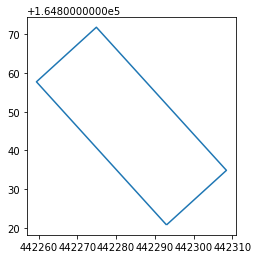

In [261]:
bld_proj1.geometry.boundary.plot()

In [262]:
# copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name      type                       geometry
2775  322278241  Charlotte City Hall  townhall  POINT (442283.958 164846.283)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

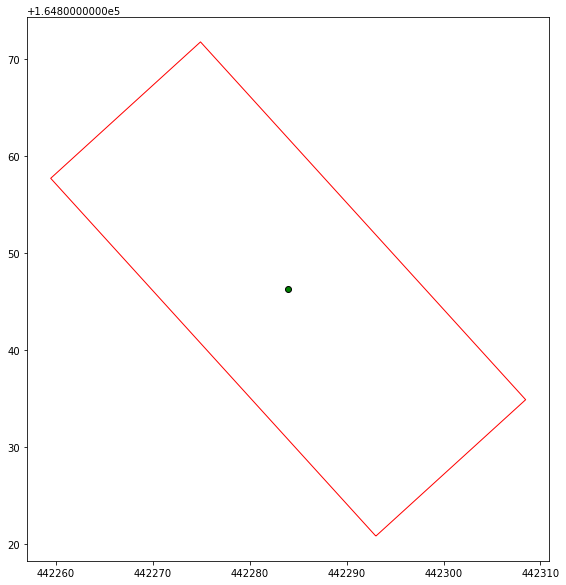

In [263]:
fig, ax = plt.subplots(figsize = (15,10)) 
bld_proj2.plot(ax=ax,color="green",edgecolor='k')
bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [264]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  393.654456  18.547945   5.958904   1236.0  ...   
1  160.742460  16.082192   4.602740    740.0  ...   
2   39.364881  15.465753   2.945205    328.0  ...   
3  149.292520  11.630137   4.780822   2049.0  ...   
4   33.307341   2.438356   1.136986   1443.0  ...   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                        geometry  min_dist_to_school min_dist_to_college  \
0  POINT (440167.090 163506.089)         2421.857994         9586.368741   
1  POINT (444442.876 164385.527)         1687.108336         4478.048087   
2  POINT (442277.682 160005.150)         3001.458672        14595.415186   
3  POINT (441173.175 164818.677)         2534.811945         5169.515202   
4  POINT (442252.867 164026.406)         2069.054243         2614.970164   

   min_dist_to_university  lanes  maxspeed min_dist_to_polygon  \
0             8278.354216      4      35.0         2394.550560   
1             7268.572020      2      25.0         2779.921585   
2             3924.702931      2      25.0         5021.429426   
3             3389.043815      2      20.0         3298.256658   
4             5081.975065      2      25.0         2179.475405   

   min_dist_to_CBD  
0      8219.960278  
1      7242.577692  
2     15882.995661  
3      3645.426147  
4      2691.820923  

[5 rows x 22 columns]

In [265]:
CBD_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_CBD']]
CBD_distance1.columns=["osm_id","Distance to CBD"]
CBD_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to CBD
0   55186886.0      8219.960278
1   16701397.0      7242.577692
2  493705004.0     15882.995661
3   34764115.0      3645.426147
4  322993730.0      2691.820923

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [599]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S   983262.0     0.0  +36.0991247   
1  Block Group 2  G5030        S  1196525.0     0.0  +36.0922109   
2  Block Group 3  G5030        S  1352647.0     0.0  +36.0835374   
3  Block Group 4  G5030        S   979253.0     0.0  +36.0938695   
4  Block Group 1  G5030        S  1017947.0     0.0  +36.0889597   

       INTPTLON   Shape_Leng    Shape_Area  \
0  -079.4483765  4219.657537  9.832628e+05   
1  -079.4507937  5560.284248  1.196524e+06   
2  -079.4454912  6166.325038  1.352646e+06   
3  -079.4366101  4466.313064  9.792536e+05   
4  -079.4121098  4084.416155  1.017947e+06   

                                            geometry  \
0  POLYGON ((1469580.256 -28293.846, 1469621.427 ...   
1  POLYGON ((1470127.869 -28927.264, 1470120.113 ...   
2  POLYGON ((1470300.848 -29763.187, 1470279.817 ...   
3  POLYGON ((1470654.010 -28431.508, 1470667.060 ...   
4  POLYGON ((1473132.528 -29862.466, 1472673.139 ...   

                                           wktcolumn  
0  POLYGON ((1469580.2562000006 -28293.8456999994...  
1  POLYGON ((1470127.8685000017 -28927.2642999999...  
2  POLYGON ((1470300.8480000012 -29763.1872000005...  
3  POLYGON ((1470654.0102000013 -28431.5083000008...  
4  POLYGON ((1473132.5280000009 -29862.4664999991...

In [600]:
bg.shape

(6127, 17)

In [601]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [602]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S   983262.0     0.0  +36.0991247   
1  Block Group 2  G5030        S  1196525.0     0.0  +36.0922109   
2  Block Group 3  G5030        S  1352647.0     0.0  +36.0835374   
3  Block Group 4  G5030        S   979253.0     0.0  +36.0938695   
4  Block Group 1  G5030        S  1017947.0     0.0  +36.0889597   

       INTPTLON   Shape_Leng    Shape_Area  \
0  -079.4483765  4219.657537  9.832628e+05   
1  -079.4507937  5560.284248  1.196524e+06   
2  -079.4454912  6166.325038  1.352646e+06   
3  -079.4366101  4466.313064  9.792536e+05   
4  -079.4121098  4084.416155  1.017947e+06   

                                            geometry  
0  POLYGON ((1469580.256 -28293.846, 1469621.427 ...  
1  POLYGON ((1470127.869 -28927.264, 1470120.113 ...  
2  POLYGON ((1470300.848 -29763.187, 1470279.817 ...  
3  POLYGON ((1470654.010 -28431.508, 1470667.060 ...  
4  POLYGON ((1473132.528 -29862.466, 1472673.139 ...

In [603]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:3358')
bg_proj.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S   983262.0     0.0  +36.0991247   
1  Block Group 2  G5030        S  1196525.0     0.0  +36.0922109   
2  Block Group 3  G5030        S  1352647.0     0.0  +36.0835374   
3  Block Group 4  G5030        S   979253.0     0.0  +36.0938695   
4  Block Group 1  G5030        S  1017947.0     0.0  +36.0889597   

       INTPTLON   Shape_Leng    Shape_Area  \
0  -079.4483765  4219.657537  9.832628e+05   
1  -079.4507937  5560.284248  1.196524e+06   
2  -079.4454912  6166.325038  1.352646e+06   
3  -079.4366101  4466.313064  9.792536e+05   
4  -079.4121098  4084.416155  1.017947e+06   

                                            geometry  
0  POLYGON ((569549.337 261011.690, 569587.878 26...  
1  POLYGON ((569979.658 260297.634, 569969.427 26...  
2  POLYGON ((570001.577 259452.138, 569978.761 25...  
3  POLYGON ((570591.120 260688.296, 570601.863 26...  
4  POLYGON ((572796.199 258856.442, 572358.504 25...

In [604]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S   983262.0     0.0  +36.0991247   
1  Block Group 2  G5030        S  1196525.0     0.0  +36.0922109   
2  Block Group 3  G5030        S  1352647.0     0.0  +36.0835374   
3  Block Group 4  G5030        S   979253.0     0.0  +36.0938695   
4  Block Group 1  G5030        S  1017947.0     0.0  +36.0889597   

       INTPTLON   Shape_Leng    Shape_Area  \
0  -079.4483765  4219.657537  9.832628e+05   
1  -079.4507937  5560.284248  1.196524e+06   
2  -079.4454912  6166.325038  1.352646e+06   
3  -079.4366101  4466.313064  9.792536e+05   
4  -079.4121098  4084.416155  1.017947e+06   

                                            geometry  Total block Area  
0  POLYGON ((569549.337 261011.690, 569587.878 26...      9.832279e+05  
1  POLYGON ((569979.658 260297.634, 569969.427 26...      1.196477e+06  
2  POLYGON ((570001.577 259452.138, 569978.761 25...      1.352588e+06  
3  POLYGON ((570591.120 260688.296, 570601.863 26...      9.792166e+05  
4  POLYGON ((572796.199 258856.442, 572358.504 25...      1.017906e+06

In [605]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
race.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA           STATE  STATEA  \
0  G37000100201001  2014-2018      NaN        NaN  North Carolina      37   
1  G37000100201002  2014-2018      NaN        NaN  North Carolina      37   
2  G37000100201003  2014-2018      NaN        NaN  North Carolina      37   
3  G37000100201004  2014-2018      NaN        NaN  North Carolina      37   
4  G37000100202001  2014-2018      NaN        NaN  North Carolina      37   

            COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AJWNM001  AJWNM002  \
0  Alamance County        1      NaN     NaN  ...       211       190   
1  Alamance County        1      NaN     NaN  ...       166       159   
2  Alamance County        1      NaN     NaN  ...       253        81   
3  Alamance County        1      NaN     NaN  ...       187       113   
4  Alamance County        1      NaN     NaN  ...       487       304   

   AJWNM003  AJWNM004  AJWNM005  AJWNM006  AJWNM007  AJWNM008  AJWNM009  \
0       130        12        99        12        12        45        42   
1        28        12        29        12        13        19        12   
2       243        16        12        12       118        42        36   
3        74        12        12        12       139        12        12   
4       342        12       184        12        12         7        12   

   AJWNM010  
0        14  
1        19  
2        19  
3        12  
4         7  

[5 rows x 58 columns]

In [606]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  AJWNM001 AJWNM002 AJWNM003  \
0  Block Group 1  G5030        S   983262.0  ...       211      190      130   
1  Block Group 2  G5030        S  1196525.0  ...       166      159       28   
2  Block Group 3  G5030        S  1352647.0  ...       253       81      243   
3  Block Group 4  G5030        S   979253.0  ...       187      113       74   
4  Block Group 1  G5030        S  1017947.0  ...       487      304      342   

   AJWNM004  AJWNM005 AJWNM006  AJWNM007 AJWNM008  AJWNM009  AJWNM010  
0        12        99       12        12       45        42        14  
1        12        29       12        13       19        12        19  
2        16        12       12       118       42        36        19  
3        12        12       12       139       12        12        12  
4        12       184       12        12        7        12         7  

[5 rows x 74 columns]


    Table 1:     Race
    Universe:    Total population
    Source code: B02001
    NHGIS code:  AJWN
        AJWNE001:    Total
        AJWNE002:    White alone
        AJWNE003:    Black or African American alone
        AJWNE004:    American Indian and Alaska Native alone
        AJWNE005:    Asian alone
        AJWNE006:    Native Hawaiian and Other Pacific Islander alone
        AJWNE007:    Some other race alone
        AJWNE008:    Two or more races
        AJWNE009:    Two or more races: Two races including Some other race
        AJWNE010:    Two or more races: Two races excluding Some other race, and three or more races

In [607]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AJWNE001','AJWNE002','AJWNE003','Total block Area']]
race2.head(5)

INTPTLAT      INTPTLON          GISJOIN   Shape_Leng    Shape_Area  \
0  +36.0991247  -079.4483765  G37000100201001  4219.657537  9.832628e+05   
1  +36.0922109  -079.4507937  G37000100201002  5560.284248  1.196524e+06   
2  +36.0835374  -079.4454912  G37000100201003  6166.325038  1.352646e+06   
3  +36.0938695  -079.4366101  G37000100201004  4466.313064  9.792536e+05   
4  +36.0889597  -079.4121098  G37000100202001  4084.416155  1.017947e+06   

                                            geometry  AJWNE001  AJWNE002  \
0  POLYGON ((569549.337 261011.690, 569587.878 26...      1388      1098   
1  POLYGON ((569979.658 260297.634, 569969.427 26...       952       883   
2  POLYGON ((570001.577 259452.138, 569978.761 25...      1007       151   
3  POLYGON ((570591.120 260688.296, 570601.863 26...       492       262   
4  POLYGON ((572796.199 258856.442, 572358.504 25...      1146       639   

   AJWNE003  Total block Area  
0       191      9.832279e+05  
1        26      1.196477e+06  
2       689      1.352588e+06  
3       124      9.792166e+05  
4       400      1.017906e+06

In [233]:
#race2["Total block Area"]=race2.area
#race2

In [234]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
buffer_clip_race.head(5)

INTPTLAT      INTPTLON          GISJOIN   Shape_Leng    Shape_Area  \
3660  +35.3152775  -080.7518124  G37011900055232  5443.095436  1.531844e+06   
3674  +35.3223377  -080.7200438  G37011900056091  8350.385035  3.245874e+06   
3661  +35.3220608  -080.7399718  G37011900055233  5231.726276  1.461143e+06   
3653  +35.3260581  -080.7346208  G37011900055211  2918.477936  4.029676e+05   
3654  +35.3367083  -080.7320340  G37011900055212  7219.563315  2.787919e+06   

                                               geometry  AJWNE001  AJWNE002  \
3660  POLYGON ((451633.489 175329.019, 451383.619 17...      2710      1229   
3674  MULTIPOLYGON (((453640.517 174433.813, 453635....      3462      1147   
3661  POLYGON ((451692.732 176168.205, 451708.253 17...      2141       574   
3653  POLYGON ((452298.030 176079.303, 452128.155 17...       944       546   
3654  POLYGON ((452311.104 176093.832, 452295.529 17...      2100       460   

      AJWNE003  Total block Area  
3660       860      1.531462e+06  
3674      1591      3.245058e+06  
3661       547      1.460777e+06  
3653       145      4.028665e+05  
3654       997      2.787221e+06

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


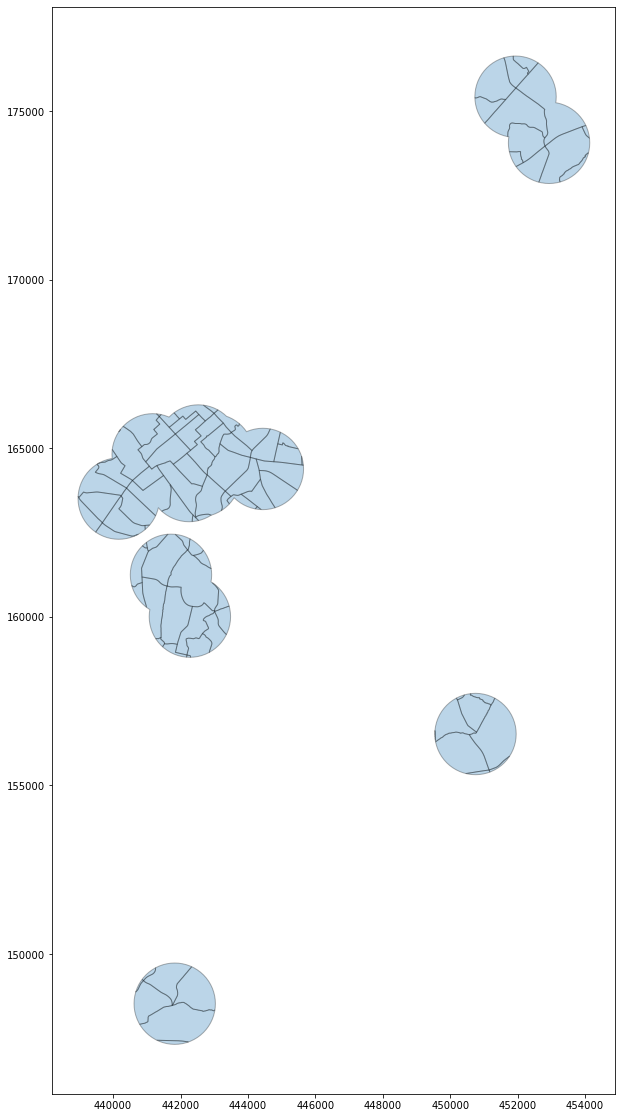

In [277]:
ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [278]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...     INTPTLAT      INTPTLON  \
0  393.654456  18.547945   5.958904   1236.0  ...  +35.2218499  -080.8584275   
1  149.292520  11.630137   4.780822   2049.0  ...  +35.2218499  -080.8584275   
2  393.654456  18.547945   5.958904   1236.0  ...  +35.2154182  -080.8517089   
3  149.292520  11.630137   4.780822   2049.0  ...  +35.2154182  -080.8517089   
4   33.307341   2.438356   1.136986   1443.0  ...  +35.2154182  -080.8517089   

           GISJOIN   Shape_Leng    Shape_Area AJWNE001 AJWNE002  AJWNE003  \
0  G37011900004001  4786.586286  1.027138e+06     1762     1485       133   
1  G37011900004001  4786.586286  1.027138e+06     1762     1485       133   
2  G37011900004002  2495.016710  3.436644e+05     1372      959       280   
3  G37011900004002  2495.016710  3.436644e+05     1372      959       280   
4  G37011900004002  2495.016710  3.436644e+05     1372      959       280   

   Total block Area                                           geometry  
0      1.026879e+06  POLYGON ((440167.090 164713.097, 440285.398 16...  
1      1.026879e+06  POLYGON ((440018.140 165169.053, 440058.045 16...  
2      3.435778e+05  POLYGON ((441020.574 164359.573, 441100.120 16...  
3      3.435778e+05  POLYGON ((441318.152 164060.448, 441283.363 16...  
4      3.435778e+05  POLYGON ((441051.671 163908.098, 441045.859 16...  

[5 rows x 24 columns]

In [279]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...          GISJOIN  \
0  393.654456  18.547945   5.958904   1236.0  ...  G37011900004001   
1  149.292520  11.630137   4.780822   2049.0  ...  G37011900004001   
2  393.654456  18.547945   5.958904   1236.0  ...  G37011900004002   
3  149.292520  11.630137   4.780822   2049.0  ...  G37011900004002   
4   33.307341   2.438356   1.136986   1443.0  ...  G37011900004002   

    Shape_Leng    Shape_Area  AJWNE001 AJWNE002 AJWNE003 Total block Area  \
0  4786.586286  1.027138e+06      1762     1485      133     1.026879e+06   
1  4786.586286  1.027138e+06      1762     1485      133     1.026879e+06   
2  2495.016710  3.436644e+05      1372      959      280     3.435778e+05   
3  2495.016710  3.436644e+05      1372      959      280     3.435778e+05   
4  2495.016710  3.436644e+05      1372      959      280     3.435778e+05   

                                            geometry  buffered area  \
0  POLYGON ((440167.090 164713.097, 440285.398 16...  299685.726755   
1  POLYGON ((440018.140 165169.053, 440058.045 16...  952809.330770   
2  POLYGON ((441020.574 164359.573, 441100.120 16...  230801.006584   
3  POLYGON ((441318.152 164060.448, 441283.363 16...  343577.760464   
4  POLYGON ((441051.671 163908.098, 441045.859 16...  151854.928271   

   area factor  
0     0.291841  
1     0.927869  
2     0.671758  
3     1.000000  
4     0.441981  

[5 rows x 26 columns]

In [280]:
output_pct_race= inter_race.loc[:, ['osm_id_sensor', 'AJWNE001','AJWNE002','AJWNE003','area factor']]
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWNE001  AJWNE002  AJWNE003  area factor
0     55186886.0      1762      1485       133     0.291841
1     34764115.0      1762      1485       133     0.927869
2     55186886.0      1372       959       280     0.671758
3     34764115.0      1372       959       280     1.000000
4    322993730.0      1372       959       280     0.441981

In [281]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AJWNE001     AJWNE002    AJWNE003
0     55186886.0   514.224518   433.384455   38.814904
1     34764115.0  1634.905755  1377.885951  123.406621
2     55186886.0   921.651566   644.215636  188.092156
3     34764115.0  1372.000000   959.000000  280.000000
4    322993730.0   606.398276   423.860019  123.754750

# Aggregate by ID

In [282]:
output_pct_race=output_pct_race.groupby('osm_id_sensor', as_index=False).sum()
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AJWNE001     AJWNE002     AJWNE003
0     16694967.0  5674.750647  2586.821430  1803.914551
1     16701397.0  7854.921690  5888.688042  1393.409444
2     34764115.0  9787.922886  7130.250643  1604.131127
3     51062797.0  8734.515465  5223.334098  2716.933149
4     51062957.0  6436.781116  3167.000903  2656.313328

# Percentange of White and African American

In [283]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AJWNE002']/output_pct_race['AJWNE001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AJWNE003']/output_pct_race['AJWNE001'])*100
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AJWNE001     AJWNE002     AJWNE003  pct_white  \
0     16694967.0  5674.750647  2586.821430  1803.914551  45.584759   
1     16701397.0  7854.921690  5888.688042  1393.409444  74.968132   
2     34764115.0  9787.922886  7130.250643  1604.131127  72.847434   
3     51062797.0  8734.515465  5223.334098  2716.933149  59.801074   
4     51062957.0  6436.781116  3167.000903  2656.313328  49.201625   

   pct_African_American  
0             31.788437  
1             17.739317  
2             16.388882  
3             31.105711  
4             41.267728

In [284]:
output_pct_race1=output_pct_race.drop(['AJWNE001','AJWNE002','AJWNE003'],axis=1)
output_pct_race1.columns=['osm_id','pct_white','pct_African_American']
output_pct_race1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_white  pct_African_American
0  16694967.0  45.584759             31.788437
1  16701397.0  74.968132             17.739317
2  34764115.0  72.847434             16.388882
3  51062797.0  59.801074             31.105711
4  51062957.0  49.201625             41.267728

# Percentage of Male and Female

In [285]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALT0M040  ALT0M041  \
0      37  Alamance County        1      NaN  ...        56        18   
1      37  Alamance County        1      NaN  ...        31        32   
2      37  Alamance County        1      NaN  ...        19        44   
3      37  Alamance County        1      NaN  ...        27        41   
4      37  Alamance County        1      NaN  ...        33        70   

   ALT0M042  ALT0M043  ALT0M044  ALT0M045  ALT0M046  ALT0M047  ALT0M048  \
0        14        27        14        31        16        15        26   
1        24        26        21        33        20        26        23   
2        20        58        12         7        12        15        12   
3        15        44        12        13        13        12        20   
4        12        49        11        41        17        12        12   

   ALT0M049  
0        16  
1        16  
2        15  
3        12  
4        14  

[5 rows x 142 columns]

In [286]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
gender1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALT0M040 ALT0M041 ALT0M042  \
0  Block Group 1  G5030        S   983262.0  ...        56       18       14   
1  Block Group 2  G5030        S  1196525.0  ...        31       32       24   
2  Block Group 3  G5030        S  1352647.0  ...        19       44       20   
3  Block Group 4  G5030        S   979253.0  ...        27       41       15   
4  Block Group 1  G5030        S  1017947.0  ...        33       70       12   

   ALT0M043  ALT0M044 ALT0M045  ALT0M046 ALT0M047 ALT0M048  ALT0M049  
0        27        14       31        16       15       26        16  
1        26        21       33        20       26       23        16  
2        58        12        7        12       15       12        15  
3        44        12       13        13       12       20        12  
4        49        11       41        17       12       12        14  

[5 rows x 158 columns]

In [287]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3337  G37011900001001      37      119  000100        1  371190001001   
3338  G37011900001002      37      119  000100        2  371190001002   
3339  G37011900001003      37      119  000100        3  371190001003   
3340  G37011900001004      37      119  000100        4  371190001004   
3341  G37011900001005      37      119  000100        5  371190001005   

           NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALT0M040 ALT0M041  \
3337  Block Group 1  G5030        S  495869.0  ...        29       53   
3338  Block Group 2  G5030        S  179471.0  ...        32       39   
3339  Block Group 3  G5030        S  193767.0  ...        90       45   
3340  Block Group 4  G5030        S  418131.0  ...        12       12   
3341  Block Group 5  G5030        S  652831.0  ...        46       58   

     ALT0M042  ALT0M043  ALT0M044 ALT0M045  ALT0M046 ALT0M047 ALT0M048  \
3337       60        39        12       12        15       12       12   
3338       12        12        12       33        33       12       12   
3339       91        12        10       39        21       12       12   
3340       12        12        12       12        12       12       12   
3341       12        12        12       12        20       12       12   

      ALT0M049  
3337        21  
3338        12  
3339        12  
3340        12  
3341        12  

[5 rows x 158 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


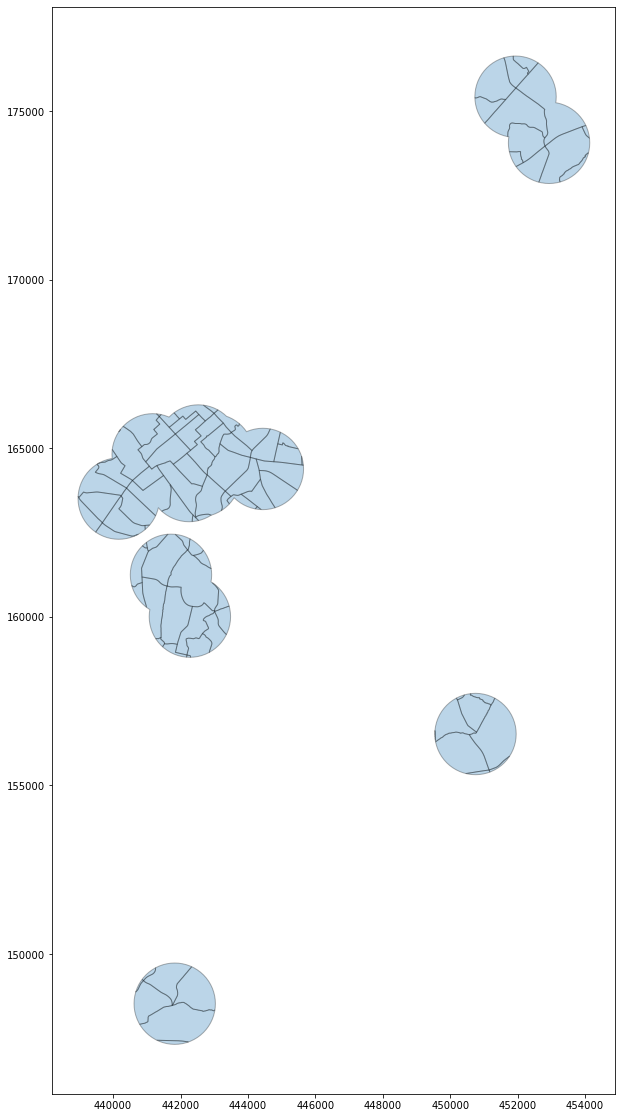

In [288]:
ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [289]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALT0M041  ALT0M042  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        68        25   
3  149.292520  11.630137   4.780822   2049.0  ...        68        25   
4   33.307341   2.438356   1.136986   1443.0  ...        68        25   

  ALT0M043  ALT0M044 ALT0M045 ALT0M046 ALT0M047 ALT0M048 ALT0M049  \
0       12        12       12       12       12       12       12   
1       12        12       12       12       12       12       12   
2       12        23       23       12       12       12       12   
3       12        23       23       12       12       12       12   
4       12        23       23       12       12       12       12   

                                            geometry  
0  POLYGON ((440167.090 164713.097, 440285.398 16...  
1  POLYGON ((440018.140 165169.053, 440058.045 16...  
2  POLYGON ((441020.574 164359.573, 441100.120 16...  
3  POLYGON ((441318.152 164060.448, 441283.363 16...  
4  POLYGON ((441051.671 163908.098, 441045.859 16...  

[5 rows x 172 columns]

In [290]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALT0M043  ALT0M044  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        23   
3  149.292520  11.630137   4.780822   2049.0  ...        12        23   
4   33.307341   2.438356   1.136986   1443.0  ...        12        23   

  ALT0M045  ALT0M046 ALT0M047 ALT0M048 ALT0M049  \
0       12        12       12       12       12   
1       12        12       12       12       12   
2       23        12       12       12       12   
3       23        12       12       12       12   
4       23        12       12       12       12   

                                            geometry  buffered area  \
0  POLYGON ((440167.090 164713.097, 440285.398 16...  299685.726755   
1  POLYGON ((440018.140 165169.053, 440058.045 16...  952809.330770   
2  POLYGON ((441020.574 164359.573, 441100.120 16...  230801.006584   
3  POLYGON ((441318.152 164060.448, 441283.363 16...  343577.760464   
4  POLYGON ((441051.671 163908.098, 441045.859 16...  151854.928271   

  area factor  
0    0.291841  
1    0.927869  
2    0.671758  
3    1.000000  
4    0.441981  

[5 rows x 174 columns]


    Table 1:     Sex by Age
    Universe:    Total population
    Source code: B01001
    NHGIS code:  ALT0
        ALT0E001:    Total
        ALT0E002:    Male
        ALT0E003:    Male: Under 5 years
        ALT0E004:    Male: 5 to 9 years
        ALT0E005:    Male: 10 to 14 years
        ALT0E006:    Male: 15 to 17 years
        ALT0E007:    Male: 18 and 19 years
        ALT0E008:    Male: 20 years
        ALT0E009:    Male: 21 years
        ALT0E010:    Male: 22 to 24 years
        ALT0E011:    Male: 25 to 29 years
        ALT0E012:    Male: 30 to 34 years
        ALT0E013:    Male: 35 to 39 years
        ALT0E014:    Male: 40 to 44 years
        ALT0E015:    Male: 45 to 49 years
        ALT0E016:    Male: 50 to 54 years
        ALT0E017:    Male: 55 to 59 years
        ALT0E018:    Male: 60 and 61 years
        ALT0E019:    Male: 62 to 64 years
        ALT0E020:    Male: 65 and 66 years
        ALT0E021:    Male: 67 to 69 years
        ALT0E022:    Male: 70 to 74 years
        ALT0E023:    Male: 75 to 79 years
        ALT0E024:    Male: 80 to 84 years
        ALT0E025:    Male: 85 years and over
        ALT0E026:    Female
        ALT0E027:    Female: Under 5 years
        ALT0E028:    Female: 5 to 9 years
        ALT0E029:    Female: 10 to 14 years
        ALT0E030:    Female: 15 to 17 years
        ALT0E031:    Female: 18 and 19 years
        ALT0E032:    Female: 20 years
        ALT0E033:    Female: 21 years
        ALT0E034:    Female: 22 to 24 years
        ALT0E035:    Female: 25 to 29 years
        ALT0E036:    Female: 30 to 34 years
        ALT0E037:    Female: 35 to 39 years
        ALT0E038:    Female: 40 to 44 years
        ALT0E039:    Female: 45 to 49 years
        ALT0E040:    Female: 50 to 54 years
        ALT0E041:    Female: 55 to 59 years
        ALT0E042:    Female: 60 and 61 years

In [291]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['osm_id_sensor', 'ALT0E001', 'ALT0E002', 'ALT0E026','area factor']]
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALT0E001  ALT0E002  ALT0E026  area factor
0     55186886.0      1868       965       903     0.291841
1     34764115.0      1868       965       903     0.927869
2     55186886.0      1622       957       665     0.671758
3     34764115.0      1622       957       665     1.000000
4    322993730.0      1622       957       665     0.441981

In [292]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALT0E001    ALT0E002    ALT0E026
0     55186886.0   545.159705  281.626935  263.532770
1     34764115.0  1733.259904  895.393901  837.866003
2     55186886.0  1089.590991  642.872120  446.718871
3     34764115.0  1622.000000  957.000000  665.000000
4    322993730.0   716.893589  422.976057  293.917532

In [293]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      ALT0E001     ALT0E002     ALT0E026
0     16694967.0   5718.845979  2665.943412  3052.902567
1     16701397.0   8417.642914  3947.482734  4470.160180
2     34764115.0  10711.211987  5861.510535  4849.701451
3     51062797.0   9426.064416  5101.640953  4324.423463
4     51062957.0   6765.563854  3369.410879  3396.152975

In [294]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['ALT0E002']/output_pct_gender['ALT0E001'])*100
output_pct_gender['pct_female']=(output_pct_gender['ALT0E026']/output_pct_gender['ALT0E001'])*100
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      ALT0E001     ALT0E002     ALT0E026   pct_male  \
0     16694967.0   5718.845979  2665.943412  3052.902567  46.616807   
1     16701397.0   8417.642914  3947.482734  4470.160180  46.895346   
2     34764115.0  10711.211987  5861.510535  4849.701451  54.723131   
3     51062797.0   9426.064416  5101.640953  4324.423463  54.122704   
4     51062957.0   6765.563854  3369.410879  3396.152975  49.802366   

   pct_female  
0   53.383193  
1   53.104654  
2   45.276869  
3   45.877296  
4   50.197634

In [295]:
output_pct_gender1=output_pct_gender.drop(['ALT0E001', 'ALT0E002', 'ALT0E026'],axis=1)
output_pct_gender1.columns=['osm_id','pct_male','pct_female']
output_pct_gender1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   pct_male  pct_female
0  16694967.0  46.616807   53.383193
1  16701397.0  46.895346   53.104654
2  34764115.0  54.723131   45.276869
3  51062797.0  54.122704   45.877296
4  51062957.0  49.802366   50.197634

# Number of Student (student access) and Education (pct of at least college education population)

In [296]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALWGM016  ALWGM017  \
0      37  Alamance County        1      NaN  ...        12        77   
1      37  Alamance County        1      NaN  ...        12        68   
2      37  Alamance County        1      NaN  ...        38       104   
3      37  Alamance County        1      NaN  ...        12        57   
4      37  Alamance County        1      NaN  ...        29        93   

   ALWGM018  ALWGM019  ALWGM020  ALWGM021  ALWGM022  ALWGM023  ALWGM024  \
0        29        43        64        74       117        45        21   
1        20        38        91        33       106        47        41   
2        62        13        52        62        12        14        12   
3        18        34        76        44        34        12        12   
4        99        27        80        71        53        12        12   

   ALWGM025  
0       119  
1        29  
2        15  
3        12  
4        12  

[5 rows x 94 columns]

In [297]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALWGM016 ALWGM017 ALWGM018  \
0  Block Group 1  G5030        S   983262.0  ...        12       77       29   
1  Block Group 2  G5030        S  1196525.0  ...        12       68       20   
2  Block Group 3  G5030        S  1352647.0  ...        38      104       62   
3  Block Group 4  G5030        S   979253.0  ...        12       57       18   
4  Block Group 1  G5030        S  1017947.0  ...        29       93       99   

   ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024  ALWGM025  
0        43        64       74       117       45       21       119  
1        38        91       33       106       47       41        29  
2        13        52       62        12       14       12        15  
3        34        76       44        34       12       12        12  
4        27        80       71        53       12       12        12  

[5 rows x 110 columns]

In [298]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3337  G37011900001001      37      119  000100        1  371190001001   
3338  G37011900001002      37      119  000100        2  371190001002   
3339  G37011900001003      37      119  000100        3  371190001003   
3340  G37011900001004      37      119  000100        4  371190001004   
3341  G37011900001005      37      119  000100        5  371190001005   

           NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALWGM016 ALWGM017  \
3337  Block Group 1  G5030        S  495869.0  ...        12      113   
3338  Block Group 2  G5030        S  179471.0  ...        12       31   
3339  Block Group 3  G5030        S  193767.0  ...        12       15   
3340  Block Group 4  G5030        S  418131.0  ...        12       69   
3341  Block Group 5  G5030        S  652831.0  ...        12       20   

     ALWGM018  ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024  \
3337       25        44        79       51       200      121       41   
3338        8        36        64       81       197      123       34   
3339       12        32       119      183       154       77       62   
3340       12        12        12       12        42       12       12   
3341       12        54        37       12       200       44       12   

      ALWGM025  
3337        40  
3338        84  
3339        45  
3340        12  
3341        12  

[5 rows x 110 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


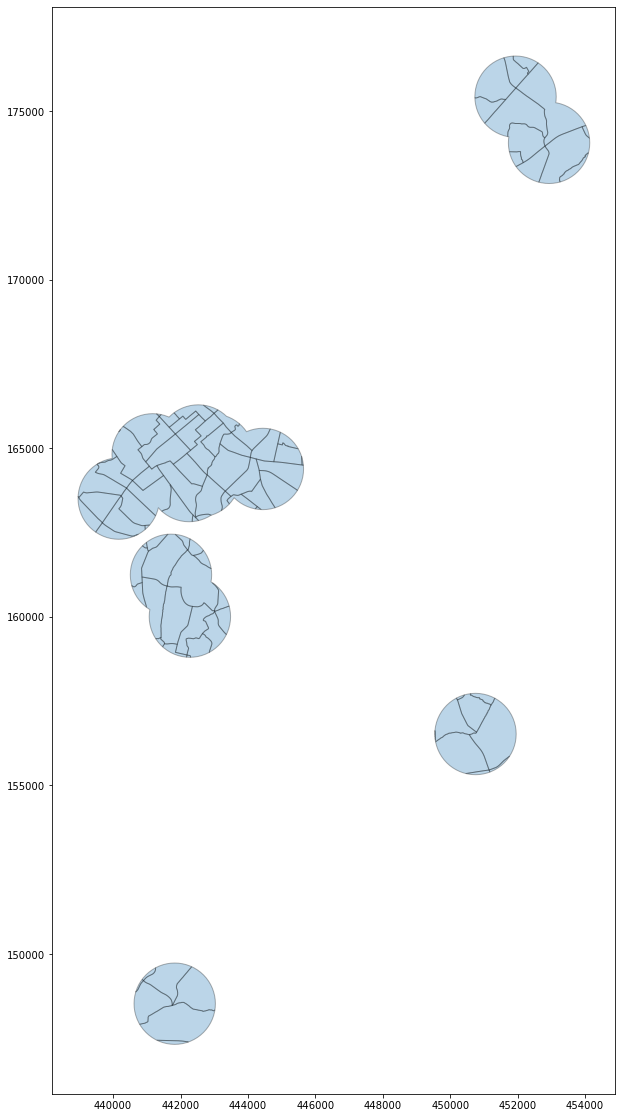

In [299]:
ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [300]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALWGM017  ALWGM018  \
0  393.654456  18.547945   5.958904   1236.0  ...        35        12   
1  149.292520  11.630137   4.780822   2049.0  ...        35        12   
2  393.654456  18.547945   5.958904   1236.0  ...        52        16   
3  149.292520  11.630137   4.780822   2049.0  ...        52        16   
4   33.307341   2.438356   1.136986   1443.0  ...        52        16   

  ALWGM019  ALWGM020 ALWGM021 ALWGM022 ALWGM023 ALWGM024 ALWGM025  \
0       17        47       32      150      111       60       31   
1       17        47       32      150      111       60       31   
2       52        71       44      155      110       38       26   
3       52        71       44      155      110       38       26   
4       52        71       44      155      110       38       26   

                                            geometry  
0  POLYGON ((440167.090 164713.097, 440285.398 16...  
1  POLYGON ((440018.140 165169.053, 440058.045 16...  
2  POLYGON ((441020.574 164359.573, 441100.120 16...  
3  POLYGON ((441318.152 164060.448, 441283.363 16...  
4  POLYGON ((441051.671 163908.098, 441045.859 16...  

[5 rows x 124 columns]

In [301]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALWGM019  ALWGM020  \
0  393.654456  18.547945   5.958904   1236.0  ...        17        47   
1  149.292520  11.630137   4.780822   2049.0  ...        17        47   
2  393.654456  18.547945   5.958904   1236.0  ...        52        71   
3  149.292520  11.630137   4.780822   2049.0  ...        52        71   
4   33.307341   2.438356   1.136986   1443.0  ...        52        71   

  ALWGM021  ALWGM022 ALWGM023 ALWGM024 ALWGM025  \
0       32       150      111       60       31   
1       32       150      111       60       31   
2       44       155      110       38       26   
3       44       155      110       38       26   
4       44       155      110       38       26   

                                            geometry  buffered area  \
0  POLYGON ((440167.090 164713.097, 440285.398 16...  299685.726755   
1  POLYGON ((440018.140 165169.053, 440058.045 16...  952809.330770   
2  POLYGON ((441020.574 164359.573, 441100.120 16...  230801.006584   
3  POLYGON ((441318.152 164060.448, 441283.363 16...  343577.760464   
4  POLYGON ((441051.671 163908.098, 441045.859 16...  151854.928271   

  area factor  
0    0.291841  
1    0.927869  
2    0.671758  
3    1.000000  
4    0.441981  

[5 rows x 126 columns]

In [302]:
edu_filter=inter_edu.loc[:, ['osm_id_sensor', 'ALWGE001', 'ALWGE019','ALWGE020','ALWGE021', 'ALWGE022','ALWGE023','ALWGE024','ALWGE025','area factor']]
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALWGE001  ALWGE019  ALWGE020  ALWGE021  ALWGE022  ALWGE023  \
0     55186886.0      1186        11        80        42       645       278   
1     34764115.0      1186        11        80        42       645       278   
2     55186886.0      1219        38        91        58       504       320   
3     34764115.0      1219        38        91        58       504       320   
4    322993730.0      1219        38        91        58       504       320   

   ALWGE024  ALWGE025  area factor  
0        83        26     0.291841  
1        83        26     0.927869  
2        48        24     0.671758  
3        48        24     1.000000  
4        48        24     0.441981

In [303]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALWGE001   ALWGE019   ALWGE020   ALWGE021    ALWGE022  \
0     55186886.0   346.123881   3.210255  23.347311  12.257338  188.237693   
1     34764115.0  1100.453022  10.206563  74.229546  38.970512  598.475716   
2     55186886.0   818.872638  25.526793  61.129951  38.961947  338.565881   
3     34764115.0  1219.000000  38.000000  91.000000  58.000000  504.000000   
4    322993730.0   538.775145  16.795288  40.220294  25.634913  222.758550   

     ALWGE023   ALWGE024   ALWGE025  
0   81.131905  24.222835   7.587876  
1  257.947673  77.013154  24.124603  
2  214.962464  32.244370  16.122185  
3  320.000000  48.000000  24.000000  
4  141.434000  21.215100  10.607550

In [304]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALWGE001    ALWGE019    ALWGE020    ALWGE021  \
0     16694967.0  3971.509994  184.429248  707.092114  315.515211   
1     16701397.0  6235.203332  206.233627  703.940259  246.485885   
2     34764115.0  7701.736797  286.673808  452.842550  378.834619   
3     51062797.0  6999.250853  205.810988  718.072635  455.960419   
4     51062957.0  4631.101721  178.705041  590.124736  204.477840   

      ALWGE022     ALWGE023    ALWGE024    ALWGE025  
0  1069.449764   351.561228   29.434755   15.642703  
1  2691.676480  1089.223713  406.830615  159.586061  
2  3778.249846  1697.126279  340.523251  183.450727  
3  2937.262732  1187.392287  296.708404  152.268439  
4  1775.421741   631.621284  213.649535   80.626066

# Number of students 

In [305]:
scll.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALV5M010  ALV5M011  \
0      37  Alamance County        1      NaN  ...        17        12   
1      37  Alamance County        1      NaN  ...        12        12   
2      37  Alamance County        1      NaN  ...        56        12   
3      37  Alamance County        1      NaN  ...        12        12   
4      37  Alamance County        1      NaN  ...         2        32   

   ALV5M012  ALV5M013  ALV5M014  ALV5M015  ALV5M016  ALV5M017  ALV5M018  \
0        15        37        15        50        12        38        12   
1        21        12        16        14        12        41        50   
2        40        14        12        12         6        32        12   
3        12        12        22        24        12        28        12   
4        12        27        35        12        12        17        12   

   ALV5M019  
0       182  
1       154  
2       156  
3       155  
4       309  

[5 rows x 82 columns]

In [306]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALV5M010 ALV5M011 ALV5M012  \
0  Block Group 1  G5030        S   983262.0  ...        17       12       15   
1  Block Group 2  G5030        S  1196525.0  ...        12       12       21   
2  Block Group 3  G5030        S  1352647.0  ...        56       12       40   
3  Block Group 4  G5030        S   979253.0  ...        12       12       12   
4  Block Group 1  G5030        S  1017947.0  ...         2       32       12   

   ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
0        37        15       50        12       38       12       182  
1        12        16       14        12       41       50       154  
2        14        12       12         6       32       12       156  
3        12        22       24        12       28       12       155  
4        27        35       12        12       17       12       309  

[5 rows x 98 columns]

In [307]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3337  G37011900001001      37      119  000100        1  371190001001   
3338  G37011900001002      37      119  000100        2  371190001002   
3339  G37011900001003      37      119  000100        3  371190001003   
3340  G37011900001004      37      119  000100        4  371190001004   
3341  G37011900001005      37      119  000100        5  371190001005   

           NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALV5M010 ALV5M011  \
3337  Block Group 1  G5030        S  495869.0  ...        12       12   
3338  Block Group 2  G5030        S  179471.0  ...        12       12   
3339  Block Group 3  G5030        S  193767.0  ...        12       12   
3340  Block Group 4  G5030        S  418131.0  ...        12       12   
3341  Block Group 5  G5030        S  652831.0  ...        12       12   

     ALV5M012  ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  \
3337       12        12        12       12        30       73       29   
3338       12        23        12       12        12      167       23   
3339       12        12        12       12        12       82       53   
3340       12        12        12       12        12       26       12   
3341       12        12        12       12        12       12       12   

      ALV5M019  
3337       270  
3338       231  
3339       292  
3340        76  
3341       357  

[5 rows x 98 columns]

In [308]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALV5M011  ALV5M012  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        12   
3  149.292520  11.630137   4.780822   2049.0  ...        12        12   
4   33.307341   2.438356   1.136986   1443.0  ...        12        12   

  ALV5M013  ALV5M014 ALV5M015 ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0       12        12       12       12       72       46      223   
1       12        12       12       12       72       46      223   
2       12        12       16       12       74       32      219   
3       12        12       16       12       74       32      219   
4       12        12       16       12       74       32      219   

                                            geometry  
0  POLYGON ((440167.090 164713.097, 440285.398 16...  
1  POLYGON ((440018.140 165169.053, 440058.045 16...  
2  POLYGON ((441020.574 164359.573, 441100.120 16...  
3  POLYGON ((441318.152 164060.448, 441283.363 16...  
4  POLYGON ((441051.671 163908.098, 441045.859 16...  

[5 rows x 112 columns]

In [309]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALV5M013  ALV5M014  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        12   
3  149.292520  11.630137   4.780822   2049.0  ...        12        12   
4   33.307341   2.438356   1.136986   1443.0  ...        12        12   

  ALV5M015  ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0       12        12       72       46      223   
1       12        12       72       46      223   
2       16        12       74       32      219   
3       16        12       74       32      219   
4       16        12       74       32      219   

                                            geometry  buffered area  \
0  POLYGON ((440167.090 164713.097, 440285.398 16...  299685.726755   
1  POLYGON ((440018.140 165169.053, 440058.045 16...  952809.330770   
2  POLYGON ((441020.574 164359.573, 441100.120 16...  230801.006584   
3  POLYGON ((441318.152 164060.448, 441283.363 16...  343577.760464   
4  POLYGON ((441051.671 163908.098, 441045.859 16...  151854.928271   

  area factor  
0    0.291841  
1    0.927869  
2    0.671758  
3    1.000000  
4    0.441981  

[5 rows x 114 columns]

In [310]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'ALV5E001', 'ALV5E017', 'ALV5E018','area factor']]
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALV5E001  ALV5E017  ALV5E018  area factor
0     55186886.0      1856       104        78     0.291841
1     34764115.0      1856       104        78     0.927869
2     55186886.0      1592       111        38     0.671758
3     34764115.0      1592       111        38     1.000000
4    322993730.0      1592       111        38     0.441981

In [311]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALV5E001    ALV5E017   ALV5E018
0     55186886.0   541.657609   30.351504  22.763628
1     34764115.0  1722.125472   96.498410  72.373808
2     55186886.0  1069.438260   74.565105  25.526793
3     34764115.0  1592.000000  111.000000  38.000000
4    322993730.0   703.634151   49.059919  16.795288

In [312]:
scl_filter['total student']=scl_filter['ALV5E017']+scl_filter['ALV5E018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0     55186886.0      53.115132
1     34764115.0     168.872218
2     55186886.0     100.091897
3     34764115.0     149.000000
4    322993730.0      65.855206

In [313]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0     16694967.0     393.589132
1     16701397.0     593.099224
2     34764115.0    1380.122630
3     51062797.0     942.596847
4     51062957.0     519.701278

In [314]:
output_student.columns=['osm_id', 'Student Access']
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Student Access
0  16694967.0      393.589132
1  16701397.0      593.099224
2  34764115.0     1380.122630
3  51062797.0      942.596847
4  51062957.0      519.701278

In [315]:
pd.DataFrame.to_csv(output_student, 'Air_student_C2019_update_2.0_mile.csv',sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Education ( pct of at least college population)

In [316]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

osm_id_sensor     ALWGE001    ALWGE019    ALWGE020    ALWGE021  \
0     16694967.0  3971.509994  184.429248  707.092114  315.515211   
1     16701397.0  6235.203332  206.233627  703.940259  246.485885   
2     34764115.0  7701.736797  286.673808  452.842550  378.834619   
3     51062797.0  6999.250853  205.810988  718.072635  455.960419   
4     51062957.0  4631.101721  178.705041  590.124736  204.477840   

      ALWGE022     ALWGE023    ALWGE024    ALWGE025  \
0  1069.449764   351.561228   29.434755   15.642703   
1  2691.676480  1089.223713  406.830615  159.586061   
2  3778.249846  1697.126279  340.523251  183.450727   
3  2937.262732  1187.392287  296.708404  152.268439   
4  1775.421741   631.621284  213.649535   80.626066   

   total_at_least_college_education  
0                       2673.125023  
1                       5503.976639  
2                       7117.701080  
3                       5953.475905  
4                       3674.626244

In [317]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['ALWGE001'])*100
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALWGE001    ALWGE019    ALWGE020    ALWGE021  \
0     16694967.0  3971.509994  184.429248  707.092114  315.515211   
1     16701397.0  6235.203332  206.233627  703.940259  246.485885   
2     34764115.0  7701.736797  286.673808  452.842550  378.834619   
3     51062797.0  6999.250853  205.810988  718.072635  455.960419   
4     51062957.0  4631.101721  178.705041  590.124736  204.477840   

      ALWGE022     ALWGE023    ALWGE024    ALWGE025  \
0  1069.449764   351.561228   29.434755   15.642703   
1  2691.676480  1089.223713  406.830615  159.586061   
2  3778.249846  1697.126279  340.523251  183.450727   
3  2937.262732  1187.392287  296.708404  152.268439   
4  1775.421741   631.621284  213.649535   80.626066   

   total_at_least_college_education  pct_at_least_college_education  
0                       2673.125023                       67.307524  
1                       5503.976639                       88.272609  
2                       7117.701080                       92.416831  
3                       5953.475905                       85.058759  
4                       3674.626244                       79.346697

In [318]:
output_pct_edu1=output_pct_edu.loc[:,['osm_id_sensor','pct_at_least_college_education']]
output_pct_edu1.columns=['osm_id','pct_at_least_college_education']
output_pct_edu1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_at_least_college_education
0  16694967.0                       67.307524
1  16701397.0                       88.272609
2  34764115.0                       92.416831
3  51062797.0                       85.058759
4  51062957.0                       79.346697

# Median Age

In [608]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
age.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  BTTRA  BTBGA  \
0      37  Alamance County        1      NaN  ...    NaN    NaN   
1      37  Alamance County        1      NaN  ...    NaN    NaN   
2      37  Alamance County        1      NaN  ...    NaN    NaN   
3      37  Alamance County        1      NaN  ...    NaN    NaN   
4      37  Alamance County        1      NaN  ...    NaN    NaN   

                                              NAME_E  ALT1E001  ALT1E002  \
0  Block Group 1, Census Tract 201, Alamance Coun...      44.7      48.1   
1  Block Group 2, Census Tract 201, Alamance Coun...      44.6      39.6   
2  Block Group 3, Census Tract 201, Alamance Coun...      25.5      21.5   
3  Block Group 4, Census Tract 201, Alamance Coun...      31.3      29.1   
4  Block Group 1, Census Tract 202, Alamance Coun...      37.1      38.4   

   ALT1E003                                             NAME_M  ALT1M001  \
0      39.9  Block Group 1, Census Tract 201, Alamance Coun...       6.6   
1      49.9  Block Group 2, Census Tract 201, Alamance Coun...      11.7   
2      26.6  Block Group 3, Census Tract 201, Alamance Coun...       4.8   
3      53.0  Block Group 4, Census Tract 201, Alamance Coun...      10.3   
4      36.4  Block Group 1, Census Tract 202, Alamance Coun...      15.8   

   ALT1M002  ALT1M003  
0       5.7       9.7  
1       8.8       8.4  
2      13.4       4.0  
3       3.3      27.7  
4      12.3      23.2  

[5 rows x 50 columns]

In [609]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
age1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  BTTRA BTBGA  \
0  Block Group 1  G5030        S   983262.0  ...    NaN   NaN   
1  Block Group 2  G5030        S  1196525.0  ...    NaN   NaN   
2  Block Group 3  G5030        S  1352647.0  ...    NaN   NaN   
3  Block Group 4  G5030        S   979253.0  ...    NaN   NaN   
4  Block Group 1  G5030        S  1017947.0  ...    NaN   NaN   

                                              NAME_E  ALT1E001  ALT1E002  \
0  Block Group 1, Census Tract 201, Alamance Coun...      44.7      48.1   
1  Block Group 2, Census Tract 201, Alamance Coun...      44.6      39.6   
2  Block Group 3, Census Tract 201, Alamance Coun...      25.5      21.5   
3  Block Group 4, Census Tract 201, Alamance Coun...      31.3      29.1   
4  Block Group 1, Census Tract 202, Alamance Coun...      37.1      38.4   

  ALT1E003                                             NAME_M ALT1M001  \
0     39.9  Block Group 1, Census Tract 201, Alamance Coun...      6.6   
1     49.9  Block Group 2, Census Tract 201, Alamance Coun...     11.7   
2     26.6  Block Group 3, Census Tract 201, Alamance Coun...      4.8   
3     53.0  Block Group 4, Census Tract 201, Alamance Coun...     10.3   
4     36.4  Block Group 1, Census Tract 202, Alamance Coun...     15.8   

  ALT1M002  ALT1M003  
0      5.7       9.7  
1      8.8       8.4  
2     13.4       4.0  
3      3.3      27.7  
4     12.3      23.2  

[5 rows x 66 columns]

In [610]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3660  G37011900055232      37      119  005523        2  371190055232   
3676  G37011900056102      37      119  005610        2  371190056102   
3674  G37011900056091      37      119  005609        1  371190056091   
3675  G37011900056101      37      119  005610        1  371190056101   
3661  G37011900055233      37      119  005523        3  371190055233   

           NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  BTTRA BTBGA  \
3660  Block Group 2  G5030        S  1500765.0  ...    NaN   NaN   
3676  Block Group 2  G5030        S  1145969.0  ...    NaN   NaN   
3674  Block Group 1  G5030        S  3230150.0  ...    NaN   NaN   
3675  Block Group 1  G5030        S  1218937.0  ...    NaN   NaN   
3661  Block Group 3  G5030        S  1457699.0  ...    NaN   NaN   

                                                 NAME_E  ALT1E001  ALT1E002  \
3660  Block Group 2, Census Tract 55.23, Mecklenburg...      30.2      25.3   
3676  Block Group 2, Census Tract 56.10, Mecklenburg...      32.3      28.1   
3674  Block Group 1, Census Tract 56.09, Mecklenburg...      22.9      23.3   
3675  Block Group 1, Census Tract 56.10, Mecklenburg...      25.5      25.8   
3661  Block Group 3, Census Tract 55.23, Mecklenburg...      28.9      30.7   

     ALT1E003                                             NAME_M ALT1M001  \
3660     30.7  Block Group 2, Census Tract 55.23, Mecklenburg...      1.3   
3676     34.7  Block Group 2, Census Tract 56.10, Mecklenburg...      4.4   
3674     22.6  Block Group 1, Census Tract 56.09, Mecklenburg...      0.7   
3675     24.0  Block Group 1, Census Tract 56.10, Mecklenburg...      5.8   
3661     26.2  Block Group 3, Census Tract 55.23, Mecklenburg...      1.9   

     ALT1M002  ALT1M003  
3660      3.1       1.4  
3676      6.2       5.3  
3674      1.0       0.7  
3675      7.1      12.8  
3661      3.1       4.2  

[5 rows x 66 columns]

In [611]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   BTBGA                                             NAME_E ALT1E001  \
0    NaN  Block Group 1, Census Tract 47, Mecklenburg Co...     20.7   
1    NaN  Block Group 1, Census Tract 47, Mecklenburg Co...     20.7   
2    NaN  Block Group 1, Census Tract 47, Mecklenburg Co...     20.7   
3    NaN  Block Group 1, Census Tract 47, Mecklenburg Co...     20.7   
4    NaN  Block Group 1, Census Tract 47, Mecklenburg Co...     20.7   

   ALT1E002 ALT1E003                                             NAME_M  \
0      20.3     20.9  Block Group 1, Census Tract 47, Mecklenburg Co...   
1      20.3     20.9  Block Group 1, Census Tract 47, Mecklenburg Co...   
2      20.3     20.9  Block Group 1, Census Tract 47, Mecklenburg Co...   
3      20.3     20.9  Block Group 1, Census Tract 47, Mecklenburg Co...   
4      20.3     20.9  Block Group 1, Census Tract 47, Mecklenburg Co...   

  ALT1M001 ALT1M002 ALT1M003  \
0      0.9      1.4      2.2   
1      0.9      1.4      2.2   
2      0.9      1.4      2.2   
3      0.9      1.4      2.2   
4      0.9      1.4      2.2   

                                            geometry  
0  POLYGON ((440482.577 166709.280, 440795.026 16...  
1  POLYGON ((440238.839 167898.771, 440391.303 16...  
2  POLYGON ((440464.658 166702.648, 440735.587 16...  
3  POLYGON ((440246.759 167829.760, 440391.303 16...  
4  POLYGON ((440523.484 166657.931, 440777.191 16...  

[5 rows x 80 columns]

In [612]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
inter_age.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   ALT1E001  ALT1E002 ALT1E003  \
0      20.7      20.3     20.9   
1      20.7      20.3     20.9   
2      20.7      20.3     20.9   
3      20.7      20.3     20.9   
4      20.7      20.3     20.9   

                                              NAME_M ALT1M001 ALT1M002  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...      0.9      1.4   
1  Block Group 1, Census Tract 47, Mecklenburg Co...      0.9      1.4   
2  Block Group 1, Census Tract 47, Mecklenburg Co...      0.9      1.4   
3  Block Group 1, Census Tract 47, Mecklenburg Co...      0.9      1.4   
4  Block Group 1, Census Tract 47, Mecklenburg Co...      0.9      1.4   

  ALT1M003                                           geometry  buffered area  \
0      2.2  POLYGON ((440482.577 166709.280, 440795.026 16...   87736.496337   
1      2.2  POLYGON ((440238.839 167898.771, 440391.303 16...  930210.318414   
2      2.2  POLYGON ((440464.658 166702.648, 440735.587 16...  210279.715776   
3      2.2  POLYGON ((440246.759 167829.760, 440391.303 16...  899459.105760   
4      2.2  POLYGON ((440523.484 166657.931, 440777.191 16...  180952.521070   

  area factor  
0    0.077929  
1    0.826227  
2    0.186774  
3    0.798914  
4    0.160725  

[5 rows x 82 columns]

In [613]:
#    Table 1:     Median Age by Sex
#    Universe:    Total population
#    Source code: B01002
#    NHGIS code:  ALT1
#        ALT1E001:    Median age: Total
#        ALT1E002:    Median age: Male
#        ALT1E003:    Median age: Female
age_filter=inter_age.loc[:, ['osm_id_sensor','GEOID_x','ALT1E001']]
age_filter.columns=['osm_id_sensor','GEOID','ALT1E001']
age_filter.head()

osm_id_sensor         GEOID  ALT1E001
0     55186886.0  371190047001      20.7
1     34764115.0  371190047001      20.7
2    322993730.0  371190047001      20.7
3     51062797.0  371190047001      20.7
4    422138643.0  371190047001      20.7

In [614]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

In [615]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [616]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [617]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  UR  PCI  PUMA5A  \
0      37  Alamance County        1      NaN  ... NaN  NaN     NaN   
1      37  Alamance County        1      NaN  ... NaN  NaN     NaN   
2      37  Alamance County        1      NaN  ... NaN  NaN     NaN   
3      37  Alamance County        1      NaN  ... NaN  NaN     NaN   
4      37  Alamance County        1      NaN  ... NaN  NaN     NaN   

                 GEOID  BTTRA  BTBGA  \
0  15000US370010201001    NaN    NaN   
1  15000US370010201002    NaN    NaN   
2  15000US370010201003    NaN    NaN   
3  15000US370010201004    NaN    NaN   
4  15000US370010202001    NaN    NaN   

                                              NAME_E  ALW1E001  \
0  Block Group 1, Census Tract 201, Alamance Coun...   37734.0   
1  Block Group 2, Census Tract 201, Alamance Coun...   61418.0   
2  Block Group 3, Census Tract 201, Alamance Coun...   13969.0   
3  Block Group 4, Census Tract 201, Alamance Coun...   33235.0   
4  Block Group 1, Census Tract 202, Alamance Coun...   36328.0   

                                              NAME_M  ALW1M001  
0  Block Group 1, Census Tract 201, Alamance Coun...   31008.0  
1  Block Group 2, Census Tract 201, Alamance Coun...    9485.0  
2  Block Group 3, Census Tract 201, Alamance Coun...    6327.0  
3  Block Group 4, Census Tract 201, Alamance Coun...   29891.0  
4  Block Group 1, Census Tract 202, Alamance Coun...   10942.0  

[5 rows x 46 columns]

In [618]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  UR PCI PUMA5A  \
0  Block Group 1  G5030        S   983262.0  ... NaN NaN    NaN   
1  Block Group 2  G5030        S  1196525.0  ... NaN NaN    NaN   
2  Block Group 3  G5030        S  1352647.0  ... NaN NaN    NaN   
3  Block Group 4  G5030        S   979253.0  ... NaN NaN    NaN   
4  Block Group 1  G5030        S  1017947.0  ... NaN NaN    NaN   

               GEOID_y  BTTRA BTBGA  \
0  15000US370010201001    NaN   NaN   
1  15000US370010201002    NaN   NaN   
2  15000US370010201003    NaN   NaN   
3  15000US370010201004    NaN   NaN   
4  15000US370010202001    NaN   NaN   

                                              NAME_E ALW1E001  \
0  Block Group 1, Census Tract 201, Alamance Coun...  37734.0   
1  Block Group 2, Census Tract 201, Alamance Coun...  61418.0   
2  Block Group 3, Census Tract 201, Alamance Coun...  13969.0   
3  Block Group 4, Census Tract 201, Alamance Coun...  33235.0   
4  Block Group 1, Census Tract 202, Alamance Coun...  36328.0   

                                              NAME_M  ALW1M001  
0  Block Group 1, Census Tract 201, Alamance Coun...   31008.0  
1  Block Group 2, Census Tract 201, Alamance Coun...    9485.0  
2  Block Group 3, Census Tract 201, Alamance Coun...    6327.0  
3  Block Group 4, Census Tract 201, Alamance Coun...   29891.0  
4  Block Group 1, Census Tract 202, Alamance Coun...   10942.0  

[5 rows x 62 columns]

In [619]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3660  G37011900055232      37      119  005523        2  371190055232   
3676  G37011900056102      37      119  005610        2  371190056102   
3674  G37011900056091      37      119  005609        1  371190056091   
3675  G37011900056101      37      119  005610        1  371190056101   
3661  G37011900055233      37      119  005523        3  371190055233   

           NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  UR PCI PUMA5A  \
3660  Block Group 2  G5030        S  1500765.0  ... NaN NaN    NaN   
3676  Block Group 2  G5030        S  1145969.0  ... NaN NaN    NaN   
3674  Block Group 1  G5030        S  3230150.0  ... NaN NaN    NaN   
3675  Block Group 1  G5030        S  1218937.0  ... NaN NaN    NaN   
3661  Block Group 3  G5030        S  1457699.0  ... NaN NaN    NaN   

                  GEOID_y  BTTRA BTBGA  \
3660  15000US371190055232    NaN   NaN   
3676  15000US371190056102    NaN   NaN   
3674  15000US371190056091    NaN   NaN   
3675  15000US371190056101    NaN   NaN   
3661  15000US371190055233    NaN   NaN   

                                                 NAME_E ALW1E001  \
3660  Block Group 2, Census Tract 55.23, Mecklenburg...  41186.0   
3676  Block Group 2, Census Tract 56.10, Mecklenburg...  35000.0   
3674  Block Group 1, Census Tract 56.09, Mecklenburg...  19324.0   
3675  Block Group 1, Census Tract 56.10, Mecklenburg...  56650.0   
3661  Block Group 3, Census Tract 55.23, Mecklenburg...  59624.0   

                                                 NAME_M  ALW1M001  
3660  Block Group 2, Census Tract 55.23, Mecklenburg...   10360.0  
3676  Block Group 2, Census Tract 56.10, Mecklenburg...    6291.0  
3674  Block Group 1, Census Tract 56.09, Mecklenburg...    5002.0  
3675  Block Group 1, Census Tract 56.10, Mecklenburg...   23891.0  
3661  Block Group 3, Census Tract 55.23, Mecklenburg...    9041.0  

[5 rows x 62 columns]

In [620]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   PCI  PUMA5A              GEOID_y  BTTRA BTBGA  \
0  NaN     NaN  15000US371190047001    NaN   NaN   
1  NaN     NaN  15000US371190047001    NaN   NaN   
2  NaN     NaN  15000US371190047001    NaN   NaN   
3  NaN     NaN  15000US371190047001    NaN   NaN   
4  NaN     NaN  15000US371190047001    NaN   NaN   

                                              NAME_E ALW1E001  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   
1  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   
2  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   
3  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   
4  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   

                                              NAME_M ALW1M001  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   
1  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   
2  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   
3  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   
4  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   

                                            geometry  
0  POLYGON ((440482.577 166709.280, 440795.026 16...  
1  POLYGON ((440238.839 167898.771, 440391.303 16...  
2  POLYGON ((440464.658 166702.648, 440735.587 16...  
3  POLYGON ((440246.759 167829.760, 440391.303 16...  
4  POLYGON ((440523.484 166657.931, 440777.191 16...  

[5 rows x 76 columns]

In [621]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

               GEOID_y  BTTRA BTBGA  \
0  15000US371190047001    NaN   NaN   
1  15000US371190047001    NaN   NaN   
2  15000US371190047001    NaN   NaN   
3  15000US371190047001    NaN   NaN   
4  15000US371190047001    NaN   NaN   

                                              NAME_E ALW1E001  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   
1  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   
2  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   
3  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   
4  Block Group 1, Census Tract 47, Mecklenburg Co...  27934.0   

                                              NAME_M ALW1M001  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   
1  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   
2  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   
3  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   
4  Block Group 1, Census Tract 47, Mecklenburg Co...   3445.0   

                                            geometry  buffered area  \
0  POLYGON ((440482.577 166709.280, 440795.026 16...   87736.496337   
1  POLYGON ((440238.839 167898.771, 440391.303 16...  930210.318414   
2  POLYGON ((440464.658 166702.648, 440735.587 16...  210279.715776   
3  POLYGON ((440246.759 167829.760, 440391.303 16...  899459.105760   
4  POLYGON ((440523.484 166657.931, 440777.191 16...  180952.521070   

  area factor  
0    0.077929  
1    0.826227  
2    0.186774  
3    0.798914  
4    0.160725  

[5 rows x 78 columns]


    Table 1:     Median Household Income in the Past 12 Months (in 2019 Inflation-Adjusted Dollars)
    Universe:    Households
    Source code: B19013
    NHGIS code:  ALW1
        ALW1M001:    Median household income in the past 12 months (in 2019 inflation-adjusted dollars)

In [622]:

income_filter=inter_income.loc[:, ['osm_id_sensor','GEOID_x', 'ALW1M001','area factor']]
income_filter.columns=['osm_id_sensor','GEOID', 'ALW1M001','area factor']
income_filter.head(5)

# See rest of the part after hh density

osm_id_sensor         GEOID  ALW1M001  area factor
0     55186886.0  371190047001    3445.0     0.077929
1     34764115.0  371190047001    3445.0     0.826227
2    322993730.0  371190047001    3445.0     0.186774
3     51062797.0  371190047001    3445.0     0.798914
4    422138643.0  371190047001    3445.0     0.160725

In [623]:
# income_filter.iloc[:, 2:3] = income_filter.iloc[:, 2:3].mul(income_filter['area factor'],axis=0)
# income_filter.head(5)

# HH_density

In [624]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  \
0      37  Alamance County        1      NaN  ...   
1      37  Alamance County        1      NaN  ...   
2      37  Alamance County        1      NaN  ...   
3      37  Alamance County        1      NaN  ...   
4      37  Alamance County        1      NaN  ...   

                                              NAME_M  ALU9M001  ALU9M002  \
0  Block Group 1, Census Tract 201, Alamance Coun...        99        80   
1  Block Group 2, Census Tract 201, Alamance Coun...       109       104   
2  Block Group 3, Census Tract 201, Alamance Coun...       101        89   
3  Block Group 4, Census Tract 201, Alamance Coun...        82        36   
4  Block Group 1, Census Tract 202, Alamance Coun...       115       100   

   ALU9M003  ALU9M004  ALU9M005  ALU9M006  ALU9M007  ALU9M008  ALU9M009  
0        68        74        48        59        71        74        24  
1       101        31        12        31        85        83        19  
2        61        91        39        87        80        78        14  
3        34        17        12        17        79        72        36  
4        69        63        22        61        77        77        12  

[5 rows x 62 columns]

In [625]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  \
0  Block Group 1  G5030        S   983262.0  ...   
1  Block Group 2  G5030        S  1196525.0  ...   
2  Block Group 3  G5030        S  1352647.0  ...   
3  Block Group 4  G5030        S   979253.0  ...   
4  Block Group 1  G5030        S  1017947.0  ...   

                                              NAME_M ALU9M001 ALU9M002  \
0  Block Group 1, Census Tract 201, Alamance Coun...       99       80   
1  Block Group 2, Census Tract 201, Alamance Coun...      109      104   
2  Block Group 3, Census Tract 201, Alamance Coun...      101       89   
3  Block Group 4, Census Tract 201, Alamance Coun...       82       36   
4  Block Group 1, Census Tract 202, Alamance Coun...      115      100   

   ALU9M003  ALU9M004 ALU9M005  ALU9M006 ALU9M007 ALU9M008  ALU9M009  
0        68        74       48        59       71       74        24  
1       101        31       12        31       85       83        19  
2        61        91       39        87       80       78        14  
3        34        17       12        17       79       72        36  
4        69        63       22        61       77       77        12  

[5 rows x 78 columns]

    Table 1:     Household Type (Including Living Alone)
    Universe:    Households
    Source code: B11001
    NHGIS code:  ALU9
        ALU9E001:    Total
        ALU9E002:    Family households
        ALU9E003:    Family households: Married-couple family
        ALU9E004:    Family households: Other family
        ALU9E005:    Family households: Other family: Male householder, no spouse present
        ALU9E006:    Family households: Other family: Female householder, no spouse present
        ALU9E007:    Nonfamily households
        ALU9E008:    Nonfamily households: Householder living alone
        ALU9E009:    Nonfamily households: Householder not living alone

In [626]:
hhdensity1['Total Block HH']=hhdensity1.ALU9E001
hhdensity1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALU9M001 ALU9M002 ALU9M003  \
0  Block Group 1  G5030        S   983262.0  ...        99       80       68   
1  Block Group 2  G5030        S  1196525.0  ...       109      104      101   
2  Block Group 3  G5030        S  1352647.0  ...       101       89       61   
3  Block Group 4  G5030        S   979253.0  ...        82       36       34   
4  Block Group 1  G5030        S  1017947.0  ...       115      100       69   

   ALU9M004  ALU9M005 ALU9M006  ALU9M007 ALU9M008 ALU9M009  Total Block HH  
0        74        48       59        71       74       24             609  
1        31        12       31        85       83       19             535  
2        91        39       87        80       78       14             429  
3        17        12       17        79       72       36             238  
4        63        22       61        77       77       12             334  

[5 rows x 79 columns]

In [627]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3660  G37011900055232      37      119  005523        2  371190055232   
3676  G37011900056102      37      119  005610        2  371190056102   
3674  G37011900056091      37      119  005609        1  371190056091   
3675  G37011900056101      37      119  005610        1  371190056101   
3661  G37011900055233      37      119  005523        3  371190055233   

           NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALU9M001 ALU9M002  \
3660  Block Group 2  G5030        S  1500765.0  ...       232      183   
3676  Block Group 2  G5030        S  1145969.0  ...       111      114   
3674  Block Group 1  G5030        S  3230150.0  ...       102       83   
3675  Block Group 1  G5030        S  1218937.0  ...        94       67   
3661  Block Group 3  G5030        S  1457699.0  ...       229      196   

     ALU9M003  ALU9M004  ALU9M005 ALU9M006  ALU9M007 ALU9M008 ALU9M009  \
3660      172        87        12       87       177      173       92   
3676       67        90        12       90       128      130       80   
3674       43        68        23       66       129      130      103   
3675       52        45        32       38        75       75       65   
3661      174        72        43       58       168      163       75   

      Total Block HH  
3660            1330  
3676             940  
3674            1261  
3675             373  
3661             916  

[5 rows x 79 columns]

In [628]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   ALU9M002  ALU9M003 ALU9M004  ALU9M005 ALU9M006 ALU9M007 ALU9M008 ALU9M009  \
0        65        41       57        12       57       56       56       22   
1        65        41       57        12       57       56       56       22   
2        65        41       57        12       57       56       56       22   
3        65        41       57        12       57       56       56       22   
4        65        41       57        12       57       56       56       22   

  Total Block HH                                           geometry  
0            413  POLYGON ((440482.577 166709.280, 440795.026 16...  
1            413  POLYGON ((440238.839 167898.771, 440391.303 16...  
2            413  POLYGON ((440464.658 166702.648, 440735.587 16...  
3            413  POLYGON ((440246.759 167829.760, 440391.303 16...  
4            413  POLYGON ((440523.484 166657.931, 440777.191 16...  

[5 rows x 93 columns]

In [629]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   ALU9M004  ALU9M005 ALU9M006  ALU9M007 ALU9M008 ALU9M009 Total Block HH  \
0        57        12       57        56       56       22            413   
1        57        12       57        56       56       22            413   
2        57        12       57        56       56       22            413   
3        57        12       57        56       56       22            413   
4        57        12       57        56       56       22            413   

                                            geometry  buffered area  \
0  POLYGON ((440482.577 166709.280, 440795.026 16...   87736.496337   
1  POLYGON ((440238.839 167898.771, 440391.303 16...  930210.318414   
2  POLYGON ((440464.658 166702.648, 440735.587 16...  210279.715776   
3  POLYGON ((440246.759 167829.760, 440391.303 16...  899459.105760   
4  POLYGON ((440523.484 166657.931, 440777.191 16...  180952.521070   

  area factor  
0    0.077929  
1    0.826227  
2    0.186774  
3    0.798914  
4    0.160725  

[5 rows x 95 columns]

In [630]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['osm_id_sensor',"GEOID_x","Total Block HH"]]
hh.columns=['osm_id_sensor',"GEOID","Total Block HH"]
hh.head(5)

osm_id_sensor         GEOID  Total Block HH
0     55186886.0  371190047001             413
1     34764115.0  371190047001             413
2    322993730.0  371190047001             413
3     51062797.0  371190047001             413
4    422138643.0  371190047001             413

In [631]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['osm_id_sensor', 'GEOID_x','ALU9E001','area factor']]
hhdensity_filter.columns=['osm_id_sensor', 'GEOID','ALU9E001','area factor']
hh_factor=hhdensity_filter.copy()
hh_factor.head()

osm_id_sensor         GEOID  ALU9E001  area factor
0     55186886.0  371190047001       413     0.077929
1     34764115.0  371190047001       413     0.826227
2    322993730.0  371190047001       413     0.186774
3     51062797.0  371190047001       413     0.798914
4    422138643.0  371190047001       413     0.160725

In [632]:
hh_factor["buffered_hh"]=hh_factor['ALU9E001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['ALU9E001']
hh_factor.head() # factor is basically same

osm_id_sensor         GEOID  ALU9E001  area factor  buffered_hh  hh factor
0     55186886.0  371190047001       413     0.077929    32.184648   0.077929
1     34764115.0  371190047001       413     0.826227   341.231899   0.826227
2    322993730.0  371190047001       413     0.186774    77.137552   0.186774
3     51062797.0  371190047001       413     0.798914   329.951338   0.798914
4    422138643.0  371190047001       413     0.160725    66.379367   0.160725

In [633]:
hh_factor1=hh_factor.loc[:,["osm_id_sensor","GEOID","buffered_hh"]]
hh_factor1.head()

osm_id_sensor         GEOID  buffered_hh
0     55186886.0  371190047001    32.184648
1     34764115.0  371190047001   341.231899
2    322993730.0  371190047001    77.137552
3     51062797.0  371190047001   329.951338
4    422138643.0  371190047001    66.379367

In [634]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


osm_id_sensor         GEOID    ALU9E001
0     55186886.0  371190047001   32.184648
1     34764115.0  371190047001  341.231899
2    322993730.0  371190047001   77.137552
3     51062797.0  371190047001  329.951338
4    422138643.0  371190047001   66.379367

In [635]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_hhdensity.head()

osm_id_sensor      ALU9E001
0     16694967.0  15345.792774
1     16701397.0  24182.617605
2     34764115.0  26333.122402
3     51062797.0  26614.385014
4     51062957.0  27199.413570

In [636]:
output_hhdensity.columns=['osm_id', 'Total_HH']
output_hhdensity.head()

osm_id      Total_HH
0  16694967.0  15345.792774
1  16701397.0  24182.617605
2  34764115.0  26333.122402
3  51062797.0  26614.385014
4  51062957.0  27199.413570

In [637]:
output_hhdensity['HH_density']=output_hhdensity.Total_HH/(3.1416*size*size*3.86102e-7)
output_hhdensity.head()

osm_id      Total_HH   HH_density
0  16694967.0  15345.792774  1221.175516
1  16701397.0  24182.617605  1924.385463
2  34764115.0  26333.122402  2095.516655
3  51062797.0  26614.385014  2117.898751
4  51062957.0  27199.413570  2164.453697

In [638]:
output_hhdensity1=output_hhdensity.loc[:, ['osm_id', 'HH_density']]
output_hhdensity1.head()

osm_id   HH_density
0  16694967.0  1221.175516
1  16701397.0  1924.385463
2  34764115.0  2095.516655
3  51062797.0  2117.898751
4  51062957.0  2164.453697

# Weighted HH_income

In [639]:
whh_income=pd.merge(income_filter, hh_factor1, on=['osm_id_sensor', 'GEOID'])
whh_income.head()

osm_id_sensor         GEOID  ALW1M001  area factor  buffered_hh
0     55186886.0  371190047001    3445.0     0.077929    32.184648
1     34764115.0  371190047001    3445.0     0.826227   341.231899
2    322993730.0  371190047001    3445.0     0.186774    77.137552
3     51062797.0  371190047001    3445.0     0.798914   329.951338
4    422138643.0  371190047001    3445.0     0.160725    66.379367

In [640]:
whh_income['wt_incme']=whh_income['ALW1M001'].mul(whh_income['buffered_hh'])
whh_income.head()

osm_id_sensor         GEOID  ALW1M001  area factor  buffered_hh  \
0     55186886.0  371190047001    3445.0     0.077929    32.184648   
1     34764115.0  371190047001    3445.0     0.826227   341.231899   
2    322993730.0  371190047001    3445.0     0.186774    77.137552   
3     51062797.0  371190047001    3445.0     0.798914   329.951338   
4    422138643.0  371190047001    3445.0     0.160725    66.379367   

       wt_incme  
0  1.108761e+05  
1  1.175544e+06  
2  2.657389e+05  
3  1.136682e+06  
4  2.286769e+05

In [641]:
income_filter=whh_income.drop(['GEOID','ALW1M001','area factor'],axis=1)
income_filter.head()

osm_id_sensor  buffered_hh      wt_incme
0     55186886.0    32.184648  1.108761e+05
1     34764115.0   341.231899  1.175544e+06
2    322993730.0    77.137552  2.657389e+05
3     51062797.0   329.951338  1.136682e+06
4    422138643.0    66.379367  2.286769e+05

In [642]:
# Aggregate by ID
income_filter=income_filter.groupby('osm_id_sensor', as_index=False).sum()
income_filter.head()

osm_id_sensor   buffered_hh      wt_incme
0     16694967.0  15345.792774  3.310741e+08
1     16701397.0  24182.617605  5.979757e+08
2     34764115.0  26333.122402  5.828660e+08
3     51062797.0  26614.385014  6.148552e+08
4     51062957.0  27199.413570  7.089957e+08

In [643]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

osm_id_sensor   buffered_hh      wt_incme  HH weighted income
0     16694967.0  15345.792774  3.310741e+08        21574.260910
1     16701397.0  24182.617605  5.979757e+08        24727.501598
2     34764115.0  26333.122402  5.828660e+08        22134.329697
3     51062797.0  26614.385014  6.148552e+08        23102.364444
4     51062957.0  27199.413570  7.089957e+08        26066.581737

In [644]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['osm_id', 'Median_HH_income']
output_income.head()

osm_id  Median_HH_income
0  16694967.0      21574.260910
1  16701397.0      24727.501598
2  34764115.0      22134.329697
3  51062797.0      23102.364444
4  51062957.0      26066.581737

# Population Density

In [645]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   PCI  PUMA5A              GEOID_y  BTTRA BTBGA  \
0  NaN     NaN  15000US371190047001    NaN   NaN   
1  NaN     NaN  15000US371190047001    NaN   NaN   
2  NaN     NaN  15000US371190047001    NaN   NaN   
3  NaN     NaN  15000US371190047001    NaN   NaN   
4  NaN     NaN  15000US371190047001    NaN   NaN   

                                              NAME_E ALUBE001  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   
1  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   
2  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   
3  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   
4  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   

                                              NAME_M ALUBM001  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...      263   
1  Block Group 1, Census Tract 47, Mecklenburg Co...      263   
2  Block Group 1, Census Tract 47, Mecklenburg Co...      263   
3  Block Group 1, Census Tract 47, Mecklenburg Co...      263   
4  Block Group 1, Census Tract 47, Mecklenburg Co...      263   

                                            geometry  
0  POLYGON ((440482.577 166709.280, 440795.026 16...  
1  POLYGON ((440238.839 167898.771, 440391.303 16...  
2  POLYGON ((440464.658 166702.648, 440735.587 16...  
3  POLYGON ((440246.759 167829.760, 440391.303 16...  
4  POLYGON ((440523.484 166657.931, 440777.191 16...  

[5 rows x 76 columns]

In [646]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

               GEOID_y  BTTRA BTBGA  \
0  15000US371190047001    NaN   NaN   
1  15000US371190047001    NaN   NaN   
2  15000US371190047001    NaN   NaN   
3  15000US371190047001    NaN   NaN   
4  15000US371190047001    NaN   NaN   

                                              NAME_E ALUBE001  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   
1  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   
2  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   
3  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   
4  Block Group 1, Census Tract 47, Mecklenburg Co...     1789   

                                              NAME_M ALUBM001  \
0  Block Group 1, Census Tract 47, Mecklenburg Co...      263   
1  Block Group 1, Census Tract 47, Mecklenburg Co...      263   
2  Block Group 1, Census Tract 47, Mecklenburg Co...      263   
3  Block Group 1, Census Tract 47, Mecklenburg Co...      263   
4  Block Group 1, Census Tract 47, Mecklenburg Co...      263   

                                            geometry  buffered area  \
0  POLYGON ((440482.577 166709.280, 440795.026 16...   87736.496337   
1  POLYGON ((440238.839 167898.771, 440391.303 16...  930210.318414   
2  POLYGON ((440464.658 166702.648, 440735.587 16...  210279.715776   
3  POLYGON ((440246.759 167829.760, 440391.303 16...  899459.105760   
4  POLYGON ((440523.484 166657.931, 440777.191 16...  180952.521070   

  area factor  
0    0.077929  
1    0.826227  
2    0.186774  
3    0.798914  
4    0.160725  

[5 rows x 78 columns]

    Table 1:     Total Population
    Universe:    Total population
    Source code: B01003
    NHGIS code:  ALUB
        ALUBE001:    Total

In [647]:
pdensity_filter=inter_pdensity.loc[:, ['osm_id_sensor', 'ALUBE001','area factor']]
pdensity_filter.head()

osm_id_sensor  ALUBE001  area factor
0     55186886.0      1789     0.077929
1     34764115.0      1789     0.826227
2    322993730.0      1789     0.186774
3     51062797.0      1789     0.798914
4    422138643.0      1789     0.160725

In [648]:
age_pop=inter_pdensity.loc[:, ['osm_id_sensor', 'GEOID_x','ALUBE001','area factor']]
age_pop.columns=['osm_id_sensor', 'GEOID','ALUBE001','area factor']
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

osm_id_sensor         GEOID     ALUBE001  area factor
0     55186886.0  371190047001   139.414853     0.077929
1     34764115.0  371190047001  1478.120744     0.826227
2    322993730.0  371190047001   334.138209     0.186774
3     51062797.0  371190047001  1429.256520     0.798914
4    422138643.0  371190047001   287.536775     0.160725

In [649]:
pp=inter_pdensity.loc[:, ['osm_id_sensor','GEOID_x', 'ALUBE001','area factor']]
pp.columns=['osm_id_sensor','GEOID', 'ALUBE001','area factor']
pp.columns=['osm_id','GEOID', 'ALUBE001','pp factor']
pp1=pp.loc[:,["osm_id",'GEOID',"pp factor"]]
pp1.head()

osm_id         GEOID  pp factor
0   55186886.0  371190047001   0.077929
1   34764115.0  371190047001   0.826227
2  322993730.0  371190047001   0.186774
3   51062797.0  371190047001   0.798914
4  422138643.0  371190047001   0.160725

In [650]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

osm_id_sensor     ALUBE001
0     55186886.0   139.414853
1     34764115.0  1478.120744
2    322993730.0   334.138209
3     51062797.0  1429.256520
4    422138643.0   287.536775

In [651]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pdensity.head()

osm_id_sensor      ALUBE001
0     16694967.0  38017.342585
1     16701397.0  51912.269180
2     34764115.0  53119.999106
3     51062797.0  54087.254844
4     51062957.0  55804.226615

In [652]:
output_pdensity['population_density']=output_pdensity.ALUBE001/(3.1416*size*size*3.86102e-7)
output_pdensity.head()

osm_id_sensor      ALUBE001  population_density
0     16694967.0  38017.342585         3025.314406
1     16701397.0  51912.269180         4131.034026
2     34764115.0  53119.999106         4227.141815
3     51062797.0  54087.254844         4304.113337
4     51062957.0  55804.226615         4440.745176

In [653]:
output_pdensity1=output_pdensity.loc[:, ['osm_id_sensor', 'population_density']]
output_pdensity1.columns=['osm_id', 'population_density']
output_pdensity1.head()

osm_id  population_density
0  16694967.0         3025.314406
1  16701397.0         4131.034026
2  34764115.0         4227.141815
3  51062797.0         4304.113337
4  51062957.0         4440.745176

# Weighted Median Age

In [654]:
w_age=pd.merge(age_pop,age_filter,on=["osm_id_sensor","GEOID"])
w_age.head()

osm_id_sensor         GEOID     ALUBE001  area factor  ALT1E001
0     55186886.0  371190047001   139.414853     0.077929      20.7
1     34764115.0  371190047001  1478.120744     0.826227      20.7
2    322993730.0  371190047001   334.138209     0.186774      20.7
3     51062797.0  371190047001  1429.256520     0.798914      20.7
4    422138643.0  371190047001   287.536775     0.160725      20.7

In [655]:
w_age['w_age']=(w_age['ALUBE001'].mul(w_age['ALT1E001'],axis=0))
w_age.head()

osm_id_sensor         GEOID     ALUBE001  area factor  ALT1E001  \
0     55186886.0  371190047001   139.414853     0.077929      20.7   
1     34764115.0  371190047001  1478.120744     0.826227      20.7   
2    322993730.0  371190047001   334.138209     0.186774      20.7   
3     51062797.0  371190047001  1429.256520     0.798914      20.7   
4    422138643.0  371190047001   287.536775     0.160725      20.7   

          w_age  
0   2885.887467  
1  30597.099403  
2   6916.660930  
3  29585.609967  
4   5952.011244

In [656]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','ALT1E001','area factor'],axis=1)
age_filter1.head()

osm_id_sensor     ALUBE001         w_age
0     55186886.0   139.414853   2885.887467
1     34764115.0  1478.120744  30597.099403
2    322993730.0   334.138209   6916.660930
3     51062797.0  1429.256520  29585.609967
4    422138643.0   287.536775   5952.011244

In [657]:
# Aggregate by ID
output_median_age=age_filter1.groupby('osm_id_sensor', as_index=False).sum()
output_median_age.head()

osm_id_sensor      ALUBE001         w_age
0     16694967.0  38017.342585  1.392406e+06
1     16701397.0  51912.269180  1.760282e+06
2     34764115.0  53119.999106  1.700406e+06
3     51062797.0  54087.254844  1.770094e+06
4     51062957.0  55804.226615  1.861625e+06

In [658]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['ALUBE001']
output_median_age=output_median_age.drop(['ALUBE001','w_age'],axis=1)
output_median_age.head()

osm_id_sensor  median weighted age
0     16694967.0            36.625545
1     16701397.0            33.908792
2     34764115.0            32.010656
3     51062797.0            32.726635
4     51062957.0            33.359932

In [659]:
output_median_age.columns=["osm_id","Median Age"]
output_median_age

osm_id  Median Age
0    16694967.0   36.625545
1    16701397.0   33.908792
2    34764115.0   32.010656
3    51062797.0   32.726635
4    51062957.0   33.359932
5    55186886.0   32.603936
6   156886419.0   39.485492
7   169185539.0   28.396213
8   235076258.0   35.327384
9   322993730.0   33.140436
10  422138643.0   33.313370
11  492433486.0   28.850115
12  493705004.0   36.840782

In [660]:
data=[55186886,
16701397,
493705004,
34764115,
322993730,
492433486,
156886419,
235076258,
422138643,
169185539,
16694967,
51062957,
51062797,
51062797,
]
d1=pd.DataFrame(data,columns=['id'])
d1

id
0    55186886
1    16701397
2   493705004
3    34764115
4   322993730
5   492433486
6   156886419
7   235076258
8   422138643
9   169185539
10   16694967
11   51062957
12   51062797
13   51062797

In [661]:
cd=pd.merge(d1,output_median_age,left_on='id',right_on='osm_id',how='inner')
cd

id       osm_id  Median Age
0    55186886   55186886.0   32.603936
1    16701397   16701397.0   33.908792
2   493705004  493705004.0   36.840782
3    34764115   34764115.0   32.010656
4   322993730  322993730.0   33.140436
5   492433486  492433486.0   28.850115
6   156886419  156886419.0   39.485492
7   235076258  235076258.0   35.327384
8   422138643  422138643.0   33.313370
9   169185539  169185539.0   28.396213
10   16694967   16694967.0   36.625545
11   51062957   51062957.0   33.359932
12   51062797   51062797.0   32.726635
13   51062797   51062797.0   32.726635

In [662]:
cd.shape

(14, 3)

# Employment Density

In [192]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
edensity.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALY6M064  ALY6M065  \
0      37  Alamance County        1      NaN  ...        32        67   
1      37  Alamance County        1      NaN  ...        30        16   
2      37  Alamance County        1      NaN  ...        15        20   
3      37  Alamance County        1      NaN  ...        22        26   
4      37  Alamance County        1      NaN  ...        12        50   

   ALY6M066  ALY6M067  ALY6M068  ALY6M069  ALY6M070  ALY6M071  ALY6M072  \
0        12        12        12        12        51        51        12   
1        12        12        12        12        26        23        12   
2        12        12        12        12        45        45        12   
3        12        12        12        12        64        64        12   
4        12        12        12        12        74        61        12   

   ALY6M073  
0        12  
1        14  
2        12  
3        12  
4        39  

[5 rows x 190 columns]

In [193]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity.head(5)

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALY6M065  ALY6M066  \
0  393.654456  18.547945   5.958904   1236.0  ...        47        12   
1  393.654456  18.547945   5.958904   1236.0  ...        23        12   
2  393.654456  18.547945   5.958904   1236.0  ...        48        12   
3  393.654456  18.547945   5.958904   1236.0  ...        30        12   
4  149.292520  11.630137   4.780822   2049.0  ...        12        12   

  ALY6M067  ALY6M068 ALY6M069 ALY6M070 ALY6M071 ALY6M072 ALY6M073  \
0       12        12       12       12       12       12       12   
1       12        12       12       12       12       12       12   
2       12        12       12       12       12       12       12   
3       12        12       12       23       12       23       12   
4       12        12       12       12       12       12       12   

                                            geometry  
0  POLYGON ((440077.680 163639.901, 440091.226 16...  
1  POLYGON ((440242.954 163364.158, 440228.677 16...  
2  POLYGON ((440064.995 163381.685, 440053.293 16...  
3  POLYGON ((440327.249 163490.315, 440324.932 16...  
4  POLYGON ((441333.334 164802.903, 441331.017 16...  

[5 rows x 220 columns]

In [373]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALY6M067  ALY6M068  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        12   
3  149.292520  11.630137   4.780822   2049.0  ...        12        12   
4   33.307341   2.438356   1.136986   1443.0  ...        12        12   

  ALY6M069  ALY6M070 ALY6M071 ALY6M072 ALY6M073  \
0       12        12       12       12       12   
1       12        12       12       12       12   
2       12        12       12       12       12   
3       12        12       12       12       12   
4       12        12       12       12       12   

                                            geometry  buffered area  \
0  POLYGON ((440167.090 164713.097, 440285.398 16...  299685.726755   
1  POLYGON ((440018.140 165169.053, 440058.045 16...  952809.330770   
2  POLYGON ((441020.574 164359.573, 441100.120 16...  230801.006584   
3  POLYGON ((441318.152 164060.448, 441283.363 16...  343577.760464   
4  POLYGON ((441051.671 163908.098, 441045.859 16...  151854.928271   

  area factor  
0    0.291841  
1    0.927869  
2    0.671758  
3    1.000000  
4    0.441981  

[5 rows x 222 columns]

Table 1:     Sex by Occupation for the Civilian Employed Population 16 Years and Over
    Universe:    Civilian employed population 16 years and over
    Source code: C24010
    NHGIS code:  ALY6
        ALY6E001:    Total
        ALY6E002:    Male

In [374]:
filtered_columns=['osm_id_sensor','ALY6E001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALY6E001  area factor
0     55186886.0      1723     0.291841
1     34764115.0      1723     0.927869
2     55186886.0      1320     0.671758
3     34764115.0      1320     1.000000
4    322993730.0      1320     0.441981

In [375]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALY6E001
0     55186886.0   502.842705
1     34764115.0  1598.718851
2     55186886.0   886.720166
3     34764115.0  1320.000000
4    322993730.0   583.415251

In [376]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_edensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALY6E001
0     16694967.0  3377.915541
1     16701397.0  5831.505508
2     34764115.0  8519.238289
3     51062797.0  6633.345740
4     51062957.0  4287.743686

In [377]:
output_edensity['employment_density']=output_edensity.ALY6E001/(3.1416*size*size*3.86102e-7)
output_edensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALY6E001  employment_density
0     16694967.0  3377.915541         1911.505491
1     16701397.0  5831.505508         3299.950713
2     34764115.0  8519.238289         4820.893409
3     51062797.0  6633.345740         3753.698591
4     51062957.0  4287.743686         2426.361908

In [378]:
output_edensity1=output_edensity.loc[:, ['osm_id_sensor', 'employment_density']]
output_edensity1.columns=['osm_id', 'employment_density']
output_edensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  employment_density
0  16694967.0         1911.505491
1  16701397.0         3299.950713
2  34764115.0         4820.893409
3  51062797.0         3753.698591
4  51062957.0         2426.361908

# Number of Jobs within the Buffer (LEHD data)

In [379]:
# Number of Jobs within buffer
Number_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  CNS02  \
0  370010201001001     1     1     0     0     1     0     0      0      0   
1  370010201001007     3     0     3     0     3     0     0      0      0   
2  370010201001008     6     0     0     6     3     2     1      0      0   
3  370010201001009     3     0     0     3     2     0     1      0      0   
4  370010201001011     6     3     1     2     2     3     1      0      0   

   ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  \
0  ...      0      0      0      0      0      0      0      0      0   
1  ...      0      0      0      0      0      0      0      0      0   
2  ...      0      0      0      0      0      0      0      0      0   
3  ...      0      0      0      0      0      0      0      0      0   
4  ...      0      0      0      0      0      0      0      0      0   

   createdate  
0    20201120  
1    20201120  
2    20201120  
3    20201120  
4    20201120  

[5 rows x 53 columns]

In [380]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
bg_lehd1.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
BLOCKCE         object
BLOCKID10        int64
PARTFLG         object
HOUSING10        int64
POP10            int64
geometry      geometry
dtype: object

In [381]:
print(bg_lehd1.crs)

epsg:4269


In [382]:
# set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:3358')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                           geometry  
0      0  POLYGON ((565886.568 249437.781, 565883.572 24...  
1      0  POLYGON ((566432.347 249702.645, 566417.542 24...  
2      0  POLYGON ((566856.053 250333.057, 566861.420 25...  
3      0  POLYGON ((567566.250 249939.573, 567561.394 24...  
4      0  POLYGON ((585255.196 260203.707, 585240.172 26...

In [383]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                           geometry  Total block Area  
0      0  POLYGON ((565886.568 249437.781, 565883.572 24...      12767.546340  
1      0  POLYGON ((566432.347 249702.645, 566417.542 24...       5081.695346  
2      0  POLYGON ((566856.053 250333.057, 566861.420 25...      15782.587533  
3      0  POLYGON ((567566.250 249939.573, 567561.394 24...      13429.851222  
4      0  POLYGON ((585255.196 260203.707, 585240.172 26...      17459.330234

In [384]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  \
168246        37        119    001000    3004  371190010003004       N   
168254        37        119    002600    1024  371190026001024       N   
168259        37        119    000700    1022  371190007001022       N   
168278        37        119    005612    2006  371190056122006       N   
168281        37        119    000100    1028  371190001001028       N   

        HOUSING10  POP10                                           geometry  \
168246         80    124  POLYGON ((444132.029 164944.230, 444144.540 16...   
168254          1      0  POLYGON ((442794.907 163279.169, 442759.604 16...   
168259          5      3  POLYGON ((443327.072 165965.983, 443321.174 16...   
168278         22     49  POLYGON ((453360.342 173126.797, 453372.576 17...   
168281          0      0  POLYGON ((441105.932 164945.565, 441109.335 16...   

        Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  \
168246     229502.451116  ...    0.0    0.0    0.0    0.0    0.0    0.0   
168254      20303.465417  ...    0.0    0.0    0.0    0.0    0.0    0.0   
168259      34835.885316  ...    0.0    0.0    0.0    0.0    0.0    0.0   
168278      65866.849707  ...    NaN    NaN    NaN    NaN    NaN    NaN   
168281       3164.134289  ...    NaN    NaN    NaN    NaN    NaN    NaN   

        CFS03  CFS04  CFS05  createdate  
168246    0.0    0.0    0.0  20201120.0  
168254    0.0    0.0    0.0  20201120.0  
168259    0.0    0.0    0.0  20201120.0  
168278    NaN    NaN    NaN         NaN  
168281    NaN    NaN    NaN         NaN  

[5 rows x 63 columns]

In [385]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA03  CFA04 CFA05  CFS01  \
0  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
1  149.292520  11.630137   4.780822   2049.0  ...    0.0    0.0   0.0    0.0   
2  393.654456  18.547945   5.958904   1236.0  ...    NaN    NaN   NaN    NaN   
3  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
4  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   

  CFS02 CFS03 CFS04 CFS05  createdate  \
0   0.0   0.0   0.0   0.0  20201120.0   
1   0.0   0.0   0.0   0.0  20201120.0   
2   NaN   NaN   NaN   NaN         NaN   
3   0.0   0.0   0.0   0.0  20201120.0   
4   0.0   0.0   0.0   0.0  20201120.0   

                                            geometry  
0  POLYGON ((440932.808 164439.119, 440984.836 16...  
1  POLYGON ((440846.823 164351.050, 440897.536 16...  
2  POLYGON ((439012.056 163155.713, 438983.275 16...  
3  POLYGON ((440837.668 162502.499, 440750.693 16...  
4  POLYGON ((440315.107 162874.491, 440304.133 16...  

[5 rows x 77 columns]

In [386]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA05  CFS01 CFS02  CFS03  \
0  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
1  149.292520  11.630137   4.780822   2049.0  ...    0.0    0.0   0.0    0.0   
2  393.654456  18.547945   5.958904   1236.0  ...    NaN    NaN   NaN    NaN   
3  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
4  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   

  CFS04 CFS05  createdate                                           geometry  \
0   0.0   0.0  20201120.0  POLYGON ((440932.808 164439.119, 440984.836 16...   
1   0.0   0.0  20201120.0  POLYGON ((440846.823 164351.050, 440897.536 16...   
2   NaN   NaN         NaN  POLYGON ((439012.056 163155.713, 438983.275 16...   
3   0.0   0.0  20201120.0  POLYGON ((440837.668 162502.499, 440750.693 16...   
4   0.0   0.0  20201120.0  POLYGON ((440315.107 162874.491, 440304.133 16...   

   buffered area area factor  
0   10887.469854    0.607201  
1   17930.583854    1.000000  
2   78747.840921    0.498396  
3   30720.909604    0.941456  
4    7875.664809    1.000000  

[5 rows x 79 columns]

In [387]:
 # columns to keep
filtered_columns=['osm_id_sensor','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  C000  area factor
0     55186886.0  10.0     0.607201
1     34764115.0  10.0     1.000000
2     55186886.0   NaN     0.498396
3     55186886.0   2.0     0.941456
4     55186886.0   2.0     1.000000

In [388]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor       C000
0     55186886.0   6.072011
1     34764115.0  10.000000
2     55186886.0        NaN
3     55186886.0   1.882912
4     55186886.0   2.000000

In [389]:
# Aggregate by ID
output_job=job_filter.groupby('osm_id_sensor', as_index=False).sum()
output_job.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor          C000
0     16694967.0   4060.093848
1     16701397.0  14077.233803
2     34764115.0  90147.911270
3     51062797.0  89475.846808
4     51062957.0  50815.088638

In [390]:
output_job.columns=['osm_id', 'Number of jobs']
output_job1=output_job
output_job1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Number of jobs
0  16694967.0     4060.093848
1  16701397.0    14077.233803
2  34764115.0    90147.911270
3  51062797.0    89475.846808
4  51062957.0    50815.088638

# percentage of bike commute or Bike commute per Square miles

In [391]:
bike_commute.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  \
0      37  Alamance County        1      NaN  ...        12        12   
1      37  Alamance County        1      NaN  ...        12        12   
2      37  Alamance County        1      NaN  ...        12        12   
3      37  Alamance County        1      NaN  ...        12        12   
4      37  Alamance County        1      NaN  ...        12        12   

   ALU1M014  ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  \
0        12        12        12        12        12        21        12   
1        12        12        12        12        12        12        12   
2        12        12        12        12        12        27        12   
3        12        12        12        12        12        12        12   
4        12        12        12        12        12        13        12   

   ALU1M021  
0        14  
1        53  
2        26  
3        12  
4        12  

[5 rows x 86 columns]

In [392]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALU1M013  ALU1M014  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        30   
1  149.292520  11.630137   4.780822   2049.0  ...        12        30   
2  393.654456  18.547945   5.958904   1236.0  ...        12        52   
3  149.292520  11.630137   4.780822   2049.0  ...        12        52   
4   33.307341   2.438356   1.136986   1443.0  ...        12        52   

  ALU1M015  ALU1M016 ALU1M017 ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0       12        12       12       53      107       12       65   
1       12        12       12       53      107       12       65   
2       12        12       11       12       78       12       88   
3       12        12       11       12       78       12       88   
4       12        12       11       12       78       12       88   

                                            geometry  
0  POLYGON ((440167.090 164713.097, 440285.398 16...  
1  POLYGON ((440018.140 165169.053, 440058.045 16...  
2  POLYGON ((441020.574 164359.573, 441100.120 16...  
3  POLYGON ((441318.152 164060.448, 441283.363 16...  
4  POLYGON ((441051.671 163908.098, 441045.859 16...  

[5 rows x 116 columns]

In [393]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALU1M015  ALU1M016  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        12   
3  149.292520  11.630137   4.780822   2049.0  ...        12        12   
4   33.307341   2.438356   1.136986   1443.0  ...        12        12   

  ALU1M017  ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0       12        53      107       12       65   
1       12        53      107       12       65   
2       11        12       78       12       88   
3       11        12       78       12       88   
4       11        12       78       12       88   

                                            geometry  buffered area  \
0  POLYGON ((440167.090 164713.097, 440285.398 16...  299685.726755   
1  POLYGON ((440018.140 165169.053, 440058.045 16...  952809.330770   
2  POLYGON ((441020.574 164359.573, 441100.120 16...  230801.006584   
3  POLYGON ((441318.152 164060.448, 441283.363 16...  343577.760464   
4  POLYGON ((441051.671 163908.098, 441045.859 16...  151854.928271   

  area factor  
0    0.291841  
1    0.927869  
2    0.671758  
3    1.000000  
4    0.441981  

[5 rows x 118 columns]

In [394]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['osm_id_sensor','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  area factor
0     55186886.0      1723        71     0.291841
1     34764115.0      1723        71     0.927869
2     55186886.0      1320         0     0.671758
3     34764115.0      1320         0     1.000000
4    322993730.0      1320         0     0.441981

In [395]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALU1E001   ALU1E018
0     55186886.0   502.842705  20.720738
1     34764115.0  1598.718851  65.878722
2     55186886.0   886.720166   0.000000
3     34764115.0  1320.000000   0.000000
4    322993730.0   583.415251   0.000000

In [396]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('osm_id_sensor', as_index=False).sum()
output_bikecom.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALU1E001    ALU1E018
0     16694967.0  3256.380625   10.628497
1     16701397.0  5731.325934   32.021823
2     34764115.0  8437.321143  126.813425
3     51062797.0  6563.535741   16.635998
4     51062957.0  4236.665354   25.060309

In [397]:
# Calculate the percentage pf bike commuter and bike commuter density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [398]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom['ALU1E018']/(3.1416*size*size*3.861e-7)
output_bikecom.columns=["osm_id","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

osm_id  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0  16694967.0     3256.380625      10.628497                     0.326390   
1  16701397.0     5731.325934      32.021823                     0.558716   
2  34764115.0     8437.321143     126.813425                     1.503006   
3  51062797.0     6563.535741      16.635998                     0.253461   
4  51062957.0     4236.665354      25.060309                     0.591510   

   bike commuter density  
0               6.014519  
1              18.120704  
2              71.761952  
3               9.414080  
4              14.181280

# Extract slope from raster file

In [399]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [400]:
# Open the raster image if you have multiple image combine it using arcGIS raster data set 
#eu = rasterio.open('C:/Users/mxm5116/Desktop/Eugene Portland/Eugenc.img')
print(eu.crs)
#rioplot.show(eu)

EPSG:4269


In [401]:
print(strava_proj.crs)

epsg:3358


In [402]:
# set the co-ordinate system first
stravas = strava_proj.set_crs("EPSG:3358")
stravas ["length"]=stravas["geometry"].length # in m
# Let's take a copy of our layer
strava_slope = stravas.copy()

# Reproject the geometries by replacing the values with projected ones
strava_slope_new = strava_slope.to_crs(epsg=4269)
strava_slope_new.head(10)

ID      OSM_ID             OSM_NAME OSM_META    OSM_SOURCE   OSM_TARGET  \
0  493  12449451.0  Caroline Acres Road     None  1.132794e+08  113279439.0   
1  509  12451639.0       Elmsbrook Lane     None  1.132867e+08  113292987.0   
2  510  12451639.0       Elmsbrook Lane     None  1.132930e+08  113292988.0   
3  511  12451639.0       Elmsbrook Lane     None  1.132930e+08  113292990.0   
4  515  12451908.0        Sherrill Lane     None  1.132945e+08  113292988.0   
5  522  12453593.0     Barberville Road     None  1.132912e+08  113279439.0   
6  523  12453593.0     Barberville Road     None  1.132794e+08  172509790.0   
7  527  12454250.0          Sandra Lane     None  2.577942e+09  113307914.0   
8  528  12454250.0          Sandra Lane     None  1.133079e+08  113292987.0   
9  621  12553648.0        Vineyard Road     None  4.585004e+08  114475961.0   

   CLAZZ  FLAGS    SOURCE    TARGET        KM   KMH      COST  REVERSE_CO  \
0   32.0    3.0    1113.0    1114.0  1.568273  50.0  0.031365    0.031365   
1   31.0    3.0    1129.0    1152.0  0.374783  40.0  0.009370    0.009370   
2   31.0    3.0    1152.0    1136.0  0.140029  40.0  0.003501    0.003501   
3   31.0    3.0    1136.0    1130.0  0.050608  40.0  0.001265    0.001265   
4   32.0    3.0    1135.0    1136.0  0.264652  50.0  0.005293    0.005293   
5   21.0    1.0    1145.0    1114.0  4.135822  64.0  0.064622    0.064622   
6   21.0    1.0    1114.0    1146.0  0.204013  64.0  0.003188    0.003188   
7   32.0    3.0    1151.0  401184.0  0.021175  50.0  0.000423    0.000423   
8   32.0    3.0  401184.0    1152.0  0.361758  50.0  0.007235    0.007235   
9   32.0    3.0    1269.0    1270.0  1.175555  50.0  0.023511    0.023511   

          X1         Y1         X2         Y2  \
0 -80.885150  35.039891 -80.872211  35.035513   
1 -80.858101  35.013526 -80.854699  35.015422   
2 -80.854699  35.015422 -80.853436  35.016140   
3 -80.853436  35.016140 -80.852978  35.016398   
4 -80.851604  35.014356 -80.853436  35.016140   
5 -80.894102  35.006042 -80.872211  35.035513   
6 -80.872211  35.035513 -80.870582  35.036772   
7 -80.851784  35.013176 -80.852007  35.013231   
8 -80.852007  35.013231 -80.854699  35.015422   
9 -81.018770  35.054188 -81.026747  35.052999   

                                            geometry       length  
0  LINESTRING (-80.88515 35.03989, -80.88501 35.0...  1568.700163  
1  LINESTRING (-80.85810 35.01352, -80.85638 35.0...   375.037902  
2  LINESTRING (-80.85470 35.01542, -80.85344 35.0...   140.118663  
3  LINESTRING (-80.85344 35.01614, -80.85298 35.0...    50.640958  
4  LINESTRING (-80.85160 35.01435, -80.85216 35.0...   264.512575  
5  LINESTRING (-80.89410 35.00604, -80.89395 35.0...  4131.951072  
6  LINESTRING (-80.87221 35.03551, -80.87058 35.0...   204.010212  
7  LINESTRING (-80.85178 35.01317, -80.85201 35.0...    21.211418  
8  LINESTRING (-80.85201 35.01323, -80.85310 35.0...   361.690573  
9  LINESTRING (-81.01877 35.05419, -81.01932 35.0...  1176.033451

In [403]:
# get the slope for each link of the network
strava_slope_new=GeoDataFrame.explode(strava_slope_new)
# First identify the starting and ending node of each link
strava_slope_new['starting point'] = None
strava_slope_new['ending point'] = None

for index, row in strava_slope_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    strava_slope_new.at[index,'starting point'] = Point(first_coord)
    strava_slope_new.at[index,'ending point'] = Point(last_coord)
    strava_slope_new

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [404]:
strava_slope_new.head(5)

ID      OSM_ID             OSM_NAME OSM_META   OSM_SOURCE   OSM_TARGET  \
0 0  493  12449451.0  Caroline Acres Road     None  113279398.0  113279439.0   
1 0  509  12451639.0       Elmsbrook Lane     None  113286726.0  113292987.0   
2 0  510  12451639.0       Elmsbrook Lane     None  113292987.0  113292988.0   
3 0  511  12451639.0       Elmsbrook Lane     None  113292988.0  113292990.0   
4 0  515  12451908.0        Sherrill Lane     None  113294527.0  113292988.0   

     CLAZZ  FLAGS  SOURCE  TARGET  ...      COST  REVERSE_CO         X1  \
0 0   32.0    3.0  1113.0  1114.0  ...  0.031365    0.031365 -80.885150   
1 0   31.0    3.0  1129.0  1152.0  ...  0.009370    0.009370 -80.858101   
2 0   31.0    3.0  1152.0  1136.0  ...  0.003501    0.003501 -80.854699   
3 0   31.0    3.0  1136.0  1130.0  ...  0.001265    0.001265 -80.853436   
4 0   32.0    3.0  1135.0  1136.0  ...  0.005293    0.005293 -80.851604   

            Y1         X2         Y2       length  \
0 0  35.039891 -80.872211  35.035513  1568.700163   
1 0  35.013526 -80.854699  35.015422   375.037902   
2 0  35.015422 -80.853436  35.016140   140.118663   
3 0  35.016140 -80.852978  35.016398    50.640958   
4 0  35.014356 -80.853436  35.016140   264.512575   

                                              geometry  \
0 0  LINESTRING (-80.88515 35.03989, -80.88501 35.0...   
1 0  LINESTRING (-80.85810 35.01352, -80.85638 35.0...   
2 0  LINESTRING (-80.85470 35.01542, -80.85344 35.0...   
3 0  LINESTRING (-80.85344 35.01614, -80.85298 35.0...   
4 0  LINESTRING (-80.85160 35.01435, -80.85216 35.0...   

                                   starting point  \
0 0  POINT (-80.88514944997581 35.03988864664797)   
1 0  POINT (-80.85810019499068 35.01352385541379)   
2 0  POINT (-80.85469799748483 35.01541916122972)   
3 0   POINT (-80.85343519844221 35.0161376633469)   
4 0  POINT (-80.85160330086475 35.01435406478736)   

                                     ending point  
0 0  POINT (-80.87221076869713 35.03551015532087)  
1 0  POINT (-80.85469799748483 35.01541916122972)  
2 0   POINT (-80.85343519844221 35.0161376633469)  
3 0  POINT (-80.85297739879528 35.01639566410614)  
4 0   POINT (-80.85343519844221 35.0161376633469)  

[5 rows x 22 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

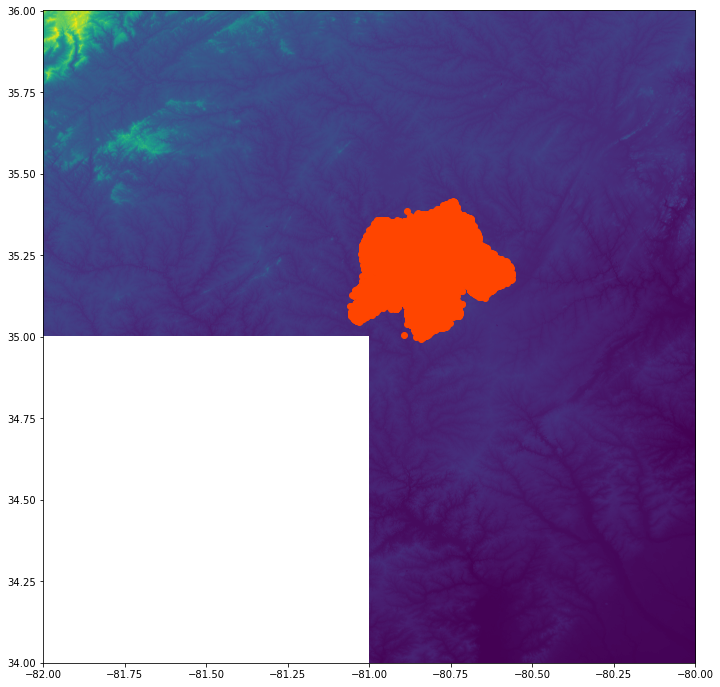

In [405]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
strava_slope_new.boundary.plot(ax=ax, color='orangered')
show(eu, ax=ax)

In [406]:
sf1=strava_slope_new.loc[:,["OSM_ID","starting point"]]
sf1.columns=["OSM_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["OSM_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                    geometry  start_lon  start_lat
0 0  12449451.0  POINT (-80.88515 35.03989) -80.885149  35.039889
1 0  12451639.0  POINT (-80.85810 35.01352) -80.858100  35.013524
2 0  12451639.0  POINT (-80.85470 35.01542) -80.854698  35.015419
3 0  12451639.0  POINT (-80.85344 35.01614) -80.853435  35.016138
4 0  12451908.0  POINT (-80.85160 35.01435) -80.851603  35.014354

In [407]:
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = eu.index(x,y)
sf2["starting_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [408]:
sf2.head(5)

OSM_ID                    geometry  start_lon  start_lat  \
0 0  12449451.0  POINT (-80.88515 35.03989) -80.885149  35.039889   
1 0  12451639.0  POINT (-80.85810 35.01352) -80.858100  35.013524   
2 0  12451639.0  POINT (-80.85470 35.01542) -80.854698  35.015419   
3 0  12451639.0  POINT (-80.85344 35.01614) -80.853435  35.016138   
4 0  12451908.0  POINT (-80.85160 35.01435) -80.851603  35.014354   

     starting_ele  
0 0    186.001068  
1 0    208.861877  
2 0    205.182907  
3 0    204.623383  
4 0    202.496506

In [409]:
ef1=strava_slope_new.loc[:,["OSM_ID","ending point"]]
ef1
ef1.columns=["OSM_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["OSM_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                    geometry    end_lon    end_lat
0 0  12449451.0  POINT (-80.87221 35.03551) -80.872211  35.035510
1 0  12451639.0  POINT (-80.85470 35.01542) -80.854698  35.015419
2 0  12451639.0  POINT (-80.85344 35.01614) -80.853435  35.016138
3 0  12451639.0  POINT (-80.85298 35.01640) -80.852977  35.016396
4 0  12451908.0  POINT (-80.85344 35.01614) -80.853435  35.016138

In [410]:
ef1["ending_ele"]= None
#point in test['geometry']:
x = ef1["end_lon"]
y = ef1["end_lat"]
row, col = eu.index(x,y)
ef1["ending_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [411]:
#rioplot.show(n46w123, cmap='hot')
#strava_slope_new.boundary.plot(ax=plt.gca(), color='skyblue')

In [412]:
ef1.head()

OSM_ID                    geometry    end_lon    end_lat  ending_ele
0 0  12449451.0  POINT (-80.87221 35.03551) -80.872211  35.035510  194.582718
1 0  12451639.0  POINT (-80.85470 35.01542) -80.854698  35.015419  205.182907
2 0  12451639.0  POINT (-80.85344 35.01614) -80.853435  35.016138  204.623383
3 0  12451639.0  POINT (-80.85298 35.01640) -80.852977  35.016396  206.038193
4 0  12451908.0  POINT (-80.85344 35.01614) -80.853435  35.016138  204.623383

In [413]:
s=sf2
s=s.drop(["geometry"],axis=1)
s.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID  start_lon  start_lat  starting_ele
0 0  12449451.0 -80.885149  35.039889    186.001068
1 0  12451639.0 -80.858100  35.013524    208.861877
2 0  12451639.0 -80.854698  35.015419    205.182907
3 0  12451639.0 -80.853435  35.016138    204.623383
4 0  12451908.0 -80.851603  35.014354    202.496506

In [414]:
e=ef1
e=e.drop(["geometry"],axis=1)
e.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID    end_lon    end_lat  ending_ele
0 0  12449451.0 -80.872211  35.035510  194.582718
1 0  12451639.0 -80.854698  35.015419  205.182907
2 0  12451639.0 -80.853435  35.016138  204.623383
3 0  12451639.0 -80.852977  35.016396  206.038193
4 0  12451908.0 -80.853435  35.016138  204.623383

In [415]:
from functools import reduce
strava_all=[strava_slope_new,s,e]

strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['OSM_ID'],
                                            how='outer'), strava_all).fillna('0')
strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
strava_all1=strava_all1.drop_duplicates(subset=['ID'], keep='first')
strava_all1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID      OSM_ID             OSM_NAME OSM_META   OSM_SOURCE   OSM_TARGET  \
0   493  12449451.0  Caroline Acres Road        0  113279398.0  113279439.0   
1   509  12451639.0       Elmsbrook Lane        0  113286726.0  113292987.0   
10  510  12451639.0       Elmsbrook Lane        0  113292987.0  113292988.0   
19  511  12451639.0       Elmsbrook Lane        0  113292988.0  113292990.0   
28  515  12451908.0        Sherrill Lane        0  113294527.0  113292988.0   

    CLAZZ  FLAGS  SOURCE  TARGET  ...  \
0    32.0    3.0  1113.0  1114.0  ...   
1    31.0    3.0  1129.0  1152.0  ...   
10   31.0    3.0  1152.0  1136.0  ...   
19   31.0    3.0  1136.0  1130.0  ...   
28   32.0    3.0  1135.0  1136.0  ...   

                                             geometry  \
0   LINESTRING (-80.88515 35.03989, -80.88501 35.0...   
1   LINESTRING (-80.85810 35.01352, -80.85638 35.0...   
10  LINESTRING (-80.85470 35.01542, -80.85344 35.0...   
19  LINESTRING (-80.85344 35.01614, -80.85298 35.0...   
28  LINESTRING (-80.85160 35.01435, -80.85216 35.0...   

                                  starting point  \
0   POINT (-80.88514944997581 35.03988864664797)   
1   POINT (-80.85810019499068 35.01352385541379)   
10  POINT (-80.85469799748483 35.01541916122972)   
19   POINT (-80.85343519844221 35.0161376633469)   
28  POINT (-80.85160330086475 35.01435406478736)   

                                    ending point  start_lon  start_lat  \
0   POINT (-80.87221076869713 35.03551015532087) -80.885149  35.039889   
1   POINT (-80.85469799748483 35.01541916122972) -80.858100  35.013524   
10   POINT (-80.85343519844221 35.0161376633469) -80.858100  35.013524   
19  POINT (-80.85297739879528 35.01639566410614) -80.858100  35.013524   
28   POINT (-80.85343519844221 35.0161376633469) -80.851603  35.014354   

    starting_ele    end_lon    end_lat  ending_ele     slope  
0     186.001068 -80.872211  35.035510  194.582718  0.547055  
1     208.861877 -80.854698  35.015419  205.182907  0.980960  
10    208.861877 -80.854698  35.015419  205.182907  2.625611  
19    208.861877 -80.854698  35.015419  205.182907  7.264812  
28    202.496506 -80.853435  35.016138  204.623383  0.804074  

[5 rows x 29 columns]

In [416]:
print(strava_all1.crs)
strava_all2=strava_all1.copy()

epsg:4269


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [417]:
# set the co-ordinate system first
strava_all2 = strava_all2.set_crs("EPSG:4269")

# Reproject the geometries by replacing the values with projected ones
strava_all2_slope = strava_all2.to_crs(epsg=3358)
strava_all2_slope.head(10)

ID      OSM_ID             OSM_NAME OSM_META    OSM_SOURCE   OSM_TARGET  \
0   493  12449451.0  Caroline Acres Road        0  1.132794e+08  113279439.0   
1   509  12451639.0       Elmsbrook Lane        0  1.132867e+08  113292987.0   
10  510  12451639.0       Elmsbrook Lane        0  1.132930e+08  113292988.0   
19  511  12451639.0       Elmsbrook Lane        0  1.132930e+08  113292990.0   
28  515  12451908.0        Sherrill Lane        0  1.132945e+08  113292988.0   
29  522  12453593.0     Barberville Road        0  1.132912e+08  113279439.0   
33  523  12453593.0     Barberville Road        0  1.132794e+08  172509790.0   
37  527  12454250.0          Sandra Lane        0  2.577942e+09  113307914.0   
41  528  12454250.0          Sandra Lane        0  1.133079e+08  113292987.0   
45  621  12553648.0        Vineyard Road        0  4.585004e+08  114475961.0   

    CLAZZ  FLAGS    SOURCE    TARGET  ...  \
0    32.0    3.0    1113.0    1114.0  ...   
1    31.0    3.0    1129.0    1152.0  ...   
10   31.0    3.0    1152.0    1136.0  ...   
19   31.0    3.0    1136.0    1130.0  ...   
28   32.0    3.0    1135.0    1136.0  ...   
29   21.0    1.0    1145.0    1114.0  ...   
33   21.0    1.0    1114.0    1146.0  ...   
37   32.0    3.0    1151.0  401184.0  ...   
41   32.0    3.0  401184.0    1152.0  ...   
45   32.0    3.0    1269.0    1270.0  ...   

                                             geometry  \
0   LINESTRING (437624.231 144719.873, 437636.857 ...   
1   LINESTRING (440036.838 141749.273, 440196.033 ...   
10  LINESTRING (440351.204 141953.671, 440467.915 ...   
19  LINESTRING (440467.915 142031.207, 440510.220 ...   
28  LINESTRING (440631.374 141830.271, 440580.745 ...   
29  LINESTRING (436736.078 140981.287, 436753.814 ...   
33  LINESTRING (438795.294 144211.924, 438946.562 ...   
37  LINESTRING (440612.471 141699.695, 440592.274 ...   
41  LINESTRING (440592.274 141706.174, 440493.461 ...   
45  LINESTRING (425468.317 146545.171, 425418.463 ...   

                                  starting point  \
0   POINT (-80.88514944997581 35.03988864664797)   
1   POINT (-80.85810019499068 35.01352385541379)   
10  POINT (-80.85469799748483 35.01541916122972)   
19   POINT (-80.85343519844221 35.0161376633469)   
28  POINT (-80.85160330086475 35.01435406478736)   
29  POINT (-80.89410086706964 35.00603939697924)   
33  POINT (-80.87221076869713 35.03551015532087)   
37  POINT (-80.85178370111059 35.01317396387865)   
41  POINT (-80.85200630088053 35.01322896360332)   
45  POINT (-81.01876898137742 35.05418551382365)   

                                    ending point  start_lon  start_lat  \
0   POINT (-80.87221076869713 35.03551015532087) -80.885149  35.039889   
1   POINT (-80.85469799748483 35.01541916122972) -80.858100  35.013524   
10   POINT (-80.85343519844221 35.0161376633469) -80.858100  35.013524   
19  POINT (-80.85297739879528 35.01639566410614) -80.858100  35.013524   
28   POINT (-80.85343519844221 35.0161376633469) -80.851603  35.014354   
29  POINT (-80.87221076869713 35.03551015532087) -80.894101  35.006039   
33  POINT (-80.87058136993456 35.03676965807724) -80.894101  35.006039   
37  POINT (-80.85200630088053 35.01322896360332) -80.851784  35.013174   
41  POINT (-80.85469799748483 35.01541916122972) -80.851784  35.013174   
45  POINT (-81.02674590002447 35.05299648379675) -81.018769  35.054186   

    starting_ele    end_lon    end_lat  ending_ele      slope  
0     186.001068 -80.872211  35.035510  194.582718   0.547055  
1     208.861877 -80.854698  35.015419  205.182907   0.980960  
10    208.861877 -80.854698  35.015419  205.182907   2.625611  
19    208.861877 -80.854698  35.015419  205.182907   7.264812  
28    202.496506 -80.853435  35.016138  204.623383   0.804074  
29    173.448090 -80.872211  35.035510  194.582718   0.511493  
33    173.448090 -80.872211  35.035510  194.582718  10.359593  
37    198.751572 -80.852006  35.013229  198.446533   1.438086  
41    198.751572 -80.852006  35.0132

In [418]:
inter_road.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'osm_id', 'name',
       'ref', 'type', 'oneway', 'bridge', 'maxspeed', 'geometry', 'Length'],
      dtype='object')

In [419]:
#Identify the OSM ID link that have bridge

inter_road_bridge=pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
inter_road_bridge=inter_road_bridge.loc[:,["osm_id_sensor", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
inter_road_bridge.head()

osm_id_sensor  bridge
0     55186886.0       0
1     16701397.0       0
2     34764115.0       1
3    322993730.0       0
4    156886419.0       0

In [420]:
strava_all2_slope=strava_all2_slope.loc[:,['geometry','slope']]
gdf1=gdf1.loc[:,['osm_id_sensor','geometry']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [421]:
# Now clip with buffer for each location
#buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
buffer_clip_slope1=gpd.sjoin(strava_all2_slope,gdf1,op='intersects') 
buffer_clip_slope1.head(5)


geometry     slope  \
13822  LINESTRING (451266.353 174573.865, 451248.773 ...  0.250846   
13871  LINESTRING (451283.970 174594.171, 451266.353 ...  0.246342   
13920  LINESTRING (451371.229 174670.882, 451351.217 ...  0.193855   
13969  LINESTRING (451341.250 174654.565, 451336.376 ...  0.175709   
14018  LINESTRING (451315.835 174626.741, 451283.970 ...  0.145336   

       index_right  osm_id_sensor  
13822            9    169185539.0  
13871            9    169185539.0  
13920            9    169185539.0  
13969            9    169185539.0  
14018            9    169185539.0

In [422]:
#Make all link having bridge  slope is zero
buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='osm_id_sensor', left_on='osm_id_sensor',how='inner')
buffer_clip_slope2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     55186886.0       0  LINESTRING (438954.277 163515.490, 438973.968 ...   
1     55186886.0       0  LINESTRING (440060.374 164583.099, 440023.893 ...   
2     55186886.0       0  LINESTRING (439934.148 164523.115, 439917.085 ...   
3     55186886.0       0  LINESTRING (440203.648 164620.021, 440174.586 ...   
4     55186886.0       0  LINESTRING (439812.985 164480.789, 439573.927 ...   

      slope  index_right  
0  1.310651            0  
1  0.833807            0  
2  0.907838            0  
3  0.765532            0  
4  0.445490            0

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

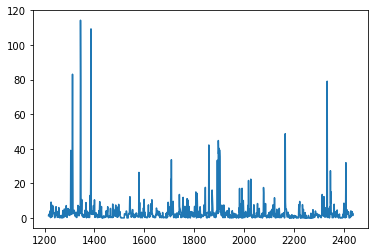

In [423]:
# Separate bridge and non bridge data
bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
bridge_presence.slope.plot()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

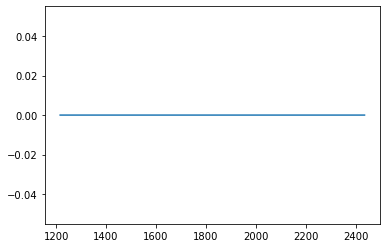

In [424]:
bridge_presence['slope']=0
bridge_presence.slope.plot()

In [425]:
bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
bridge_absence.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     55186886.0       0  LINESTRING (438954.277 163515.490, 438973.968 ...   
1     55186886.0       0  LINESTRING (440060.374 164583.099, 440023.893 ...   
2     55186886.0       0  LINESTRING (439934.148 164523.115, 439917.085 ...   
3     55186886.0       0  LINESTRING (440203.648 164620.021, 440174.586 ...   
4     55186886.0       0  LINESTRING (439812.985 164480.789, 439573.927 ...   

      slope  index_right  
0  1.310651            0  
1  0.833807            0  
2  0.907838            0  
3  0.765532            0  
4  0.445490            0

In [426]:
# now join again
buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
# put the cap for the slope as maximum 25%
buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
buffer_clip_slope3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge  \
1216     34764115.0       1   
1217     34764115.0       1   
1218     34764115.0       1   
1219     34764115.0       1   
1220     34764115.0       1   

                                               geometry  slope  index_right  
1216  LINESTRING (441660.798 163964.844, 441566.651 ...    0.0            3  
1217  LINESTRING (441556.122 163888.460, 441541.993 ...    0.0            3  
1218  LINESTRING (441362.647 164652.176, 441415.011 ...    0.0            3  
1219  LINESTRING (441515.193 164507.654, 441568.259 ...    0.0            3  
1220  LINESTRING (439982.286 165297.641, 439994.888 ...    0.0            3

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

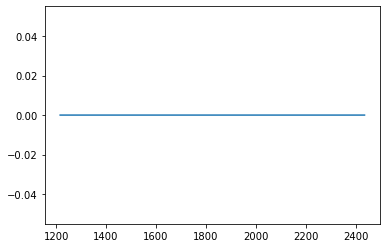

In [427]:
check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
check.slope.plot()

In [428]:
# Now calculate the mean slope for each count location
output_slope=buffer_clip_slope3.groupby(by=['osm_id_sensor'])['slope'].mean().reset_index()
output_slope.columns=['osm_id','slope']
output_slope.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     slope
0   16701397.0  2.298797
1   34764115.0  0.000000
2   51062797.0  2.688883
3   55186886.0  2.447101
4  156886419.0  2.648856

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [429]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [430]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [431]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [432]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [433]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [434]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [435]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [436]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/eugene/KEUG/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [437]:
w19=pd.read_csv("C:/Users/mxm5116/Desktop/Charlotte/charlotte_weather.csv")
w19

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0        65.8        59       65     59.7       50       96     81.4       58   
1        54.7        50       50     48.0       44      100     78.8       69   
2        52.0        48       54     51.2       48      100     97.0       90   
3        55.6        53       60     54.7       49      100     97.1       80   
4        52.0        44       41     38.2       35       85     61.9       35   
..        ...       ...      ...      ...      ...      ...      ...      ...   
360      50.2        35       50     42.8       33       93     77.4       60   
361      57.3        44       55     48.9       41       93     75.2       53   
362      64.1        60       64     61.1       55       93     89.9       75   
363      64.2        51       63     48.4       30       87     60.2       23   
364      47.8        38       34     31.2       29       76     54.3       33   

     Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  \
0          17       8.3         3      29.4      29.3      29.2   
1          10       5.0         0      29.4      29.4      29.3   
2           6       2.5         0      29.3      29.2      29.2   
3          18       7.3         3      29.2      29.1      28.8   
4          17      10.8         3      29.2      29.0      28.8   
..        ...       ...       ...       ...       ...       ...   
360         7       2.1         0      29.5      29.5      29.4   
361         8       3.1         0      29.5      29.4      29.4   
362        17      10.3         5      29.4      29.2      29.0   
363        21      14.1         8      29.0      28.9      28.9   
364        14       7.8         3      29.1      29.1      29.0   

     Precipitation        Date  
0             0.13    2019-1-1  
1             0.00    2019-1-2  
2             0.53    2019-1-3  
3             0.31    2019-1-4  
4             0.61    2019-1-5  
..             ...         ...  
360           0.00  2019-12-27  
361           0.00  2019-12-28  
362           0.18  2019-12-29  
363           0.09  2019-12-30  
364           0.00  2019-12-31  

[365 rows x 16 columns]

In [438]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg  Hum_avg  Precipitation
0        65.8     81.4           0.13
1        54.7     78.8           0.00
2        52.0     97.0           0.53
3        55.6     97.1           0.31
4        52.0     61.9           0.61
..        ...      ...            ...
360      50.2     77.4           0.00
361      57.3     75.2           0.00
362      64.1     89.9           0.18
363      64.2     60.2           0.09
364      47.8     54.3           0.00

[365 rows x 3 columns]

In [439]:
output_weather.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [440]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [441]:
output_weather2.isnull().values.any()

False

In [442]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         63.593151
Hum_avg          65.583288
Precipitation     0.148247
dtype: float64

# Aggregate all output together in a dataframe

In [443]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [emerging_data,output_bikecom,output_lane,output_intersection_densitya,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope]

In [444]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
                                            how='left'), df_all)
df_merged_eco_short=df_merged_eco_short.drop_duplicates(subset=['site_id'],keep='first')
df_merged_eco_short

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0    55186886.0  P001CHA   permanent  393.654456  18.547945   5.958904   
1    16701397.0  P002CHA   permanent  160.742460  16.082192   4.602740   
2   493705004.0  P003CHA   permanent   39.364881  15.465753   2.945205   
3    34764115.0  P004CHA   permanent  149.292520  11.630137   4.780822   
4   322993730.0  P005CHA   permanent   33.307341   2.438356   1.136986   
5   492433486.0  P006CHA   permanent   45.565476   0.082192   0.027397   
6   156886419.0  P007CHA   permanent  585.875325   4.753425   0.739726   
7   235076258.0  P009CHA   permanent  727.206548  14.178082   4.438356   
8   422138643.0  P010CHA   permanent  687.448701  14.465753   4.534247   
9   169185539.0  P012CHA   permanent  396.686309   3.794521   0.534247   
10   16694967.0  P013CHA   permanent  469.027381   6.041096   0.561644   
11   51062957.0  S001CHA  short-term   21.728088  11.821918   5.397260   
13   51062797.0  S002CHA  short-term   34.413822   4.917808   2.684932   
15   51062797.0  S003CHA  short-term   44.115166   4.671233   2.452055   

    stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0    1236.0     6592.770722      86.650140                     1.314321  ...   
1     740.0     5731.325934      32.021823                     0.558716  ...   
2     328.0     3263.299080      13.972670                     0.428176  ...   
3    2049.0     8437.321143     126.813425                     1.503006  ...   
4    1443.0     4328.539221      30.432172                     0.703059  ...   
5     110.0     3978.366405      31.588269                     0.794001  ...   
6     795.0     3814.791812       0.000000                     0.000000  ...   
7     574.0     3954.593423      12.323036                     0.311613  ...   
8     907.0     3944.938493      31.943561                     0.809735  ...   
9     527.0     2817.448456      13.904582                     0.493517  ...   
10    620.0     3256.380625      10.628497                     0.326390  ...   
11    996.0     4236.665354      25.060309                     0.591510  ...   
13    318.0     6563.535741      16.635998                     0.253461  ...   
15   1142.0     6563.535741      16.635998                     0.253461  ...   

    pct_female Student Access  pct_at_least_college_education  Median Age  \
0    49.987214     542.216976                       85.679294  854.978926   
1    53.104654     593.099224                       88.272609  618.991205   
2    53.784304     565.205165                       95.479782  546.829222   
3    45.276869    1380.122630                       92.416831  634.598468   
4    50.489498     517.747516                       86.386698  497.835091   
5    50.984671    4590.345234                       72.811010  978.252252   
6    52.397116     427.460271                       79.013919  783.709820   
7    54.055198     747.761347                       94.141613  547.633502   
8    50.972917     506.292037                       84.988108  403.226163   
9    46.576862    2245.450690                       86.505310  754.746389   
10   53.383193     393.589132                       67.307524  588.324143   
11   50.197634     519.701278                       79.346697  391.109072   
13   45.877296     942.596847                       85.058759  617.788895   
15   45.877296     942.596847                       85.058759  617.788895   

    Median_HH_income   HH_density  population_density  employment_density  \
0       20779.200321  2814.947124         5289.815188         3812.688606   
1       20085.633154  2306.765428         4763.402298         3299.950713   
2       62323.196944  1521.561271         3912.308745         1871.695303   
3       29623.584002  3433.157944         6061.294392         4820.893409   
4       22349.755502  2126.381868         3746.234440         2485.107124   
5       13604.878199  1111.788437         4619.929316         2352.321319   
6 

In [445]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [446]:
# Add weather data in this new data frame
df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
df_merged_eco_short.head(5)

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0   55186886.0  P001CHA   permanent  393.654456  18.547945   5.958904   
1   16701397.0  P002CHA   permanent  160.742460  16.082192   4.602740   
2  493705004.0  P003CHA   permanent   39.364881  15.465753   2.945205   
3   34764115.0  P004CHA   permanent  149.292520  11.630137   4.780822   
4  322993730.0  P005CHA   permanent   33.307341   2.438356   1.136986   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0   1236.0     6592.770722      86.650140                     1.314321  ...   
1    740.0     5731.325934      32.021823                     0.558716  ...   
2    328.0     3263.299080      13.972670                     0.428176  ...   
3   2049.0     8437.321143     126.813425                     1.503006  ...   
4   1443.0     4328.539221      30.432172                     0.703059  ...   

   Median Age Median_HH_income   HH_density  population_density  \
0  854.978926     20779.200321  2814.947124         5289.815188   
1  618.991205     20085.633154  2306.765428         4763.402298   
2  546.829222     62323.196944  1521.561271         3912.308745   
3  634.598468     29623.584002  3433.157944         6061.294392   
4  497.835091     22349.755502  2126.381868         3746.234440   

   employment_density  Number of jobs     slope   Temp_avg   Hum_avg   \
0         3812.688606    10433.167338  2.447101  63.593151  65.583288   
1         3299.950713    14077.233803  2.298797  63.593151  65.583288   
2         1871.695303     3430.330950       NaN  63.593151  65.583288   
3         4820.893409    90147.911270  0.000000  63.593151  65.583288   
4         2485.107124    47485.964489  2.626991  63.593151  65.583288   

   Precipitation  
0       0.148247  
1       0.148247  
2       0.148247  
3       0.148247  
4       0.148247  

[5 rows x 85 columns]

In [447]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Eco_Short_Charlotte_data_circular_0.75_mile_buffer_2019.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use Keplergl to produce dynamic Map for all variables

In [448]:
# Make dynamic visualization
#!pip install keplergl

In [449]:
ecoshort.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  393.654456  18.547945   5.958904   1236.0  ...   
1  160.742460  16.082192   4.602740    740.0  ...   
2   39.364881  15.465753   2.945205    328.0  ...   
3  149.292520  11.630137   4.780822   2049.0  ...   
4   33.307341   2.438356   1.136986   1443.0  ...   

                                             comment  osm_id_sensor  \
0             On top of bridge; Sidewalk + bike lane     55186886.0   
1  Sidewalk + bike lane, Street is divided in str...     16701397.0   
2  Separated Sidewalk North, divided in strava-os...    493705004.0   
3                                                NaN     34764115.0   
4                                                NaN    322993730.0   

                        geometry  min_dist_to_school min_dist_to_college  \
0  POINT (440167.090 163506.089)         2421.857994         9586.368741   
1  POINT (444442.876 164385.527)         1687.108336         4478.048087   
2  POINT (442277.682 160005.150)         3001.458672        14595.415186   
3  POINT (441173.175 164818.677)         2534.811945         5169.515202   
4  POINT (442252.867 164026.406)         2069.054243         2614.970164   

   min_dist_to_university  lanes  maxspeed min_dist_to_polygon  \
0             8278.354216      4      35.0         2394.550560   
1             7268.572020      2      25.0         2779.921585   
2             3924.702931      2      25.0         5021.429426   
3             3389.043815      2      20.0         3298.256658   
4             5081.975065      2      25.0         2179.475405   

   min_dist_to_CBD  
0      8219.960278  
1      7242.577692  
2     15882.995661  
3      3645.426147  
4      2691.820923  

[5 rows x 22 columns]

In [450]:
ecoshort_selected=ecoshort.loc[:,["osm_id_sensor","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

epsg:3358


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [451]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:3358")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D

osm_id_sensor                    geometry
0      55186886.0  POINT (-80.86114 35.20964)
1      16701397.0  POINT (-80.81436 35.21828)
2     493705004.0  POINT (-80.83725 35.17844)
3      34764115.0  POINT (-80.85036 35.22164)
4     322993730.0  POINT (-80.83834 35.21468)
5     492433486.0  POINT (-80.72297 35.30683)
6     156886419.0  POINT (-80.83985 35.07489)
7     235076258.0  POINT (-80.84366 35.18953)
8     422138643.0  POINT (-80.83494 35.21603)
9     169185539.0  POINT (-80.73417 35.31900)
10     16694967.0  POINT (-80.74358 35.14843)
11     51062957.0  POINT (-80.83072 35.22186)
12     51062797.0  POINT (-80.83557 35.22423)

In [452]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor        Lon        Lat
0      55186886.0 -80.861140  35.209640
1      16701397.0 -80.814360  35.218280
2     493705004.0 -80.837250  35.178440
3      34764115.0 -80.850360  35.221640
4     322993730.0 -80.838340  35.214680
5     492433486.0 -80.722970  35.306830
6     156886419.0 -80.839853  35.074886
7     235076258.0 -80.843660  35.189526
8     422138643.0 -80.834937  35.216025
9     169185539.0 -80.734167  35.319003
10     16694967.0 -80.743575  35.148433
11     51062957.0 -80.830717  35.221863
12     51062797.0 -80.835569  35.224233

In [453]:
ecoshort_selected_3D.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    float64
Lon              float64
Lat              float64
dtype: object

In [454]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:3358")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["osm_id_sensor","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='osm_id_sensor', right_on='osm_id_sensor', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['osm_id_sensor','Lon','Lat','geometry']
buffer_vis.head()

epsg:3358


osm_id_sensor       Lon       Lat  \
0     55186886.0 -80.86114  35.20964   
1     16701397.0 -80.81436  35.21828   
2    493705004.0 -80.83725  35.17844   
3     34764115.0 -80.85036  35.22164   
4    322993730.0 -80.83834  35.21468   

                                            geometry  
0  POLYGON ((-80.84788 35.20984, -80.84792 35.208...  
1  POLYGON ((-80.80110 35.21848, -80.80114 35.217...  
2  POLYGON ((-80.82400 35.17864, -80.82404 35.177...  
3  POLYGON ((-80.83710 35.22184, -80.83714 35.220...  
4  POLYGON ((-80.82508 35.21488, -80.82512 35.213...

In [455]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='osm_id', right_on='osm_id_sensor', how='inner'))
df_dynamic1
pd.DataFrame.to_csv(df_dynamic1, 'keplergl_eco_short_2019_Charlotte_circular_0.75_mile_buffer.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

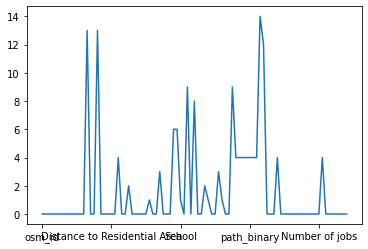

In [456]:
df_dynamic1.isnull().sum().plot()


In [457]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [458]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [459]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [460]:
#df_dynamic1.dtypes

In [461]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [462]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/keplergl_eco_short_2019_Charlotte_circular_0.75_mile_buffer.csv")
data=data.fillna('0')
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0    551868…

In [463]:
data.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0   55186886.0  P001CHA   permanent  393.654456  18.547945   5.958904   
1   16701397.0  P002CHA   permanent  160.742460  16.082192   4.602740   
2  493705004.0  P003CHA   permanent   39.364881  15.465753   2.945205   
3   34764115.0  P004CHA   permanent  149.292520  11.630137   4.780822   
4  322993730.0  P005CHA   permanent   33.307341   2.438356   1.136986   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0   1236.0     6592.770722      86.650140                     1.314321  ...   
1    740.0     5731.325934      32.021823                     0.558716  ...   
2    328.0     3263.299080      13.972670                     0.428176  ...   
3   2049.0     8437.321143     126.813425                     1.503006  ...   
4   1443.0     4328.539221      30.432172                     0.703059  ...   

   employment_density  Number of jobs     slope   Temp_avg   Hum_avg   \
0         3812.688606    10433.167338  2.447101  63.593151  65.583288   
1         3299.950713    14077.233803  2.298797  63.593151  65.583288   
2         1871.695303     3430.330950  0.000000  63.593151  65.583288   
3         4820.893409    90147.911270  0.000000  63.593151  65.583288   
4         2485.107124    47485.964489  2.626991  63.593151  65.583288   

   Precipitation  osm_id_sensor       Lon       Lat  \
0       0.148247     55186886.0 -80.86114  35.20964   
1       0.148247     16701397.0 -80.81436  35.21828   
2       0.148247    493705004.0 -80.83725  35.17844   
3       0.148247     34764115.0 -80.85036  35.22164   
4       0.148247    322993730.0 -80.83834  35.21468   

                                            geometry  
0  POLYGON ((-80.84788475965642 35.20984325708299...  
1  POLYGON ((-80.80110323899694 35.21847813015836...  
2  POLYGON ((-80.82399977478977 35.17864064020645...  
3  POLYGON ((-80.83710278030938 35.22184207523325...  
4  POLYGON ((-80.82508388329354 35.21488075825398...  

[5 rows x 89 columns]

In [464]:
# save as htm file
map_2.save_to_html(file_name="Eco_short_Charlotte_keplergl_circular_0.75_mile_buffer19.html")

Map saved to Eco_short_Charlotte_keplergl_circular_0.75_mile_buffer19.html!


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [465]:
#conda list ipython

In [466]:
end = time.time()
print("Total Run Time:", end - start)

Total Run Time: 1283.2186920642853


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT